# Load the libraries

In [1]:
library(data.table);
library(ggplot2);
library(repr)
library(reshape2)
##library(gplots)
library(pheatmap)
library(cowplot)
library(RColorBrewer)
library(sva)
library(ggExtra)
source("helper_functions.R")


Attaching package: ‘reshape2’

The following objects are masked from ‘package:data.table’:

    dcast, melt


Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave

Loading required package: mgcv
Loading required package: nlme
This is mgcv 1.8-28. For overview type 'help("mgcv-package")'.
Loading required package: genefilter
Loading required package: BiocParallel


In [2]:
options(repr.plot.width = 3, repr.plot.height = 3, repr.plot.res=80)
name <- "CLUESImmVar_processed.V5.1";

# Load the necessary input

## Load the covariates from ```/ye/yelabstore2/10x.lupus/eqtls/demux.v2```

In [3]:
cm_covs <- fread("v5.expr/v5.full.allpDC.cM.blind.covs.txt");
colnames(cm_covs) <- sapply(colnames(cm_covs), function(x) {strsplit(x,"_")[[1]][[1]]})
covs_gene_names <- cm_covs$V1;
cm_covs <- as.matrix(cm_covs[,-1]);

th_covs <- as.matrix(fread("v5.expr/v5.full.allpDC.Th.blind.covs.txt")[,-1]);
colnames(th_covs) <- sapply(colnames(th_covs), function(x) {strsplit(x,"_")[[1]][[1]]})

tc_covs <- as.matrix(fread("v5.expr/v5.full.allpDC.Tc.blind.covs.txt")[,-1]);
colnames(tc_covs) <- sapply(colnames(tc_covs), function(x) {strsplit(x,"_")[[1]][[1]]})

ncm_covs <- as.matrix(fread("v5.expr/v5.full.allpDC.ncM.blind.covs.txt")[,-1]);
colnames(ncm_covs) <- sapply(colnames(ncm_covs), function(x) {strsplit(x,"_")[[1]][[1]]})

b_covs <- as.matrix(fread("v5.expr/v5.full.allpDC.B.blind.covs.txt")[,-1]);
colnames(b_covs) <- sapply(colnames(b_covs), function(x) {strsplit(x,"_")[[1]][[1]]})

nk_covs <- as.matrix(fread("v5.expr/v5.full.allpDC.NK.blind.covs.txt")[,-1]);
colnames(nk_covs) <- sapply(colnames(nk_covs), function(x) {strsplit(x,"_")[[1]][[1]]})

cdc_covs <- as.matrix(fread("v5.expr/v5.full.allpDC.cDC.blind.covs.txt")[,-1]);
colnames(cdc_covs) <- sapply(colnames(cdc_covs), function(x) {strsplit(x,"_")[[1]][[1]]})

pdc_covs <- as.matrix(fread("v5.expr/v5.full.allpDC.pDC.blind.covs.txt")[,-1]);
colnames(pdc_covs) <- sapply(colnames(pdc_covs), function(x) {strsplit(x,"_")[[1]][[1]]})

pbmc_covs <- as.matrix(fread("v5.expr/v5.full.allpDC.PBMC.blind.covs.txt")[,-1]);
colnames(pbmc_covs) <- sapply(colnames(pbmc_covs), function(x) {strsplit(x,"_")[[1]][[1]]})

# pbmc_covs <- as.matrix(fread("v5.expr/v5.full.allpDC.PBMC.blind.covs.txt")[,-1]);
# colnames(pbmc_covs) <- sapply(colnames(pbmc_covs), function(x) {strsplit(x,"_")[[1]][[1]]})

rownames(pbmc_covs) <- rownames(cm_covs) <- rownames(th_covs) <- rownames(tc_covs) <- rownames(ncm_covs) <- rownames(b_covs) <- rownames(nk_covs) <-rownames(cdc_covs) <- rownames(pdc_covs)<- covs_gene_names;


## Load the processed expression data from ```/ye/yelabstore2/10x.lupus/eqtls/demux.v2```

In [4]:
cm_expr <- fread("v5.expr/v5.full.allpDC.cM.blind.expr.txt");
colnames(cm_expr) <- sapply(colnames(cm_expr), function(x) {a <- strsplit(x,"_"); if(length(a[[1]])==3) {return(paste(a[[1]][2:3],collapse="_"))} else {return(paste(a[[1]][1:2],collapse="_"))}})
expr_gene_names <- cm_expr$V1;
cm_expr <- as.matrix(cm_expr[,-1]);

th_expr <- as.matrix(fread("v5.expr/v5.full.allpDC.Th.blind.expr.txt")[,-1]);
colnames(th_expr) <- sapply(colnames(cm_expr), function(x) {a <- strsplit(x,"_"); if(length(a[[1]])==3) {return(paste(a[[1]][2:3],collapse="_"))} else {return(paste(a[[1]][1:2],collapse="_"))}})

tc_expr <- as.matrix(fread("v5.expr/v5.full.allpDC.Tc.blind.expr.txt")[,-1]);
colnames(tc_expr) <- sapply(colnames(tc_expr), function(x) {a <- strsplit(x,"_"); if(length(a[[1]])==3) {return(paste(a[[1]][2:3],collapse="_"))} else {return(paste(a[[1]][1:2],collapse="_"))}})

ncm_expr <- as.matrix(fread("v5.expr/v5.full.allpDC.ncM.blind.expr.txt")[,-1]);
colnames(ncm_expr) <- sapply(colnames(ncm_expr), function(x) {a <- strsplit(x,"_"); if(length(a[[1]])==3) {return(paste(a[[1]][2:3],collapse="_"))} else {return(paste(a[[1]][1:2],collapse="_"))}})

b_expr <- as.matrix(fread("v5.expr/v5.full.allpDC.B.blind.expr.txt")[,-1]);
colnames(b_expr) <- sapply(colnames(b_expr), function(x) {a <- strsplit(x,"_"); if(length(a[[1]])==3) {return(paste(a[[1]][2:3],collapse="_"))} else {return(paste(a[[1]][1:2],collapse="_"))}})

nk_expr <- as.matrix(fread("v5.expr/v5.full.allpDC.NK.blind.expr.txt")[,-1]);
colnames(nk_expr) <- sapply(colnames(nk_expr), function(x) {a <- strsplit(x,"_"); if(length(a[[1]])==3) {return(paste(a[[1]][2:3],collapse="_"))} else {return(paste(a[[1]][1:2],collapse="_"))}})

cdc_expr <- as.matrix(fread("v5.expr/v5.full.allpDC.cDC.blind.expr.txt")[,-1]);
colnames(cdc_expr) <- sapply(colnames(cdc_expr), function(x) {a <- strsplit(x,"_"); if(length(a[[1]])==3) {return(paste(a[[1]][2:3],collapse="_"))} else {return(paste(a[[1]][1:2],collapse="_"))}})

pdc_expr <- as.matrix(fread("v5.expr/v5.full.allpDC.pDC.blind.expr.txt")[,-1]);
colnames(pdc_expr) <- sapply(colnames(pdc_expr), function(x) {a <- strsplit(x,"_"); if(length(a[[1]])==3) {return(paste(a[[1]][2:3],collapse="_"))} else {return(paste(a[[1]][1:2],collapse="_"))}})

pbmc_expr <- as.matrix(fread("v5.expr/v5.full.allpDC.PBMC.blind.expr.txt")[,-1]);
colnames(pbmc_expr) <- sapply(colnames(pbmc_expr), function(x) {a <- strsplit(x,"_"); if(length(a[[1]])==3) {return(paste(a[[1]][2:3],collapse="_"))} else {return(paste(a[[1]][1:2],collapse="_"))}})

rownames(pbmc_expr) <- rownames(cm_expr) <- rownames(th_expr) <- rownames(tc_expr) <- rownames(ncm_expr) <- rownames(b_expr) <- rownames(nk_expr) <-rownames(cdc_expr) <-rownames(pdc_expr) <- expr_gene_names;

## do a quick filter for all zeros
any_zeros = unique(c(which(rowSums(pbmc_expr) ==0),
                     which(rowSums(cm_expr)==0),
                     which(rowSums(ncm_expr)==0),
                     which(rowSums(th_expr)==0),
                     which(rowSums(tc_expr)==0),
                     which(rowSums(b_expr)==0),
                     which(rowSums(nk_expr)==0),
                     which(rowSums(cdc_expr)==0),
                     which(rowSums(pdc_expr)==0)))
pbmc_expr <- pbmc_expr[-any_zeros,];
cm_expr <- cm_expr[-any_zeros,];
ncm_expr <- ncm_expr[-any_zeros,];
th_expr <- th_expr[-any_zeros,];
tc_expr <- tc_expr[-any_zeros,];
b_expr <- b_expr[-any_zeros,];
nk_expr <- nk_expr[-any_zeros,];
cdc_expr <- cdc_expr[-any_zeros,];
pdc_expr <- pdc_expr[-any_zeros,];
expr_gene_names <- expr_gene_names[-any_zeros];


Warning message in fread("v5.expr/v5.full.allpDC.cM.blind.expr.txt"):
“Detected 205 column names but the data has 206 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”Warning message in fread("v5.expr/v5.full.allpDC.Th.blind.expr.txt"):
“Detected 205 column names but the data has 206 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”Warning message in fread("v5.expr/v5.full.allpDC.Tc.blind.expr.txt"):
“Detected 205 column names but the data has 206 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an

In [5]:
cm_counts <- fread("v5.expr/v5.full.allpDC.cM.blind.counts.txt");
colnames(cm_counts) <- sapply(colnames(cm_counts), function(x) {a <- strsplit(x,"_"); if(length(a[[1]])==3) {return(paste(a[[1]][2:3],collapse="_"))} else {return(paste(a[[1]][1:2],collapse="_"))}})
counts_gene_names <- cm_counts$V1_NA;
cm_counts <- as.matrix(cm_counts[,-1]);
cm_counts <- cm_counts[match(expr_gene_names, counts_gene_names),]

th_counts <- as.matrix(fread("v5.expr/v5.full.allpDC.Th.blind.counts.txt")[,-1]);
colnames(th_counts) <- sapply(colnames(cm_counts), function(x) {a <- strsplit(x,"_"); if(length(a[[1]])==3) {return(paste(a[[1]][2:3],collapse="_"))} else {return(paste(a[[1]][1:2],collapse="_"))}})
th_counts <- th_counts[match(expr_gene_names, counts_gene_names),]

tc_counts <- as.matrix(fread("v5.expr/v5.full.allpDC.Tc.blind.counts.txt")[,-1]);
colnames(tc_counts) <- sapply(colnames(tc_counts), function(x) {a <- strsplit(x,"_"); if(length(a[[1]])==3) {return(paste(a[[1]][2:3],collapse="_"))} else {return(paste(a[[1]][1:2],collapse="_"))}})
tc_counts <- tc_counts[match(expr_gene_names, counts_gene_names),]

ncm_counts <- as.matrix(fread("v5.expr/v5.full.allpDC.ncM.blind.counts.txt")[,-1]);
colnames(ncm_counts) <- sapply(colnames(ncm_counts), function(x) {a <- strsplit(x,"_"); if(length(a[[1]])==3) {return(paste(a[[1]][2:3],collapse="_"))} else {return(paste(a[[1]][1:2],collapse="_"))}})
ncm_counts <- ncm_counts[match(expr_gene_names, counts_gene_names),]

b_counts <- as.matrix(fread("v5.expr/v5.full.allpDC.B.blind.counts.txt")[,-1]);
colnames(b_counts) <- sapply(colnames(b_counts), function(x) {a <- strsplit(x,"_"); if(length(a[[1]])==3) {return(paste(a[[1]][2:3],collapse="_"))} else {return(paste(a[[1]][1:2],collapse="_"))}})
b_counts <- b_counts[match(expr_gene_names, counts_gene_names),]

nk_counts <- as.matrix(fread("v5.expr/v5.full.allpDC.NK.blind.counts.txt")[,-1]);
colnames(nk_counts) <- sapply(colnames(nk_counts), function(x) {a <- strsplit(x,"_"); if(length(a[[1]])==3) {return(paste(a[[1]][2:3],collapse="_"))} else {return(paste(a[[1]][1:2],collapse="_"))}})
nk_counts <- nk_counts[match(expr_gene_names, counts_gene_names),]

cdc_counts <- as.matrix(fread("v5.expr/v5.full.allpDC.cDC.blind.counts.txt")[,-1]);
colnames(cdc_counts) <- sapply(colnames(cdc_counts), function(x) {a <- strsplit(x,"_"); if(length(a[[1]])==3) {return(paste(a[[1]][2:3],collapse="_"))} else {return(paste(a[[1]][1:2],collapse="_"))}})
cdc_counts <- cdc_counts[match(expr_gene_names, counts_gene_names),]

pdc_counts <- as.matrix(fread("v5.expr/v5.full.allpDC.pDC.blind.counts.txt")[,-1]);
colnames(pdc_counts) <- sapply(colnames(pdc_counts), function(x) {a <- strsplit(x,"_"); if(length(a[[1]])==3) {return(paste(a[[1]][2:3],collapse="_"))} else {return(paste(a[[1]][1:2],collapse="_"))}})
pdc_counts <- pdc_counts[match(expr_gene_names, counts_gene_names),]

pbmc_counts <- as.matrix(fread("v5.expr/v5.full.allpDC.PBMC.blind.counts.txt")[,-1]);
colnames(pbmc_counts) <- sapply(colnames(pbmc_counts), function(x) {a <- strsplit(x,"_"); if(length(a[[1]])==3) {return(paste(a[[1]][2:3],collapse="_"))} else {return(paste(a[[1]][1:2],collapse="_"))}})
pbmc_counts <- pbmc_counts[match(expr_gene_names, counts_gene_names),]

rownames(pbmc_counts) <- rownames(cm_counts) <- rownames(th_counts) <- rownames(tc_counts) <- rownames(ncm_counts) <- rownames(b_counts) <- rownames(nk_counts) <-rownames(cdc_counts) <-rownames(pdc_counts) <- expr_gene_names;
colnames(pbmc_counts) <- colnames(cm_counts) <- colnames(th_counts) <- colnames(tc_counts) <- colnames(ncm_counts) <- colnames(b_counts) <- colnames(nk_counts) <-colnames(cdc_counts) <-colnames(pdc_counts) <- colnames(pbmc_expr)

# ## do a quick filter for all zeros
# any_zeros = unique(c(which(rowSums(pbmc_counts) ==0),
#                      which(rowSums(cm_counts)==0),
#                      which(rowSums(ncm_counts)==0),
#                      which(rowSums(th_counts)==0),
#                      which(rowSums(tc_counts)==0),
#                      which(rowSums(b_counts)==0),
#                      which(rowSums(nk_counts)==0),
#                      which(rowSums(cdc_counts)==0),
#                      which(rowSums(pdc_counts)==0)))
# pbmc_counts <- pbmc_counts[-any_zeros,];
# cm_counts <- cm_counts[-any_zeros,];
# ncm_counts <- ncm_counts[-any_zeros,];
# th_counts <- th_counts[-any_zeros,];
# tc_counts <- tc_counts[-any_zeros,];
# b_counts <- b_counts[-any_zeros,];
# nk_counts <- nk_counts[-any_zeros,];
# cdc_counts <- cdc_counts[-any_zeros,];
# pdc_counts <- pdc_counts[-any_zeros,];
# ##counts_gene_names <- counts_gene_names[-any_zeros];


Warning message in fread("v5.expr/v5.full.allpDC.cM.blind.counts.txt"):
“Detected 205 column names but the data has 206 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”Warning message in fread("v5.expr/v5.full.allpDC.Th.blind.counts.txt"):
“Detected 205 column names but the data has 206 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”Warning message in fread("v5.expr/v5.full.allpDC.Tc.blind.counts.txt"):
“Detected 205 column names but the data has 206 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names

## let's set as expr normalized counts for now

In [6]:
# pbmc_expr <- apply(log(pbmc_counts+1), 2, function(x) {(x-mean(x))/sd(x)})
# cm_expr <- apply(log(cm_counts+1), 2, function(x) {(x-mean(x))/sd(x)})
# ncm_expr <- apply(log(ncm_counts+1), 2, function(x) {(x-mean(x))/sd(x)})
# th_expr <-  apply(log(th_counts+1), 2, function(x) {(x-mean(x))/sd(x)})
# tc_expr <- apply(log(tc_counts+1), 2, function(x) {(x-mean(x))/sd(x)})
# b_expr <- apply(log(b_counts+1), 2, function(x) {(x-mean(x))/sd(x)})
# nk_expr <- apply(log(nk_counts+1), 2, function(x) {(x-mean(x))/sd(x)})
# cdc_expr <- apply(log(cdc_counts+1), 2, function(x) {(x-mean(x))/sd(x)})
# pdc_expr <- apply(log(pdc_counts+1), 2, function(x) {(x-mean(x))/sd(x)})


## filter samples

In [7]:
joined_pivot <- fread(paste(name,'_joined_pivot_ct_perc.txt', sep=""), sep=",")

In [8]:
## let's remove the UCSF duplicate samples for now
ind_cov = sapply(cm_covs[,"sample"], function(x) {strsplit(as.character(x),"_")[[1]][[1]]})
ind_cov_batch = paste(ind_cov, cm_covs[,"batch"], sep="_")
joined_ind_cov_batch = paste(joined_pivot$ind_cov, joined_pivot$batch, sep="_")
ucsf_samples_nodups <- na.omit(match(joined_ind_cov_batch, ind_cov_batch));

## let's get joined_ind_pivot into the same order as pbmc_expr
joined_pivot <- joined_pivot[match(ind_cov_batch[ucsf_samples_nodups],joined_ind_cov_batch),];

## below also works but may not get exactly the same sample
# ucsf_samples <- grep("lupus",cm_covs[,"batch"]);
# ucsf_samples_nodups <- ucsf_samples[!duplicated(colnames(cm_expr)[ucsf_samples])];

cm_expr <- cm_expr[,ucsf_samples_nodups];
th_expr <- th_expr[,ucsf_samples_nodups];
tc_expr <- tc_expr[,ucsf_samples_nodups];
ncm_expr <- ncm_expr[,ucsf_samples_nodups];
b_expr <- b_expr[,ucsf_samples_nodups];
nk_expr <- nk_expr[,ucsf_samples_nodups];
cdc_expr <- cdc_expr[,ucsf_samples_nodups];
pdc_expr <- pdc_expr[,ucsf_samples_nodups];
pbmc_expr <- pbmc_expr[,ucsf_samples_nodups];

cm_covs <- cm_covs[ucsf_samples_nodups,];
th_covs <- th_covs[ucsf_samples_nodups,];
tc_covs <- tc_covs[ucsf_samples_nodups,];
ncm_covs <- ncm_covs[ucsf_samples_nodups,];
b_covs <- b_covs[ucsf_samples_nodups,];
nk_covs <- nk_covs[ucsf_samples_nodups,];
cdc_covs <- cdc_covs[ucsf_samples_nodups,];
pdc_covs <- pdc_covs[ucsf_samples_nodups,];
pbmc_covs <- pbmc_covs[ucsf_samples_nodups,];

##sle_indices <- setdiff((1:ncol(pbmc_expr)), grep("IGTB",colnames(pbmc_expr)))
sle_indices <- setdiff((1:ncol(cm_expr)), grep("IGTB",colnames(pbmc_expr)))
sle_colnames <- colnames(pbmc_expr)[sle_indices]

cm_sle_expr <- cm_expr[,sle_indices]
th_sle_expr <- th_expr[,sle_indices]
tc_sle_expr <- tc_expr[,sle_indices]
ncm_sle_expr <- ncm_expr[,sle_indices]
b_sle_expr <- b_expr[,sle_indices]
nk_sle_expr <- nk_expr[,sle_indices]
cdc_sle_expr <- cdc_expr[,sle_indices]
pdc_sle_expr <- pdc_expr[,sle_indices]
pbmc_sle_expr <- pbmc_expr[,sle_indices]

ucsf_healthy_indices <- intersect(grep("IGTB",colnames(pbmc_expr)), grep("lupus",pbmc_covs[,"batch"]))
ucsf_healthy_colnames <- paste(colnames(pbmc_expr)[ucsf_healthy_indices],"_ucsf",sep="")

cm_ucsf_healthy_expr <- cm_expr[,ucsf_healthy_indices]
th_ucsf_healthy_expr <- th_expr[,ucsf_healthy_indices]
tc_ucsf_healthy_expr <- tc_expr[,ucsf_healthy_indices]
ncm_ucsf_healthy_expr <- ncm_expr[,ucsf_healthy_indices]
b_ucsf_healthy_expr <- b_expr[,ucsf_healthy_indices]
nk_ucsf_healthy_expr <- nk_expr[,ucsf_healthy_indices]
cdc_ucsf_healthy_expr <- cdc_expr[,ucsf_healthy_indices]
pdc_ucsf_healthy_expr <- pdc_expr[,ucsf_healthy_indices]
pbmc_ucsf_healthy_expr <- pbmc_expr[,ucsf_healthy_indices]

# colnames(cm_ucsf_healthy_expr) <- colnames(th_ucsf_healthy_expr) <- colnames(tc_ucsf_healthy_expr) <- ucsf_healthy_colnames;
# colnames(ncm_ucsf_healthy_expr) <- colnames(b_ucsf_healthy_expr) <- colnames(nk_ucsf_healthy_expr) <- ucsf_healthy_colnames;
# colnames(dc_ucsf_healthy_expr) <- colnames(pbmc_ucsf_healthy_expr) <- ucsf_healthy_colnames;

broad_healthy_indices <- intersect(grep("IGTB",colnames(pbmc_expr)), grep("immvar", pbmc_covs[,"batch"]))
broad_healthy_colnames <- paste(colnames(pbmc_expr)[broad_healthy_indices],"_broad",sep="")

cm_broad_healthy_expr <- cm_expr[,broad_healthy_indices]
th_broad_healthy_expr <- th_expr[,broad_healthy_indices]
tc_broad_healthy_expr <- tc_expr[,broad_healthy_indices]
ncm_broad_healthy_expr <- ncm_expr[,broad_healthy_indices]
b_broad_healthy_expr <- b_expr[,broad_healthy_indices]
nk_broad_healthy_expr <- nk_expr[,broad_healthy_indices]
cdc_broad_healthy_expr <- cdc_expr[,broad_healthy_indices]
pdc_broad_healthy_expr <- pdc_expr[,broad_healthy_indices]
pbmc_broad_healthy_expr <- pbmc_expr[,broad_healthy_indices]

# colnames(cm_broad_healthy_expr) <- colnames(th_broad_healthy_expr) <- colnames(tc_broad_healthy_expr) <- broad_healthy_colnames;
# colnames(ncm_broad_healthy_expr) <- colnames(b_broad_healthy_expr) <- colnames(nk_broad_healthy_expr) <- broad_healthy_colnames;
# colnames(dc_broad_healthy_expr) <- colnames(pbmc_broad_healthy_expr) <- broad_healthy_colnames;


In [9]:
# cor(colMeans(cm_expr), props[,"cM"])
# cor(colMeans(th_expr), props[,"Th"])
# cor(colMeans(tc_expr), props[,"Tc"])
# cor(colMeans(nk_expr), props[,"NK"])
# cor(colMeans(ncm_expr), props[,"ncM"])
# cor(colMeans(pdc_expr), props[,"pDC"])
# cor(colMeans(cdc_expr), props[,"cDC"])
# cor(colMeans(pbmc_expr), joined_pivot$counts)

In [10]:
# cor(pbmc_counts[match("CD14",expr_gene_names),ucsf_samples_nodups], props[,"cM"])
# cor(pbmc_expr[match("LCK",expr_gene_names),], props[,"Th"])

In [11]:
pbmc_expr_std <- t(apply(pbmc_expr,1,standardize))
cm_expr_std <- t(apply(cm_expr,1,standardize))
cm_expr_std[is.na(cm_expr_std)] <- 0
th_expr_std <- t(apply(th_expr,1,standardize))
th_expr_std[is.na(th_expr_std)] <- 0
b_expr_std <- t(apply(b_expr,1,standardize))
b_expr_std[is.na(b_expr_std)] <- 0
nk_expr_std <- t(apply(nk_expr,1,standardize))
nk_expr_std[is.na(nk_expr_std)] <- 0
ncm_expr_std <- t(apply(ncm_expr,1,standardize))
ncm_expr_std[is.na(ncm_expr_std)] <- 0
tc_expr_std <- t(apply(tc_expr,1,standardize))
tc_expr_std[is.na(tc_expr_std)] <- 0
cdc_expr_std <- t(apply(cdc_expr,1,standardize))
cdc_expr_std[is.na(cdc_expr_std)] <- 0
pdc_expr_std <- t(apply(pdc_expr,1,standardize))
pdc_expr_std[is.na(pdc_expr_std)] <- 0


In [12]:
# cor(colMeans(cm_expr_std), props[,"cM"])
# cor(colMeans(th_expr_std), props[,"Th"])
# cor(colMeans(tc_expr_std), props[,"Tc"])
# cor(colMeans(nk_expr_std), props[,"NK"])
# cor(colMeans(ncm_expr_std), props[,"ncM"])
# cor(colMeans(pdc_expr_std), props[,"pDC"])
# cor(colMeans(cdc_expr_std), props[,"cDC"])

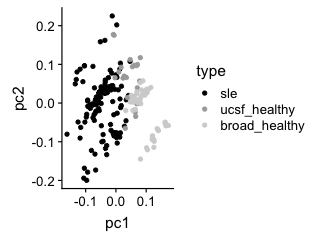

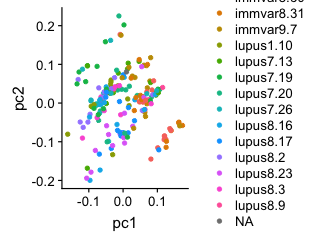

In [13]:
pbmc_expr_prcomp <- prcomp(pbmc_expr_std)

df <- rbind(data.frame(pc1=pbmc_expr_prcomp$rotation[sle_indices,1], pc2=pbmc_expr_prcomp$rotation[sle_indices,2], type="sle"),
            data.frame(pc1=pbmc_expr_prcomp$rotation[ucsf_healthy_indices,1], pc2=pbmc_expr_prcomp$rotation[ucsf_healthy_indices,2], type="ucsf_healthy"),
            data.frame(pc1=pbmc_expr_prcomp$rotation[broad_healthy_indices,1], pc2=pbmc_expr_prcomp$rotation[broad_healthy_indices,2], type="broad_healthy")
           )
df$batch = joined_pivot$batch_cov[match(rownames(df),joined_ind_cov_batch)]

options(repr.plot.width = 4, repr.plot.height = 3)
ggplot(aes(pc1,pc2,color=type),data=df)+geom_point()+scale_colour_manual(values=c("black","darkgray","lightgray"))

ggplot(aes(pc1,pc2,color=batch),data=df)+geom_point()

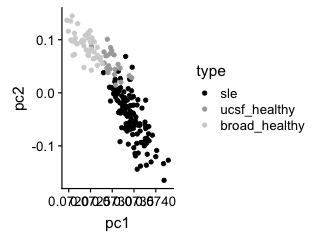

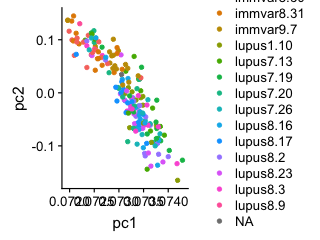

In [14]:
pbmc_expr_prcomp <- prcomp(pbmc_expr)

df <- rbind(data.frame(pc1=pbmc_expr_prcomp$rotation[sle_indices,1], pc2=pbmc_expr_prcomp$rotation[sle_indices,2], type="sle"),
            data.frame(pc1=pbmc_expr_prcomp$rotation[ucsf_healthy_indices,1], pc2=pbmc_expr_prcomp$rotation[ucsf_healthy_indices,2], type="ucsf_healthy"),
            data.frame(pc1=pbmc_expr_prcomp$rotation[broad_healthy_indices,1], pc2=pbmc_expr_prcomp$rotation[broad_healthy_indices,2], type="broad_healthy")
           )
df$batch = joined_pivot$batch_cov[match(rownames(df),joined_ind_cov_batch)]

options(repr.plot.width = 4, repr.plot.height = 3)
ggplot(aes(pc1,pc2,color=type),data=df)+geom_point()+scale_colour_manual(values=c("black","darkgray","lightgray"))

ggplot(aes(pc1,pc2,color=batch),data=df)+geom_point()

In [15]:
# pbmc_expr_prcomp <- prcomp(pbmc_expr_std[na.omit(match(pbmc_deseq_sig_genes,rownames(pbmc_expr_std))),])

# df <- rbind(data.frame(pc1=pbmc_expr_prcomp$rotation[sle_indices,1], pc2=pbmc_expr_prcomp$rotation[sle_indices,2], type="sle"),
#             data.frame(pc1=pbmc_expr_prcomp$rotation[ucsf_healthy_indices,1], pc2=pbmc_expr_prcomp$rotation[ucsf_healthy_indices,2], type="ucsf_healthy"),
#             data.frame(pc1=pbmc_expr_prcomp$rotation[broad_healthy_indices,1], pc2=pbmc_expr_prcomp$rotation[broad_healthy_indices,2], type="broad_healthy")
#            )
# df$batch = joined_pivot$batch_cov[match(rownames(df),joined_ind_cov_batch)]

# options(repr.plot.width = 4, repr.plot.height = 3)
# ggplot(aes(pc1,pc2,color=type),data=df)+geom_point()+scale_colour_manual(values=c("black","darkgray","lightgray"))

# ggplot(aes(pc1,pc2,color=batch),data=df)+geom_point()

## Load the raw counts from ```/ye/yelabstore2/10x.lupus/disease/demux.v2```

In [16]:
# ## either load only the original samples

# # cm_counts <- fread("v2.deseq/norep.noadjrace.CD14+.Monocytes.counts.txt");
# # colnames(cm_counts) <- sapply(colnames(cm_counts), function(x) {strsplit(x,"_")[[1]][[1]]})

# # th_counts <- fread("v2.deseq/norep.noadjrace.CD4.T.cells.counts.txt");
# # colnames(th_counts) <- sapply(colnames(th_counts), function(x) {strsplit(x,"_")[[1]][[1]]})

# # tc_counts <- fread("v2.deseq/norep.noadjrace.CD8.T.cells.counts.txt");
# # colnames(tc_counts) <- sapply(colnames(tc_counts), function(x) {strsplit(x,"_")[[1]][[1]]})

# # ncm_counts <- fread("v2.deseq/norep.noadjrace.FCGR3A+.Monocytes.counts.txt");
# # colnames(ncm_counts) <- sapply(colnames(ncm_counts), function(x) {strsplit(x,"_")[[1]][[1]]})

# # b_counts <- fread("v2.deseq/norep.noadjrace.B.cells.counts.txt");
# # colnames(b_counts) <- sapply(colnames(b_counts), function(x) {strsplit(x,"_")[[1]][[1]]})

# # nk_counts <- fread("v2.deseq/norep.noadjrace.NK.cells.counts.txt");
# # colnames(nk_counts) <- sapply(colnames(nk_counts), function(x) {strsplit(x,"_")[[1]][[1]]})

# # dc_counts <- fread("v2.deseq/norep.noadjrace.Dendritic.cells.counts.txt");
# # colnames(dc_counts) <- sapply(colnames(dc_counts), function(x) {strsplit(x,"_")[[1]][[1]]})

# # pbmc_counts <- fread("v2.deseq/norep.noadjrace.PBMC.counts.txt");
# # colnames(pbmc_counts) <- sapply(colnames(pbmc_counts), function(x) {strsplit(x,"_")[[1]][[1]]})


# ## or new with immvar as separate

# cm_counts <- fread("v5.deseq/v5.cM.counts.txt");
# colnames(cm_counts) <- sapply(colnames(cm_counts), function(x) {strsplit(x,"_")[[1]][[1]]})

# th_counts <- fread("v5.deseq/v5.Th.counts.txt");
# colnames(th_counts) <- sapply(colnames(th_counts), function(x) {strsplit(x,"_")[[1]][[1]]})

# tc_counts <- fread("v5.deseq/v5.Tc.counts.txt");
# colnames(tc_counts) <- sapply(colnames(tc_counts), function(x) {strsplit(x,"_")[[1]][[1]]})

# ncm_counts <- fread("v5.deseq/v5.ncM.counts.txt");
# colnames(ncm_counts) <- sapply(colnames(ncm_counts), function(x) {strsplit(x,"_")[[1]][[1]]})

# b_counts <- fread("v5.deseq/v5.B.counts.txt");
# colnames(b_counts) <- sapply(colnames(b_counts), function(x) {strsplit(x,"_")[[1]][[1]]})

# nk_counts <- fread("v5.deseq/v5.NK.counts.txt");
# colnames(nk_counts) <- sapply(colnames(nk_counts), function(x) {strsplit(x,"_")[[1]][[1]]})

# dc_counts <- fread("v5.deseq/v5.cDC.counts.txt");
# colnames(dc_counts) <- sapply(colnames(dc_counts), function(x) {strsplit(x,"_")[[1]][[1]]})

# pbmc_counts <- fread("v5.deseq/v5.PBMC.counts.txt");
# colnames(pbmc_counts) <- sapply(colnames(pbmc_counts), function(x) {strsplit(x,"_")[[1]][[1]]})


# counts_gene_names <- cm_counts$gene;
# cm_counts <- as.matrix(cm_counts[,-1]);
# pbmc_counts <- as.matrix(pbmc_counts[,-1]);
# th_counts <- as.matrix(th_counts[,-1]);
# tc_counts <- as.matrix(tc_counts[,-1]);
# b_counts <- as.matrix(b_counts[,-1]);
# ncm_counts <- as.matrix(ncm_counts[,-1]);
# nk_counts <- as.matrix(nk_counts[,-1]);
# dc_counts <- as.matrix(dc_counts[,-1]);

# all_counts_samples <- na.omit(match(colnames(pbmc_expr), colnames(pbmc_counts)))

# cm_counts <- cm_counts[,all_counts_samples]
# pbmc_counts <- pbmc_counts[,all_counts_samples]
# th_counts <- th_counts[,all_counts_samples]
# tc_counts <- tc_counts[,all_counts_samples]
# b_counts <- b_counts[,all_counts_samples]
# ncm_counts <- ncm_counts[,all_counts_samples]
# nk_counts <- nk_counts[,all_counts_samples]
# dc_counts <- dc_counts[,all_counts_samples]

# # sle_counts_samples <- na.omit(match(colnames(pbmc_sle_expr), colnames(pbmc_counts)))

# # cm_sle_counts <- cm_counts[,sle_counts_samples]
# # th_sle_counts <- th_counts[,sle_counts_samples]
# # tc_sle_counts <- tc_counts[,sle_counts_samples]
# # ncm_sle_counts <- ncm_counts[,sle_counts_samples]
# # b_sle_counts <- b_counts[,sle_counts_samples]
# # nk_sle_counts <- nk_counts[,sle_counts_samples]
# # dc_sle_counts <- dc_counts[,sle_counts_samples]
# # pbmc_sle_counts <- pbmc_counts[,sle_counts_samples]


# # healthy_counts_samples <- na.omit(match(colnames(pbmc_healthy_expr), colnames(pbmc_counts)))

# # cm_healthy_counts <- cm_counts[,healthy_counts_samples]
# # th_healthy_counts <- th_counts[,healthy_counts_samples]
# # tc_healthy_counts <- tc_counts[,healthy_counts_samples]
# # ncm_healthy_counts <- ncm_counts[,healthy_counts_samples]
# # b_healthy_counts <- b_counts[,healthy_counts_samples]
# # nk_healthy_counts <- nk_counts[,healthy_counts_samples]
# # dc_healthy_counts <- dc_counts[,healthy_counts_samples]
# # pbmc_healthy_counts <- pbmc_counts[,healthy_counts_samples]



## Load the differentially expression results

In [17]:
pbmc_deseq <- fread("v5.deseq/v5..PBMC.deseq.txt")##as.data.frame()
th_deseq <- as.data.frame(fread("v5.deseq/v5..Th.deseq.txt"))
tc_deseq <- as.data.frame(fread("v5.deseq/v5..Tc.deseq.txt"))
cm_deseq <- as.data.frame(fread("v5.deseq/v5..cM.deseq.txt"))
ncm_deseq <- as.data.frame(fread("v5.deseq/v5..ncM.deseq.txt"))
b_deseq <- as.data.frame(fread("v5.deseq/v5..B.deseq.txt"))
nk_deseq <- as.data.frame(fread("v5.deseq/v5..NK.deseq.txt"))
cdc_deseq <- as.data.frame(fread("v5.deseq/v5..cDC.deseq.txt"))
pdc_deseq <- as.data.frame(fread("v5.deseq/v5..pDC.deseq.txt"))

pbmc_deseq_sig <- as.data.frame(fread("v5.deseq/v5..PBMC.deseq.sig.txt",header=F))$V1
th_deseq_sig <- as.data.frame(fread("v5.deseq/v5..Th.deseq.sig.txt",header=F))$V1
tc_deseq_sig <- as.data.frame(fread("v5.deseq/v5..Tc.deseq.sig.txt",header=F))$V1
cm_deseq_sig <- as.data.frame(fread("v5.deseq/v5..cM.deseq.sig.txt",header=F))$V1
ncm_deseq_sig <- as.data.frame(fread("v5.deseq/v5..ncM.deseq.sig.txt",header=F))$V1
b_deseq_sig <- as.data.frame(fread("v5.deseq/v5..B.deseq.sig.txt",header=F))$V1
nk_deseq_sig <- as.data.frame(fread("v5.deseq/v5..NK.deseq.sig.txt",header=F))$V1
cdc_deseq_sig <- as.data.frame(fread("v5.deseq/v5..cDC.deseq.sig.txt",header=F))$V1
pdc_deseq_sig <- as.data.frame(fread("v5.deseq/v5..pDC.deseq.sig.txt",header=F))$V1
union_deseq_sig <- unique(c(pbmc_deseq_sig, cm_deseq_sig, th_deseq_sig, 
                            tc_deseq_sig, b_deseq_sig, ncm_deseq_sig, nk_deseq_sig, cdc_deseq_sig, pdc_deseq_sig));

Warning message in fread("v5.deseq/v5..PBMC.deseq.txt"):
“Detected 7 column names but the data has 8 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”Warning message in fread("v5.deseq/v5..Th.deseq.txt"):
“Detected 7 column names but the data has 8 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”Warning message in fread("v5.deseq/v5..Tc.deseq.txt"):
“Detected 7 column names but the data has 8 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not 

In [18]:
pbmc_deseq_sig_genes <- pbmc_deseq$V1[intersect(which(pbmc_deseq$baseMean > 25), intersect(which(abs(pbmc_deseq$log2FoldChange)>1),which(pbmc_deseq$qval < 0.01)))]
cm_deseq_sig_genes <- cm_deseq$V1[intersect(which(cm_deseq$baseMean > 25), intersect(which(abs(cm_deseq$log2FoldChange)>1),which(cm_deseq$qval < 0.01)))]
th_deseq_sig_genes <- th_deseq$V1[intersect(which(th_deseq$baseMean > 25), intersect(which(abs(th_deseq$log2FoldChange)>1),which(th_deseq$qval < 0.01)))]
tc_deseq_sig_genes <- tc_deseq$V1[intersect(which(tc_deseq$baseMean > 25), intersect(which(abs(tc_deseq$log2FoldChange)>1),which(tc_deseq$qval < 0.01)))]
b_deseq_sig_genes <- b_deseq$V1[intersect(which(b_deseq$baseMean > 25), intersect(which(abs(b_deseq$log2FoldChange)>1),which(b_deseq$qval < 0.01)))]
ncm_deseq_sig_genes <- ncm_deseq$V1[intersect(which(ncm_deseq$baseMean > 25), intersect(which(abs(ncm_deseq$log2FoldChange)>1),which(ncm_deseq$qval < 0.01)))]
nk_deseq_sig_genes <- nk_deseq$V1[intersect(which(nk_deseq$baseMean > 25), intersect(which(abs(nk_deseq$log2FoldChange)>1),which(nk_deseq$qval < 0.01)))]
cdc_deseq_sig_genes <- cdc_deseq$V1[intersect(which(cdc_deseq$baseMean > 25), intersect(which(abs(cdc_deseq$log2FoldChange)>1),which(cdc_deseq$qval < 0.01)))]
pdc_deseq_sig_genes <- pdc_deseq$V1[intersect(which(pdc_deseq$baseMean > 25), intersect(which(abs(pdc_deseq$log2FoldChange)>1),which(pdc_deseq$qval < 0.01)))]

union_deseq_sig_genes <- unique(c(pbmc_deseq_sig_genes, cm_deseq_sig_genes, ncm_deseq_sig_genes, cdc_deseq_sig_genes, pdc_deseq_sig_genes, th_deseq_sig_genes, tc_deseq_sig_genes,  nk_deseq_sig_genes,b_deseq_sig_genes))
length(union_deseq_sig_genes)
length(pbmc_deseq_sig_genes)
length(intersect(pbmc_deseq_sig_genes, union_deseq_sig_genes))

deseq_sig_genes <- union_deseq_sig_genes

[1] 212

[1] 149

[1] 149

In [19]:
standardize <- function(x) {(x-mean(x))/sd(x)}

all_expr_standardize <- data.frame(pbmc=t(apply(pbmc_expr,1,standardize)),
                                   cm=t(apply(cm_expr,1,standardize)),
                                   ncm=t(apply(ncm_expr,1,standardize)),
                                   cdc=t(apply(cdc_expr,1,standardize)),
                                   pdc=t(apply(pdc_expr,1,standardize)),
                                   th=t(apply(th_expr,1,standardize)),
                                   tc=t(apply(tc_expr,1,standardize)),
                                   nk=t(apply(nk_expr,1,standardize)),
                                   b=t(apply(b_expr,1,standardize)))


all_expr <- data.frame(pbmc=pbmc_expr,
                      cm=cm_expr,
                      ncm=ncm_expr,
                      cdc=cdc_expr,
                       pdc=pdc_expr,
                      th=th_expr,
                      tc=tc_expr,
                      nk=nk_expr,
                      b=b_expr
                      )

all_expr_sle <- data.frame(pbmc=pbmc_sle_expr,
                      cm=cm_sle_expr,
                      ncm=ncm_sle_expr,
                      cdc=cdc_sle_expr,
                      pdc=pdc_sle_expr,
                      th=th_sle_expr,
                      tc=tc_sle_expr,
                       nk=nk_sle_expr,
                      b=b_sle_expr
                      )
rownames(all_expr_sle) <- rownames(all_expr)


In [20]:
set.seed(1)
kmeans_rst <- kmeans(all_expr[match(deseq_sig_genes,expr_gene_names),], 7)

cell_types <- c("PBMC","cM","ncM", "cDC","pDC","Th","Tc","NK","B")
ct_annotation <- data.frame(type=factor(rep(cell_types,each=ncol(ncm_expr))),
                           disease=factor(rep(c(rep("sle",ncol(cm_sle_expr)),
                                                rep("ucsf_ctrl",ncol(cm_ucsf_healthy_expr)),
                                                rep("broad_ctrl",ncol(cm_broad_healthy_expr))),
                                              length(cell_types))))
rownames(ct_annotation) <- colnames(all_expr);

kmeans_annotation <- data.frame(cluster=factor(kmeans_rst$cluster,levels=c("1","2","6","7","3","4","5")))
rownames(kmeans_annotation) <- deseq_sig_genes;

all_expr_sig <- all_expr[match(deseq_sig_genes,expr_gene_names),]
all_expr_sig_ordered <- all_expr[match(deseq_sig_genes,expr_gene_names),][order(kmeans_annotation$cluster),]

all_expr_standardize_sig <- all_expr_standardize[match(deseq_sig_genes,expr_gene_names),]
all_expr_standardize_sig_ordered <- all_expr_standardize[match(deseq_sig_genes,expr_gene_names),][order(kmeans_annotation$cluster),]

kmeans_ordered_annotation <- kmeans_annotation[order(kmeans_annotation$cluster),]

all_expr_sle_sig <- all_expr_sle[match(deseq_sig_genes,expr_gene_names),]
all_expr_sle_sig_ordered <- all_expr_sle[match(deseq_sig_genes,expr_gene_names),][order(kmeans_annotation$cluster),]
##kmeans_ordered_annotation <- kmeans_annotation[order(kmeans_annotation$cluster),]


##bct_annotation <- list(ct_annotation=ct_annotation)

## Load the joined table and preprocess the expression and counts data

In [21]:
# joined_pivot <- fread(paste(name,'_joined_pivot_ct_perc.txt', sep=""), sep=",")
# joined_pivot <- as.data.frame(joined_pivot);
# ## filter for ucsf healthy only
# ##joined_pivot <- joined_pivot[grep("lupus",joined_pivot$batch_cov),]

joined_ind_cov_batch = paste(joined_pivot$ind_cov, joined_pivot$batch, sep="_")

# ##joined_pivot$batch_cov <- as.factor(joined_pivot$batch_cov)

# ind_cov = sapply(cm_covs[,"sample"], function(x) {strsplit(as.character(x),"_")[[1]][[1]]})
# ind_cov_batch = paste(ind_cov, cm_covs[,"batch"], sep="_")
# joined_ind_cov_batch = paste(joined_pivot$ind_cov, joined_pivot$batch, sep="_")
# ucsf_samples_nodups <- na.omit(match(joined_ind_cov_batch, ind_cov_batch));

# joined_pivot_filtered <- joined_pivot[match(c(colnames(pbmc_sle_expr),colnames(pbmc_ucsf_healthy_expr),colnames(pbmc_broad_healthy_expr)),joined_ind_cov_batch),]
joined_pivot_sle <- joined_pivot[match(colnames(pbmc_sle_expr), joined_ind_cov_batch),]
joined_pivot_ucsf_healthy <- joined_pivot[match(colnames(pbmc_ucsf_healthy_expr), joined_ind_cov_batch),]
joined_pivot_broad_healthy <- joined_pivot[match(colnames(pbmc_broad_healthy_expr), joined_ind_cov_batch),]

## get the cell type proportions

In [22]:
cm_prop = joined_pivot$"cM";##/joined_pivot_filtered$pbmc;
th_prop = joined_pivot$"Th";##/joined_pivot_filtered$pbmc;
b_prop = joined_pivot$"B";##/joined_pivot_filtered$pbmc;
nk_prop = joined_pivot$"NK";##/joined_pivot_filtered$pbmc;
ncm_prop = joined_pivot$"ncM";#/joined_pivot_filtered$pbmc;
tc_prop = joined_pivot$"Tc";#/joined_pivot_filtered$pbmc;
cdc_prop = joined_pivot$"cDC";#/joined_pivot_filtered$pbmc;
pdc_prop = joined_pivot$"pDC";#/joined_pivot_filtered$pbmc;

joined_ind_cov_batch = paste(joined_pivot$ind_cov, joined_pivot$batch, sep="_")

## set the NAs to 0
b_prop[which(is.na(b_prop))] <- 0;
cdc_prop[which(is.na(cdc_prop))] <- 0;
pdc_prop[which(is.na(pdc_prop))] <- 0;

cm_sle_prop = cm_prop[match(colnames(pbmc_sle_expr), joined_ind_cov_batch)]
th_sle_prop = th_prop[match(colnames(pbmc_sle_expr), joined_ind_cov_batch)]
b_sle_prop = b_prop[match(colnames(pbmc_sle_expr), joined_ind_cov_batch)]
nk_sle_prop = nk_prop[match(colnames(pbmc_sle_expr), joined_ind_cov_batch)]
ncm_sle_prop = ncm_prop[match(colnames(pbmc_sle_expr), joined_ind_cov_batch)]
tc_sle_prop = tc_prop[match(colnames(pbmc_sle_expr), joined_ind_cov_batch)]
cdc_sle_prop = cdc_prop[match(colnames(pbmc_sle_expr), joined_ind_cov_batch)]
pdc_sle_prop = pdc_prop[match(colnames(pbmc_sle_expr), joined_ind_cov_batch)]
names(cm_sle_prop) <- names(th_sle_prop) <- names(b_sle_prop) <- names(nk_sle_prop) <- names(ncm_sle_prop) <- names(tc_sle_prop) <- names(cdc_sle_prop) <- names(pdc_sle_prop) <- joined_ind_cov_batch[match(colnames(pbmc_sle_expr), joined_ind_cov_batch)]

cm_ucsf_healthy_prop = cm_prop[match(colnames(pbmc_ucsf_healthy_expr), joined_ind_cov_batch)]
th_ucsf_healthy_prop = th_prop[match(colnames(pbmc_ucsf_healthy_expr), joined_ind_cov_batch)]
b_ucsf_healthy_prop = b_prop[match(colnames(pbmc_ucsf_healthy_expr), joined_ind_cov_batch)]
nk_ucsf_healthy_prop = nk_prop[match(colnames(pbmc_ucsf_healthy_expr), joined_ind_cov_batch)]
ncm_ucsf_healthy_prop = ncm_prop[match(colnames(pbmc_ucsf_healthy_expr), joined_ind_cov_batch)]
tc_ucsf_healthy_prop = tc_prop[match(colnames(pbmc_ucsf_healthy_expr), joined_ind_cov_batch)]
cdc_ucsf_healthy_prop = cdc_prop[match(colnames(pbmc_ucsf_healthy_expr), joined_ind_cov_batch)]
pdc_ucsf_healthy_prop = pdc_prop[match(colnames(pbmc_ucsf_healthy_expr), joined_ind_cov_batch)]
names(cm_ucsf_healthy_prop) <- names(th_ucsf_healthy_prop) <- names(b_ucsf_healthy_prop) <- names(nk_ucsf_healthy_prop) <- names(ncm_ucsf_healthy_prop) <- names(tc_ucsf_healthy_prop) <- names(cdc_ucsf_healthy_prop) <- names(pdc_ucsf_healthy_prop)<- joined_ind_cov_batch[match(colnames(pbmc_ucsf_healthy_expr), joined_ind_cov_batch)]

cm_broad_healthy_prop = cm_prop[match(colnames(pbmc_broad_healthy_expr), joined_ind_cov_batch)]
th_broad_healthy_prop = th_prop[match(colnames(pbmc_broad_healthy_expr), joined_ind_cov_batch)]
b_broad_healthy_prop = b_prop[match(colnames(pbmc_broad_healthy_expr), joined_ind_cov_batch)]
nk_broad_healthy_prop = nk_prop[match(colnames(pbmc_broad_healthy_expr), joined_ind_cov_batch)]
ncm_broad_healthy_prop = ncm_prop[match(colnames(pbmc_broad_healthy_expr), joined_ind_cov_batch)]
tc_broad_healthy_prop = tc_prop[match(colnames(pbmc_broad_healthy_expr), joined_ind_cov_batch)]
cdc_broad_healthy_prop = cdc_prop[match(colnames(pbmc_broad_healthy_expr), joined_ind_cov_batch)]
pdc_broad_healthy_prop = pdc_prop[match(colnames(pbmc_broad_healthy_expr), joined_ind_cov_batch)]
names(cm_broad_healthy_prop) <- names(th_broad_healthy_prop) <- names(b_broad_healthy_prop) <- names(nk_broad_healthy_prop) <- names(ncm_broad_healthy_prop) <- names(tc_broad_healthy_prop) <- names(cdc_broad_healthy_prop)<- names(pdc_broad_healthy_prop)  <- joined_ind_cov_batch[match(colnames(pbmc_broad_healthy_expr), joined_ind_cov_batch)]


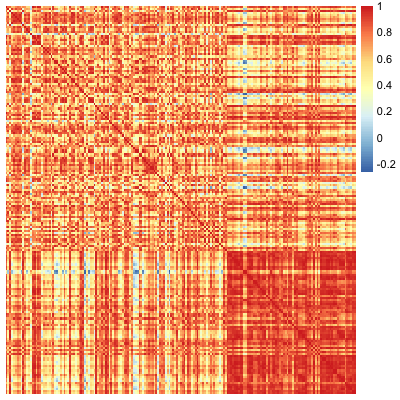

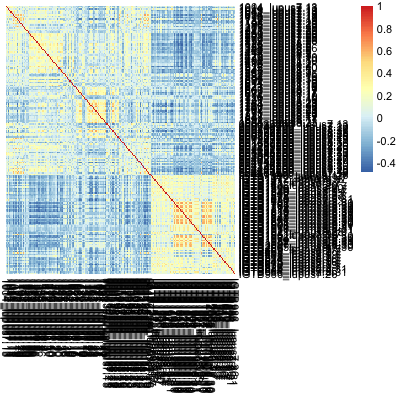

In [23]:
options(repr.plot.width = 5, repr.plot.height = 5)
pheatmap(cor(t(cbind(cm_prop, th_prop, b_prop, nk_prop, ncm_prop, tc_prop, cdc_prop, pdc_prop))),cluster_rows=F,cluster_cols=F)
options(repr.plot.width = 5, repr.plot.height = 5)
pheatmap(cor(cbind(pbmc_expr_std)),cluster_rows=F,cluster_cols=F)

# Let's do some batch adjustments

## first, let's adjust cell type proportion

In [24]:
# cm_prop_mean = lm(cm_prop~1)$fitted;
# th_prop_mean = lm(th_prop~1)$fitted;
# b_prop_mean = lm(b_prop~1)$fitted;
# nk_prop_mean = lm(nk_prop~1)$fitted;
# ncm_prop_mean = lm(ncm_prop~1)$fitted;
# tc_prop_mean = lm(tc_prop~1)$fitted;
# dc_prop_mean = lm(dc_prop~1)$fitted;

# cm_prop = lm(cm_prop~joined_pivot$batch_cov)$residual+cm_prop_mean;
# th_prop = lm(th_prop~joined_pivot$batch_cov)$residual+th_prop_mean;
# b_prop = lm(b_prop~joined_pivot$batch_cov)$residual+b_prop_mean;
# nk_prop = lm(nk_prop~joined_pivot$batch_cov)$residual+nk_prop_mean;
# ncm_prop = lm(ncm_prop~joined_pivot$batch_cov)$residual+ncm_prop_mean;
# tc_prop = lm(tc_prop~joined_pivot$batch_cov)$residual+tc_prop_mean;
# dc_prop = lm(dc_prop~joined_pivot$batch_cov)$residual+dc_prop_mean;
props <- as.matrix(data.frame(cM=cm_prop, Th=th_prop, B=b_prop, NK=nk_prop, ncM=ncm_prop, Tc=tc_prop, cDC=cdc_prop, pDC=pdc_prop));

# cm_sle_prop_mean = lm(cm_sle_prop~1)$fitted;
# th_sle_prop_mean = lm(th_sle_prop~1)$fitted;
# b_sle_prop_mean = lm(b_sle_prop~1)$fitted;
# ncm_sle_prop_mean = lm(ncm_sle_prop~1)$fitted;
# nk_sle_prop_mean = lm(nk_sle_prop~1)$fitted;
# tc_sle_prop_mean = lm(tc_sle_prop~1)$fitted;
# dc_sle_prop_mean = lm(dc_sle_prop~1)$fitted;

# cm_sle_prop = lm(cm_sle_prop~joined_pivot_sle$batch_cov)$residual+cm_sle_prop_mean;
# th_sle_prop = lm(th_sle_prop~joined_pivot_sle$batch_cov)$residual+th_sle_prop_mean;
# b_sle_prop = lm(b_sle_prop~joined_pivot_sle$batch_cov)$residual+b_sle_prop_mean;
# nk_sle_prop = lm(nk_sle_prop~joined_pivot_sle$batch_cov)$residual+nk_sle_prop_mean;
# ncm_sle_prop = lm(ncm_sle_prop~joined_pivot_sle$batch_cov)$residual+ncm_sle_prop_mean;
# tc_sle_prop = lm(tc_sle_prop~joined_pivot_sle$batch_cov)$residual+tc_sle_prop_mean;
# dc_sle_prop = lm(dc_sle_prop~joined_pivot_sle$batch_cov)$residual+dc_sle_prop_mean;
props_sle <- as.matrix(data.frame(cM=cm_sle_prop, Th=th_sle_prop, B=b_sle_prop, NK=nk_sle_prop, ncM=ncm_sle_prop, Tc=tc_sle_prop, cDC=cdc_sle_prop, pDC=pdc_sle_prop));

# cm_ucsf_healthy_prop_mean = lm(cm_ucsf_healthy_prop~1)$fitted;
# th_ucsf_healthy_prop_mean = lm(th_ucsf_healthy_prop~1)$fitted;
# b_ucsf_healthy_prop_mean = lm(b_ucsf_healthy_prop~1)$fitted;
# ncm_ucsf_healthy_prop_mean = lm(ncm_ucsf_healthy_prop~1)$fitted;
# nk_ucsf_healthy_prop_mean = lm(nk_ucsf_healthy_prop~1)$fitted;
# tc_ucsf_healthy_prop_mean = lm(tc_ucsf_healthy_prop~1)$fitted;
# dc_ucsf_healthy_prop_mean = lm(dc_ucsf_healthy_prop~1)$fitted;

# cm_ucsf_healthy_prop = lm(cm_ucsf_healthy_prop~joined_pivot_ucsf_healthy$batch_cov)$residual+cm_ucsf_healthy_prop_mean;
# th_ucsf_healthy_prop = lm(th_ucsf_healthy_prop~joined_pivot_ucsf_healthy$batch_cov)$residual+th_ucsf_healthy_prop_mean;
# b_ucsf_healthy_prop = lm(b_ucsf_healthy_prop~joined_pivot_ucsf_healthy$batch_cov)$residual+b_ucsf_healthy_prop_mean;
# nk_ucsf_healthy_prop = lm(nk_ucsf_healthy_prop~joined_pivot_ucsf_healthy$batch_cov)$residual+nk_ucsf_healthy_prop_mean;
# ncm_ucsf_healthy_prop = lm(ncm_ucsf_healthy_prop~joined_pivot_ucsf_healthy$batch_cov)$residual+ncm_ucsf_healthy_prop_mean;
# tc_ucsf_healthy_prop = lm(tc_ucsf_healthy_prop~joined_pivot_ucsf_healthy$batch_cov)$residual+tc_ucsf_healthy_prop_mean;
# dc_ucsf_healthy_prop = lm(dc_ucsf_healthy_prop~joined_pivot_ucsf_healthy$batch_cov)$residual+dc_ucsf_healthy_prop_mean;
props_ucsf_healthy <- as.matrix(data.frame(cM=cm_ucsf_healthy_prop, Th=th_ucsf_healthy_prop, B=b_ucsf_healthy_prop, NK=nk_ucsf_healthy_prop, ncM=ncm_ucsf_healthy_prop, Tc=tc_ucsf_healthy_prop, cDC=cdc_ucsf_healthy_prop, pDC=pdc_ucsf_healthy_prop));

# cm_broad_healthy_prop_mean = lm(cm_broad_healthy_prop~1)$fitted;
# th_broad_healthy_prop_mean = lm(th_broad_healthy_prop~1)$fitted;
# b_broad_healthy_prop_mean = lm(b_broad_healthy_prop~1)$fitted;
# ncm_broad_healthy_prop_mean = lm(ncm_broad_healthy_prop~1)$fitted;
# nk_broad_healthy_prop_mean = lm(nk_broad_healthy_prop~1)$fitted;
# tc_broad_healthy_prop_mean = lm(tc_broad_healthy_prop~1)$fitted;
# dc_broad_healthy_prop_mean = lm(dc_broad_healthy_prop~1)$fitted;

# cm_broad_healthy_prop = lm(cm_broad_healthy_prop~joined_pivot_broad_healthy$batch_cov)$residual+cm_broad_healthy_prop_mean;
# th_broad_healthy_prop = lm(th_broad_healthy_prop~joined_pivot_broad_healthy$batch_cov)$residual+th_broad_healthy_prop_mean;
# b_broad_healthy_prop = lm(b_broad_healthy_prop~joined_pivot_broad_healthy$batch_cov)$residual+b_broad_healthy_prop_mean;
# nk_broad_healthy_prop = lm(nk_broad_healthy_prop~joined_pivot_broad_healthy$batch_cov)$residual+nk_broad_healthy_prop_mean;
# ncm_broad_healthy_prop = lm(ncm_broad_healthy_prop~joined_pivot_broad_healthy$batch_cov)$residual+ncm_broad_healthy_prop_mean;
# tc_broad_healthy_prop = lm(tc_broad_healthy_prop~joined_pivot_broad_healthy$batch_cov)$residual+tc_broad_healthy_prop_mean;
# dc_broad_healthy_prop = lm(dc_broad_healthy_prop~joined_pivot_broad_healthy$batch_cov)$residual+dc_broad_healthy_prop_mean;
props_broad_healthy <- as.matrix(data.frame(cM=cm_broad_healthy_prop, Th=th_broad_healthy_prop, B=b_broad_healthy_prop, NK=nk_broad_healthy_prop, ncM=ncm_broad_healthy_prop, Tc=tc_broad_healthy_prop, cDC=cdc_broad_healthy_prop, pDC=pdc_broad_healthy_prop));


## second, let's adjust cell type specific expression

In [25]:
pbmc_mean <- t(lm(t(pbmc_expr)~1)$fitted)
cm_mean <- t(lm(t(cm_expr)~1)$fitted)
th_mean <- t(lm(t(th_expr)~1)$fitted)
b_mean <- t(lm(t(b_expr)~1)$fitted)
nk_mean <- t(lm(t(nk_expr)~1)$fitted)
ncm_mean <- t(lm(t(ncm_expr)~1)$fitted)
tc_mean <- t(lm(t(tc_expr)~1)$fitted)
cdc_mean <- t(lm(t(cdc_expr)~1)$fitted)
pdc_mean <- t(lm(t(pdc_expr)~1)$fitted)

joined_pivot$seq_batch_cov <- grep("immvar",joined_pivot$batch_cov)

modcombat = model.matrix(~disease_cov, data=joined_pivot);
# modcombat = model.matrix(~1, data=joined_pivot);

pbmc_expr <- ComBat(dat=pbmc_expr, batch=joined_pivot$batch_cov, mod=modcombat, par.prior=TRUE, prior.plots=FALSE)#, mean.only=TRUE)
cm_expr <-  ComBat(dat=cm_expr, batch=joined_pivot$batch_cov, mod=modcombat, par.prior=TRUE, prior.plots=FALSE)#, mean.only=TRUE)
th_expr <-  ComBat(dat=th_expr, batch=joined_pivot$batch_cov, mod=modcombat, par.prior=TRUE, prior.plots=FALSE)#, mean.only=TRUE)
b_expr <-  ComBat(dat=b_expr, batch=joined_pivot$batch_cov, mod=modcombat, par.prior=TRUE, prior.plots=FALSE)#, mean.only=TRUE)
nk_expr <-  ComBat(dat=nk_expr, batch=joined_pivot$batch_cov, mod=modcombat, par.prior=TRUE, prior.plots=FALSE)#, mean.only=TRUE)
ncm_expr <-  ComBat(dat=ncm_expr, batch=joined_pivot$batch_cov, mod=modcombat, par.prior=TRUE, prior.plots=FALSE)#, mean.only=TRUE)
tc_expr <-  ComBat(dat=tc_expr, batch=joined_pivot$batch_cov, mod=modcombat, par.prior=TRUE, prior.plots=FALSE)#, mean.only=TRUE)
cdc_expr <-  ComBat(dat=cdc_expr, batch=joined_pivot$batch_cov, mod=modcombat, par.prior=TRUE, prior.plots=FALSE)#, mean.only=TRUE)
pdc_expr <-  ComBat(dat=pdc_expr, batch=joined_pivot$batch_cov, mod=modcombat, par.prior=TRUE, prior.plots=FALSE)#, mean.only=TRUE)

exprs <- array(c(cm_expr, th_expr, b_expr, nk_expr, ncm_expr, tc_expr, cdc_expr, pdc_expr),
               c(nrow(cm_expr) , ncol(cm_expr), 8),
               list(rownames(cm_expr),colnames(cm_expr),c("cM","Th","B","NK","ncM","Tc","cDC","pDC")))


Warning message in `[<-.data.table`(x, j = name, value = value):
“Supplied 47 items to be assigned to 187 items of column 'seq_batch_cov' (recycled leaving remainder of 46 items).”Found14batches
Adjusting for1covariate(s) or covariate level(s)


Standardizing Data across genes


Fitting L/S model and finding priors
Finding parametric adjustments
Adjusting the Data

Found14batches
Adjusting for1covariate(s) or covariate level(s)


Standardizing Data across genes


Fitting L/S model and finding priors
Finding parametric adjustments
Adjusting the Data

Found14batches
Adjusting for1covariate(s) or covariate level(s)


Standardizing Data across genes


Fitting L/S model and finding priors
Finding parametric adjustments
Adjusting the Data

Found14batches
Adjusting for1covariate(s) or covariate level(s)


Standardizing Data across genes


Fitting L/S model and finding priors
Finding parametric adjustments
Adjusting the Data

Found14batches
Adjusting for1covariate(s) or covariate level(s)


Standardizing Data across genes


Fitting L/S model and finding priors
Finding parametric adjustments
Adjusting the Data

Found14batches
Adjusting for1covariate(s) or covariate level(s)


Standardizing Data across genes


Fitting L/S model and finding priors
Finding parametric adjustments
Adjusting the Data

Found14batches
Adjusting for1covariate(s) or covariate level(s)


Standardizing Data across genes


Fitting L/S model and finding priors
Finding parametric adjustments
Adjusting the Data

Found14batches
Adjusting for1covariate(s) or covariate level(s)


Standardizing Data across genes


Fitting L/S model and finding priors
Finding parametric adjustments
Adjusting the Data

Found14batches
Adjusting for1covariate(s) or covariate level(s)


Standardizing Data across genes


Fitting L/S model and finding priors
Finding parametric adjustments
Adjusting the Data



In [26]:
pbmc_expr_std <- t(apply(pbmc_expr,1,standardize))
cm_expr_std <- t(apply(cm_expr,1,standardize))
cm_expr_std[is.na(cm_expr_std)] <- 0
th_expr_std <- t(apply(th_expr,1,standardize))
th_expr_std[is.na(th_expr_std)] <- 0
b_expr_std <- t(apply(b_expr,1,standardize))
b_expr_std[is.na(b_expr_std)] <- 0
nk_expr_std <- t(apply(nk_expr,1,standardize))
nk_expr_std[is.na(nk_expr_std)] <- 0
ncm_expr_std <- t(apply(ncm_expr,1,standardize))
ncm_expr_std[is.na(ncm_expr_std)] <- 0
tc_expr_std <- t(apply(tc_expr,1,standardize))
tc_expr_std[is.na(tc_expr_std)] <- 0
cdc_expr_std <- t(apply(cdc_expr,1,standardize))
cdc_expr_std[is.na(cdc_expr_std)] <- 0
pdc_expr_std <- t(apply(pdc_expr,1,standardize))
pdc_expr_std[is.na(pdc_expr_std)] <- 0

exprs_std <- array(c(cm_expr_std, th_expr_std, b_expr_std, nk_expr_std, ncm_expr_std, tc_expr_std, cdc_expr_std, pdc_expr_std),
                   c(nrow(cm_expr) , ncol(cm_expr), 8), 
                   list(rownames(cm_expr),colnames(cm_expr),c("cM","Th","B","NK","ncM","Tc","cDC","pDC")))

cm_sle_expr <- cm_expr[,sle_indices]
th_sle_expr <- th_expr[,sle_indices]
tc_sle_expr <- tc_expr[,sle_indices]
ncm_sle_expr <- ncm_expr[,sle_indices]
b_sle_expr <- b_expr[,sle_indices]
nk_sle_expr <- nk_expr[,sle_indices]
cdc_sle_expr <- cdc_expr[,sle_indices]
pdc_sle_expr <- pdc_expr[,sle_indices]
pbmc_sle_expr <- pbmc_expr[,sle_indices]
exprs_sle <- array(c(cm_sle_expr, th_sle_expr, b_sle_expr, nk_sle_expr, ncm_sle_expr, tc_sle_expr, cdc_sle_expr, pdc_sle_expr),
                       c(nrow(cm_sle_expr) , ncol(cm_sle_expr), 8),
                       list(rownames(cm_sle_expr),colnames(cm_sle_expr),c("cM","Th","B","NK","ncM","Tc","cDC","pDC")))

pbmc_sle_expr_std <- t(apply(pbmc_sle_expr,1,standardize))
cm_sle_expr_std <- t(apply(cm_sle_expr,1,standardize))
cm_sle_expr_std[is.na(cm_sle_expr_std)] <- 0
th_sle_expr_std <- t(apply(th_sle_expr,1,standardize))
th_sle_expr_std[is.na(th_sle_expr_std)] <- 0
b_sle_expr_std <- t(apply(b_sle_expr,1,standardize))
b_sle_expr_std[is.na(b_sle_expr_std)] <- 0
nk_sle_expr_std <- t(apply(nk_sle_expr,1,standardize))
nk_sle_expr_std[is.na(nk_sle_expr_std)] <- 0
ncm_sle_expr_std <- t(apply(ncm_sle_expr,1,standardize))
ncm_sle_expr_std[is.na(ncm_sle_expr_std)] <- 0
tc_sle_expr_std <- t(apply(tc_sle_expr,1,standardize))
tc_sle_expr_std[is.na(tc_sle_expr_std)] <- 0
cdc_sle_expr_std <- t(apply(cdc_sle_expr,1,standardize))
cdc_sle_expr_std[is.na(cdc_sle_expr_std)] <- 0
pdc_sle_expr_std <- t(apply(pdc_sle_expr,1,standardize))
pdc_sle_expr_std[is.na(pdc_sle_expr_std)] <- 0

exprs_sle_std <- array(c(cm_sle_expr_std, th_sle_expr_std, b_sle_expr_std, nk_sle_expr_std, ncm_sle_expr_std, tc_sle_expr_std, cdc_sle_expr_std, pdc_sle_expr_std),
                       c(nrow(cm_sle_expr) , ncol(cm_sle_expr), 8),
                       list(rownames(cm_sle_expr),colnames(cm_sle_expr),c("cM","Th","B","NK","ncM","Tc","cDC","pDC")))

cm_ucsf_healthy_expr <- cm_expr[,ucsf_healthy_indices]
th_ucsf_healthy_expr <- th_expr[,ucsf_healthy_indices]
tc_ucsf_healthy_expr <- tc_expr[,ucsf_healthy_indices]
ncm_ucsf_healthy_expr <- ncm_expr[,ucsf_healthy_indices]
b_ucsf_healthy_expr <- b_expr[,ucsf_healthy_indices]
nk_ucsf_healthy_expr <- nk_expr[,ucsf_healthy_indices]
cdc_ucsf_healthy_expr <- cdc_expr[,ucsf_healthy_indices]
pdc_ucsf_healthy_expr <- pdc_expr[,ucsf_healthy_indices]
pbmc_ucsf_healthy_expr <- pbmc_expr[,ucsf_healthy_indices]
exprs_ucsf_healthy <- array(c(cm_ucsf_healthy_expr, th_ucsf_healthy_expr, b_ucsf_healthy_expr, nk_ucsf_healthy_expr, ncm_ucsf_healthy_expr, tc_ucsf_healthy_expr, cdc_ucsf_healthy_expr, pdc_ucsf_healthy_expr),
                           c(nrow(cm_ucsf_healthy_expr) , ncol(cm_ucsf_healthy_expr), 8),
                           list(rownames(cm_ucsf_healthy_expr),colnames(cm_ucsf_healthy_expr),c("cM","Th","B","NK","ncM","Tc","cDC","pDC")))

pbmc_ucsf_healthy_expr_std <- t(apply(pbmc_ucsf_healthy_expr,1,standardize))
cm_ucsf_healthy_expr_std <- t(apply(cm_ucsf_healthy_expr,1,standardize))
cm_ucsf_healthy_expr_std[is.na(cm_ucsf_healthy_expr_std)] <- 0
th_ucsf_healthy_expr_std <- t(apply(th_ucsf_healthy_expr,1,standardize))
th_ucsf_healthy_expr_std[is.na(th_ucsf_healthy_expr_std)] <- 0
b_ucsf_healthy_expr_std <- t(apply(b_ucsf_healthy_expr,1,standardize))
b_ucsf_healthy_expr_std[is.na(b_ucsf_healthy_expr_std)] <- 0
nk_ucsf_healthy_expr_std <- t(apply(nk_ucsf_healthy_expr,1,standardize))
nk_ucsf_healthy_expr_std[is.na(nk_ucsf_healthy_expr_std)] <- 0
ncm_ucsf_healthy_expr_std <- t(apply(ncm_ucsf_healthy_expr,1,standardize))
ncm_ucsf_healthy_expr_std[is.na(ncm_ucsf_healthy_expr_std)] <- 0
tc_ucsf_healthy_expr_std <- t(apply(tc_ucsf_healthy_expr,1,standardize))
tc_ucsf_healthy_expr_std[is.na(tc_ucsf_healthy_expr_std)] <- 0
cdc_ucsf_healthy_expr_std <- t(apply(cdc_ucsf_healthy_expr,1,standardize))
cdc_ucsf_healthy_expr_std[is.na(cdc_ucsf_healthy_expr_std)] <- 0
pdc_ucsf_healthy_expr_std <- t(apply(pdc_ucsf_healthy_expr,1,standardize))
pdc_ucsf_healthy_expr_std[is.na(pdc_ucsf_healthy_expr_std)] <- 0
exprs_ucsf_healthy_std <- array(c(cm_ucsf_healthy_expr_std, th_ucsf_healthy_expr_std, b_ucsf_healthy_expr_std, nk_ucsf_healthy_expr_std, ncm_ucsf_healthy_expr_std, tc_ucsf_healthy_expr_std, cdc_ucsf_healthy_expr_std, pdc_ucsf_healthy_expr_std),
                           c(nrow(cm_ucsf_healthy_expr) , ncol(cm_ucsf_healthy_expr), 8),
                           list(rownames(cm_ucsf_healthy_expr),colnames(cm_ucsf_healthy_expr),c("cM","Th","B","NK","ncM","Tc","cDC","pDC")))

cm_broad_healthy_expr <- cm_expr[,broad_healthy_indices]
th_broad_healthy_expr <- th_expr[,broad_healthy_indices]
tc_broad_healthy_expr <- tc_expr[,broad_healthy_indices]
ncm_broad_healthy_expr <- ncm_expr[,broad_healthy_indices]
b_broad_healthy_expr <- b_expr[,broad_healthy_indices]
nk_broad_healthy_expr <- nk_expr[,broad_healthy_indices]
cdc_broad_healthy_expr <- cdc_expr[,broad_healthy_indices]
pdc_broad_healthy_expr <- pdc_expr[,broad_healthy_indices]
pbmc_broad_healthy_expr <- pbmc_expr[,broad_healthy_indices]
exprs_broad_healthy <- array(c(cm_broad_healthy_expr, th_broad_healthy_expr, b_broad_healthy_expr, nk_broad_healthy_expr, ncm_broad_healthy_expr, tc_broad_healthy_expr, cdc_broad_healthy_expr, pdc_broad_healthy_expr),
                           c(nrow(cm_broad_healthy_expr) , ncol(cm_broad_healthy_expr), 8),
                           list(rownames(cm_broad_healthy_expr),colnames(cm_broad_healthy_expr),c("cM","Th","B","NK","ncM","Tc","cDC","pDC")))

pbmc_broad_healthy_expr_std <- t(apply(pbmc_broad_healthy_expr,1,standardize))
cm_broad_healthy_expr_std <- t(apply(cm_broad_healthy_expr,1,standardize))
cm_broad_healthy_expr_std[is.na(cm_broad_healthy_expr_std)] <- 0
th_broad_healthy_expr_std <- t(apply(th_broad_healthy_expr,1,standardize))
th_broad_healthy_expr_std[is.na(th_broad_healthy_expr_std)] <- 0
b_broad_healthy_expr_std <- t(apply(b_broad_healthy_expr,1,standardize))
b_broad_healthy_expr_std[is.na(b_broad_healthy_expr_std)] <- 0
nk_broad_healthy_expr_std <- t(apply(nk_broad_healthy_expr,1,standardize))
nk_broad_healthy_expr_std[is.na(nk_broad_healthy_expr_std)] <- 0
ncm_broad_healthy_expr_std <- t(apply(ncm_broad_healthy_expr,1,standardize))
ncm_broad_healthy_expr_std[is.na(ncm_broad_healthy_expr_std)] <- 0
tc_broad_healthy_expr_std <- t(apply(tc_broad_healthy_expr,1,standardize))
tc_broad_healthy_expr_std[is.na(tc_broad_healthy_expr_std)] <- 0
cdc_broad_healthy_expr_std <- t(apply(cdc_broad_healthy_expr,1,standardize))
cdc_broad_healthy_expr_std[is.na(cdc_broad_healthy_expr_std)] <- 0
pdc_broad_healthy_expr_std <- t(apply(pdc_broad_healthy_expr,1,standardize))
pdc_broad_healthy_expr_std[is.na(pdc_broad_healthy_expr_std)] <- 0
exprs_broad_healthy_std <- array(c(cm_broad_healthy_expr_std, th_broad_healthy_expr_std, b_broad_healthy_expr_std, nk_broad_healthy_expr_std, ncm_broad_healthy_expr_std, tc_broad_healthy_expr_std, cdc_broad_healthy_expr_std, pdc_broad_healthy_expr_std),
                           c(nrow(cm_broad_healthy_expr) , ncol(cm_broad_healthy_expr), 8),
                           list(rownames(cm_broad_healthy_expr),colnames(cm_broad_healthy_expr),c("cM","Th","B","NK","ncM","Tc","cDC","pDC")))


## plot both

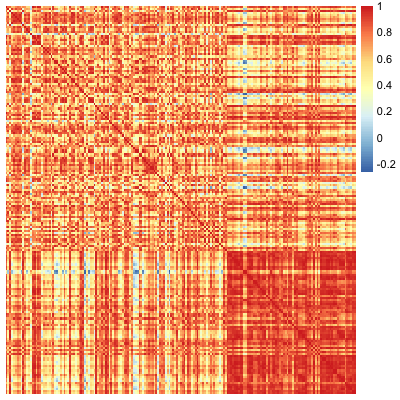

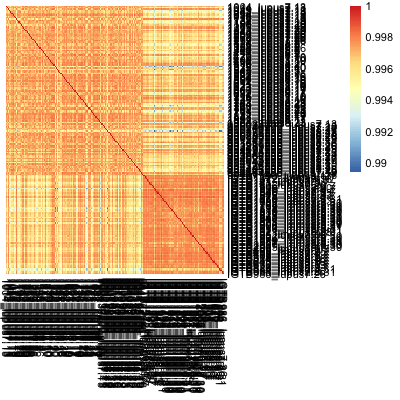

In [27]:
options(repr.plot.width = 5, repr.plot.height = 5)
pheatmap(cor(t(cbind(cm_prop, th_prop, b_prop, nk_prop, ncm_prop, tc_prop, cdc_prop, pdc_prop))),cluster_rows=F,cluster_cols=F)
options(repr.plot.width = 5, repr.plot.height = 5)
pheatmap(cor(cbind(pbmc_expr)),cluster_rows=F,cluster_cols=F)

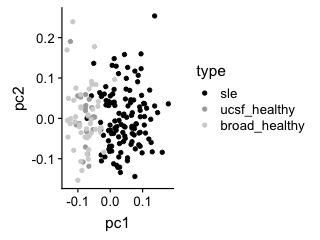

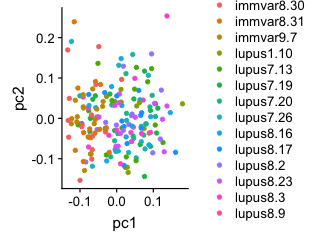

In [28]:
##pbmc_expr_prcomp <- prcomp(pbmc_expr)
pbmc_expr_prcomp <- prcomp(pbmc_expr_std)

df <- rbind(data.frame(pc1=pbmc_expr_prcomp$rotation[sle_indices,1], pc2=pbmc_expr_prcomp$rotation[sle_indices,2], type="sle"),
            data.frame(pc1=pbmc_expr_prcomp$rotation[ucsf_healthy_indices,1], pc2=pbmc_expr_prcomp$rotation[ucsf_healthy_indices,2], type="ucsf_healthy"),
            data.frame(pc1=pbmc_expr_prcomp$rotation[broad_healthy_indices,1], pc2=pbmc_expr_prcomp$rotation[broad_healthy_indices,2], type="broad_healthy")
           )
df$batch = joined_pivot$batch_cov[match(rownames(df),joined_ind_cov_batch)]

options(repr.plot.width = 4, repr.plot.height = 3)
ggplot(aes(pc1,pc2,color=type),data=df)+geom_point()+scale_colour_manual(values=c("black","darkgray","lightgray"))

ggplot(aes(pc1,pc2,color=batch),data=df)+geom_point()


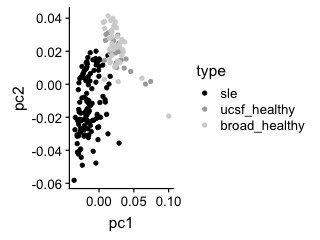

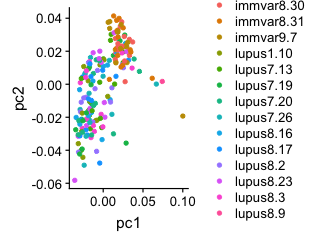

In [121]:
##pbmc_expr_prcomp <- prcomp(pbmc_expr)
expr_prcomp <- prcomp(cbind(cm_expr_std, ncm_expr_std, cdc_expr_std, pdc_expr_std, th_expr_std, tc_expr_std, nk_expr_std, b_expr_std))

df <- rbind(data.frame(pc1=expr_prcomp$rotation[sle_indices,1], pc2=expr_prcomp$rotation[sle_indices,2], type="sle"),
            data.frame(pc1=expr_prcomp$rotation[ucsf_healthy_indices,1], pc2=expr_prcomp$rotation[ucsf_healthy_indices,2], type="ucsf_healthy"),
            data.frame(pc1=expr_prcomp$rotation[broad_healthy_indices,1], pc2=expr_prcomp$rotation[broad_healthy_indices,2], type="broad_healthy")
           )
df$batch = joined_pivot$batch_cov[match(rownames(df),joined_ind_cov_batch)]

options(repr.plot.width = 4, repr.plot.height = 3)
ggplot(aes(pc1,pc2,color=type),data=df)+geom_point()+scale_colour_manual(values=c("black","darkgray","lightgray"))

ggplot(aes(pc1,pc2,color=batch),data=df)+geom_point()


In [141]:
a <- cbind(cm_expr_std[,sle_indices], ncm_expr_std[,sle_indices], cdc_expr_std[,sle_indices], pdc_expr_std[,sle_indices], th_expr_std[,sle_indices], tc_expr_std[,sle_indices], nk_expr_std[,sle_indices], b_expr_std[,sle_indices])
dim(a)

[1] 17318   944

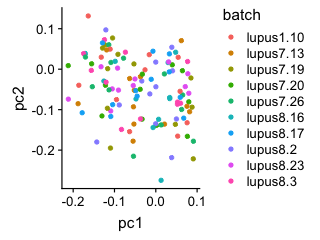

In [142]:
##pbmc_expr_prcomp <- prcomp(pbmc_expr)
expr_prcomp <- prcomp(rbind(cm_expr_std[,sle_indices], ncm_expr_std[,sle_indices], cdc_expr_std[,sle_indices], pdc_expr_std[,sle_indices], th_expr_std[,sle_indices], tc_expr_std[,sle_indices], nk_expr_std[,sle_indices], b_expr_std[,sle_indices]))
expr_prcomp <- prcomp(rbind(cm_expr_std[deseq_sig_genes,sle_indices], ncm_expr_std[deseq_sig_genes,sle_indices], 
                            cdc_expr_std[deseq_sig_genes,sle_indices], pdc_expr_std[deseq_sig_genes,sle_indices], 
                            th_expr_std[deseq_sig_genes,sle_indices], tc_expr_std[deseq_sig_genes,sle_indices], 
                            nk_expr_std[deseq_sig_genes,sle_indices], b_expr_std[deseq_sig_genes,sle_indices]))

df <- data.frame(pc1=expr_prcomp$rotation[,1], pc2=expr_prcomp$rotation[,2])
df$batch = joined_pivot$batch_cov[match(colnames(cm_expr_std[,sle_indices]),joined_ind_cov_batch)]

options(repr.plot.width = 4, repr.plot.height = 3)
ggplot(aes(pc1,pc2,color=batch),data=df)+geom_point()


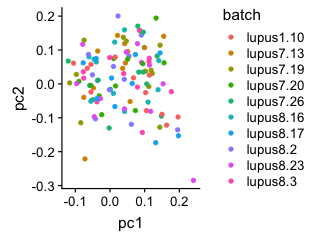

In [138]:
##pbmc_expr_prcomp <- prcomp(pbmc_expr)
expr_prcomp <- prcomp(cbind(cm_expr_std[deseq_sig_genes,sle_indices]))

df <- data.frame(pc1=expr_prcomp$rotation[,1], pc2=expr_prcomp$rotation[,2])
df$batch = joined_pivot$batch_cov[match(colnames(cm_expr_std[,sle_indices]),joined_ind_cov_batch)]

options(repr.plot.width = 4, repr.plot.height = 3)
ggplot(aes(pc1,pc2,color=batch),data=df)+geom_point()


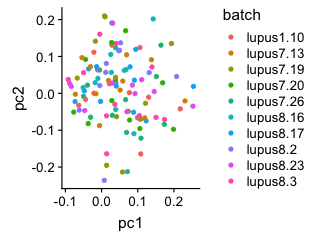

In [139]:
##pbmc_expr_prcomp <- prcomp(pbmc_expr)
expr_prcomp <- prcomp(cbind(tc_expr_std[deseq_sig_genes,sle_indices]))

df <- data.frame(pc1=expr_prcomp$rotation[,1], pc2=expr_prcomp$rotation[,2])
df$batch = joined_pivot$batch_cov[match(colnames(cm_expr_std[,sle_indices]),joined_ind_cov_batch)]

options(repr.plot.width = 4, repr.plot.height = 3)
ggplot(aes(pc1,pc2,color=batch),data=df)+geom_point()


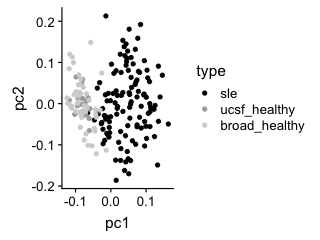

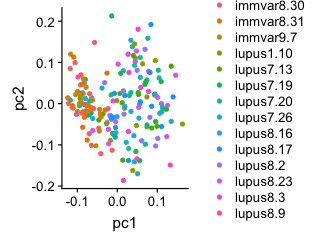

In [29]:
pbmc_expr_prcomp <- prcomp(pbmc_expr_std[na.omit(match(deseq_sig_genes,rownames(pbmc_expr_std))),])

df <- rbind(data.frame(pc1=pbmc_expr_prcomp$rotation[sle_indices,1], pc2=pbmc_expr_prcomp$rotation[sle_indices,2], type="sle"),
            data.frame(pc1=pbmc_expr_prcomp$rotation[ucsf_healthy_indices,1], pc2=pbmc_expr_prcomp$rotation[ucsf_healthy_indices,2], type="ucsf_healthy"),
            data.frame(pc1=pbmc_expr_prcomp$rotation[broad_healthy_indices,1], pc2=pbmc_expr_prcomp$rotation[broad_healthy_indices,2], type="broad_healthy")
           )
df$batch = joined_pivot$batch_cov[match(rownames(df),joined_ind_cov_batch)]

options(repr.plot.width = 4, repr.plot.height = 3)
ggplot(aes(pc1,pc2,color=type),data=df)+geom_point()+scale_colour_manual(values=c("black","darkgray","lightgray"))

ggplot(aes(pc1,pc2,color=batch),data=df)+geom_point()

In [30]:
cor(colMeans(cm_expr), props[,"cM"])
cor(colMeans(th_expr), props[,"Th"])
cor(colMeans(tc_expr), props[,"Tc"])
cor(colMeans(nk_expr), props[,"NK"])
cor(colMeans(ncm_expr), props[,"ncM"])
cor(colMeans(pdc_expr), props[,"pDC"])
cor(colMeans(cdc_expr), props[,"cDC"])

[1] -0.4867546

[1] -0.4212429

[1] -0.4977958

[1] -0.3305808

[1] -0.3837811

[1] -0.4703373

[1] -0.5162254

In [31]:
cor(colMeans(cm_expr_std), props[,"cM"])
cor(colMeans(th_expr_std), props[,"Th"])
cor(colMeans(tc_expr_std), props[,"Tc"])
cor(colMeans(nk_expr_std), props[,"NK"])
cor(colMeans(ncm_expr_std), props[,"ncM"])
cor(colMeans(pdc_expr_std), props[,"pDC"])
cor(colMeans(cdc_expr_std), props[,"cDC"])

[1] -0.7174272

[1] -0.4571605

[1] -0.6956229

[1] -0.6276466

[1] -0.6917199

[1] -0.68007

[1] -0.7382993

In [32]:
cor(pbmc_expr["CD14",], props[,"cM"])
cor(pbmc_sle_expr["CD14",], props_sle[,"cM"])

cor(pbmc_expr_std["CD14",], props[,"cM"])
cor(pbmc_sle_expr_std["CD14",], props_sle[,"cM"])

[1] 0.7719243

[1] 0.7248695

[1] 0.7719243

[1] 0.7248695

# Figure 2A - heatmap

In [33]:
pbmc_col_clust <- hclust(dist(t(pbmc_expr_std[match(deseq_sig_genes,expr_gene_names),]),method = "euclidean"), method="ward.D")
pbmc_row_clust <- hclust(dist(pbmc_expr_std[match(deseq_sig_genes,expr_gene_names),],method = "euclidean"), method="ward.D")

all_expr <- data.frame(pbmc=pbmc_expr[,pbmc_col_clust$order],
                      cm=cm_expr[,pbmc_col_clust$order],
                      ncm=ncm_expr[,pbmc_col_clust$order],
                      cdc=cdc_expr[,pbmc_col_clust$order],
                     pdc=pdc_expr[,pbmc_col_clust$order],
                      th=th_expr[,pbmc_col_clust$order],
                      tc=tc_expr[,pbmc_col_clust$order],
                       nk=nk_expr[,pbmc_col_clust$order],
                      b=b_expr[,pbmc_col_clust$order]
                      )
all_expr_sig <- all_expr[match(deseq_sig_genes,expr_gene_names),]

all_expr_std <- data.frame(pbmc=pbmc_expr_std[,pbmc_col_clust$order],
                      cm=cm_expr_std[,pbmc_col_clust$order],
                      ncm=ncm_expr_std[,pbmc_col_clust$order],
                      cdc=cdc_expr_std[,pbmc_col_clust$order],
                       pdc=pdc_expr_std[,pbmc_col_clust$order],
                      th=th_expr_std[,pbmc_col_clust$order],
                      tc=tc_expr_std[,pbmc_col_clust$order],
                       nk=nk_expr_std[,pbmc_col_clust$order],
                      b=b_expr_std[,pbmc_col_clust$order]
                      )

all_expr_std_sig <- all_expr_std[match(deseq_sig_genes,expr_gene_names),]

ct_annotation_one <- data.frame(disease_pop_cov=joined_pivot$disease_pop_cov,
                           sledaiscore=joined_pivot$sledaiscore)
rownames(ct_annotation_one) <- colnames(pbmc_expr);

ct_annotation <- data.frame(type=factor(rep(cell_types,each=ncol(ncm_expr))),
#                            disease=factor(rep(c(rep("sle",ncol(cm_sle_expr)),
#                                                 rep("ctrl",ncol(cm_healthy_expr)))[pbmc_clust$order],
#                                               length(cell_types))),
                           disease_pop_cov=joined_pivot$disease_pop_cov[pbmc_col_clust$order],
                           sledaiscore=joined_pivot$sledaiscore[pbmc_col_clust$order])
rownames(ct_annotation) <- colnames(all_expr_std);


In [34]:
# options(repr.plot.width = 16, repr.plot.height = 16)

# breaksList = seq(-2, 2, by = .1)
# pheatmap_out <- pheatmap(pbmc_expr_std[match(deseq_sig_genes,expr_gene_names),pbmc_col_clust$order],
#          cluster_rows=T, cluster_cols=F,annotation_col = ct_annotation_one[pbmc_col_clust$order,],#annotation_row = kmeans_annotation,
#          color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(length(breaksList)), 
#                          cutree_rows=8, 
#                          scale="row",fontsize=5,clustering_method="ward.D",clustering_distance_row="manhattan",# Defines the vector of colors for the legend (it has to be of the same lenght of breaksList)
#         breaks = breaksList) # Sets the breaks of the color scale as in breaksList

In [35]:
ifn_crow <- read.table("ifn.lupus.crow.etal.txt")
crow_annotation <- matrix(nrow=nrow(all_expr_std_sig), ncol=1, 0);
crow_annotation[na.omit(match(ifn_crow$V1, rownames(all_expr_std_sig))),1] <- 1;
rownames(crow_annotation) <- rownames(all_expr_std_sig)
colnames(crow_annotation) <- "Crow"
crow_annotation <- as.data.frame(crow_annotation)

In [36]:
sum(crow_annotation$Crow)

[1] 25

In [37]:
pbmc_deseq_sig_annotation <- matrix(nrow=nrow(all_expr_std_sig), ncol=1, 0);
pbmc_deseq_sig_annotation[na.omit(match(pbmc_deseq_sig_genes, rownames(all_expr_std_sig))),1] <- 1;
rownames(pbmc_deseq_sig_annotation) <- rownames(all_expr_std_sig)
colnames(pbmc_deseq_sig_annotation) <- "PBMC Sig"
pbmc_deseq_sig_annotation <- as.data.frame(pbmc_deseq_sig_annotation)

In [38]:
row_annotations <- cbind(crow_annotation, pbmc_deseq_sig_annotation)

In [39]:
sum(row_annotations$Crow[row_annotations$"PBMC Sig"==1])

[1] 21

In [40]:
options(repr.plot.width = 16, repr.plot.height = 16)
breaksList = seq(-2, 2, by = .2)

annotation_colors = list(
    type = c(PBMC="#000000", cM="#E58606", ncM="#5D69B1", cDC="#52BCA3", pDC="#99C945", Th="#CC61B0", Tc="#24796C", NK="#DAA51B", B="#764E9F"),
    disease_pop_cov = c(healthyWHITE="#D82B29", sleWHITE="#1B78B6", sleASIAN="#F57F20")
)

pheatmap_std_out <- pheatmap(all_expr_std_sig,
         cluster_rows=T, cluster_cols=F, annotation_row = row_annotations, annotation_col = ct_annotation, annotation_colors = annotation_colors,#annotation_row = kmeans_annotation,
         color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(length(breaksList)), # Defines the vector of colors for the legend (it has to be of the same lenght of breaksList)
        breaks = breaksList, # Sets the breaks of the color scale as in breaksList
        gaps_col=seq(ncol(cm_expr),ncol(cm_expr)*length(cell_types),ncol(cm_expr)),
                         cutree_rows=8, 
                         scale="none",fontsize=2,clustering_method="ward.D",clustering_distance_row="manhattan", filename="expr_std_heatmap.png",
                            width=10, height=10, dpi=600)
options(repr.plot.width = 10, repr.plot.height = 4)



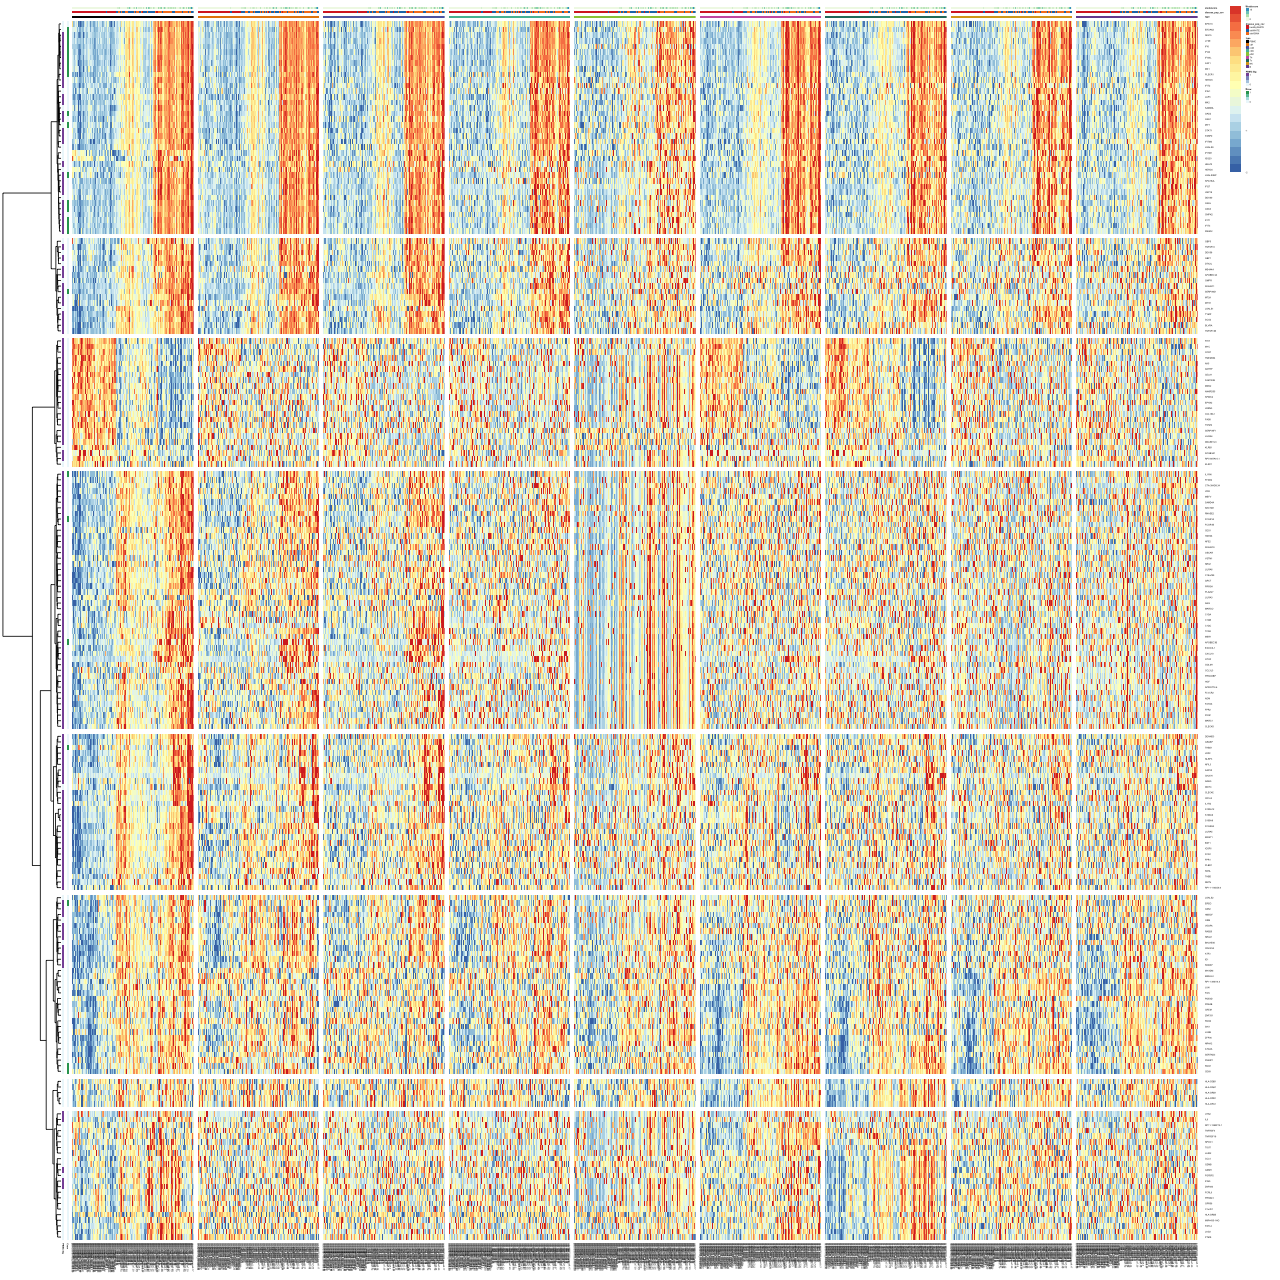

In [41]:
options(repr.plot.width = 16, repr.plot.height = 16)
breaksList = seq(-2, 2, by = .2)

pheatmap_std_out <- pheatmap(all_expr_std_sig,
         cluster_rows=T, cluster_cols=F, annotation_row = row_annotations, annotation_col = ct_annotation, annotation_colors=annotation_colors,#annotation_row = kmeans_annotation,
         color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(length(breaksList)), # Defines the vector of colors for the legend (it has to be of the same lenght of breaksList)
        breaks = breaksList, # Sets the breaks of the color scale as in breaksList
        gaps_col=seq(ncol(cm_expr),ncol(cm_expr)*length(cell_types),ncol(cm_expr)),
                         cutree_rows=8, 
                         scale="none",fontsize=2,clustering_method="ward.D",clustering_distance_row="manhattan",
                            width=10, height=10, dpi=600)
options(repr.plot.width = 10, repr.plot.height = 4)



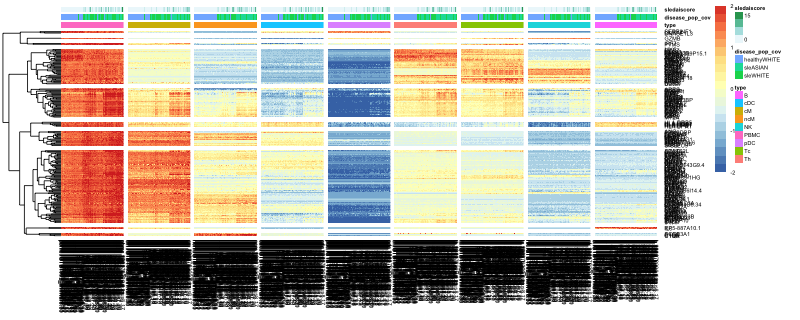

In [42]:
# options(repr.plot.width = 16, repr.plot.height = 16)
# breaksList = seq(-2.8, 2.8, by = .2)

pheatmap_out <- pheatmap(all_expr_sig,
         cluster_rows=T, cluster_cols=F, annotation_col = ct_annotation, #annotation_row = kmeans_annotation,
         color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(length(breaksList)), # Defines the vector of colors for the legend (it has to be of the same lenght of breaksList)
        breaks = breaksList, # Sets the breaks of the color scale as in breaksList
        gaps_col=seq(ncol(cm_expr),ncol(cm_expr)*length(cell_types),ncol(cm_expr)),
                         cutree_rows=10, 
                         scale="row",fontsize=5,clustering_method="complete",clustering_distance_row="manhattan")
options(repr.plot.width = 10, repr.plot.height = 4)

## make some volcano plots

In [43]:
options(repr.plot.width = 4, repr.plot.height = 4)
pbmc_deseq$ifn=pbmc_deseq$V1 %in% ifn_crow$V1
pbmc_deseq$sig=rep("cnot significant",nrow(pbmc_deseq))
pbmc_deseq$sig[match(deseq_sig_genes, pbmc_deseq$V1)]="bct_sig";
pbmc_deseq$sig[match(pbmc_deseq_sig_genes, pbmc_deseq$V1)]="apbmc_sig";

pbmc_deseq <- pbmc_deseq[order(pbmc_deseq$sig,decreasing=T),]
# !(abs(pbmc_deseq$log2FoldChange)>1) & (which(pbmc_deseq$qval < 0.01))

lim=max(abs(pbmc_deseq$log2FoldChange)) + 0.2
min_lim=-lim

##pdf(paste(ct, '.volcano.pdf', sep=''), useDingbats=F)
g = ggplot(pbmc_deseq, aes(x=log2FoldChange, y=-log10(pvalue), color=sig))+ theme_linedraw()+theme(legend.position="none") + xlim(-4.5, 4.5) + geom_point()+geom_point(data=pbmc_deseq[pbmc_deseq$ifn,],
             pch=21, fill=NA, size=4, colour="black", stroke=1)+scale_color_grey()+scale_fill_grey()
ggsave(g, filename="pbmc_deseq.png", width=3, height=3, dpi=300)
##dev.off()


Warning message:
“Removed 2 rows containing missing values (geom_point).”

## More principled way to cut the tree and label the specific signatures

In [44]:
cuttree_out <- cutree(pheatmap_std_out$tree_row, k = 8)
cuttree_out <- cuttree_out[pheatmap_std_out$tree_row$order];
cuttree_out[which(cuttree_out==7)] <- "T3";
cuttree_out[which(cuttree_out==1)] <- "T1";
cuttree_out[which(cuttree_out==5)] <- "Mono";
cuttree_out[which(cuttree_out==8)] <- "T2";
cuttree_out[which(cuttree_out==2)] <- "Mye1";
cuttree_out[which(cuttree_out==6)] <- "Pan";
cuttree_out[which(cuttree_out==3)] <- "Lymph";
cuttree_out[which(cuttree_out==4)] <- "Mye2";

cuttree_gene_names <- names(cuttree_out);
cuttree_out <- cbind(cuttree_gene_names,cuttree_out)
colnames(cuttree_out) <- c("gene","cluster")
cuttree_out <- as.data.frame(cuttree_out);
cuttree_out[,"cluster"] <- factor(cuttree_out[,"cluster"], levels=unique(as.character(cuttree_out[,"cluster"])))
write.table(cuttree_out, file="diffexp.annotations.txt",sep="\t",col.names=T,row.names=F,quote=F);

In [45]:
write.table(as.character(cuttree_out$gene[cuttree_out$cluster=="Pan"]), file="Pan.txt", row.names=F, col.names=F, quote=F, sep=",")
write.table(as.character(cuttree_out$gene[cuttree_out$cluster=="Mye2"]), file="Mye2.txt", row.names=F, col.names=F, quote=F, sep=",")
write.table(as.character(cuttree_out$gene[cuttree_out$cluster=="Mye1"]), file="Mye1.txt", row.names=F, col.names=F, quote=F, sep=",")
write.table(as.character(cuttree_out$gene[cuttree_out$cluster=="Mono"]), file="Mono.txt", row.names=F, col.names=F, quote=F, sep=",")
write.table(as.character(cuttree_out$gene[cuttree_out$cluster=="T1"]), file="T1.txt", row.names=F, col.names=F, quote=F, sep=",")
write.table(as.character(cuttree_out$gene[cuttree_out$cluster=="T2"]), file="T2.txt", row.names=F, col.names=F, quote=F, sep=",")
write.table(as.character(cuttree_out$gene[cuttree_out$cluster=="T3"]), file="T3.txt", row.names=F, col.names=F, quote=F, sep=",")
write.table(as.character(cuttree_out$gene[cuttree_out$cluster=="Lymph"]), file="Lymph.txt", row.names=F, col.names=F, quote=F, sep=",")

write.table(as.character(cuttree_out$gene), file="All.txt", row.names=F, col.names=F, quote=F, sep=",")



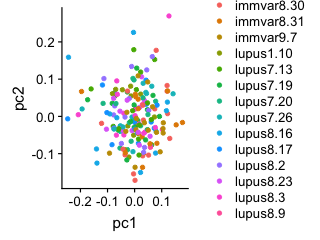

In [157]:
##pbmc_expr_prcomp <- prcomp(pbmc_expr)
expr_prcomp <- prcomp(cbind(cm_expr_std[rownames(cuttree_out)[cuttree_out$cluster=="Pan"],]))

df <- data.frame(pc1=expr_prcomp$rotation[,1], pc2=expr_prcomp$rotation[,2], pc3=expr_prcomp$rotation[,3], pc4=expr_prcomp$rotation[,4])
df$batch = joined_pivot$batch_cov[match(colnames(cm_expr_std[,]),joined_ind_cov_batch)]

options(repr.plot.width = 4, repr.plot.height = 3)
ggplot(aes(pc1,pc2,color=batch),data=df)+geom_point()


# Figure 2B - correlogram to show coexpressed genes

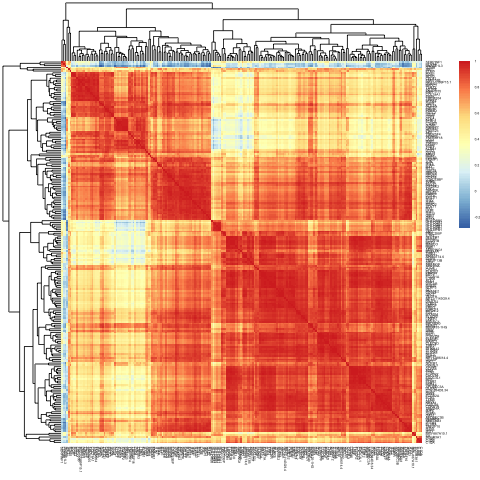

In [46]:
no_pbmc_cor <- cor(t(all_expr_sig[,-c(1,ncol(pbmc_expr))]))
options(repr.plot.width = 6, repr.plot.height = 6)
pheatmap(no_pbmc_cor,
         cluster_rows=pheatmap_out$tree_row, cluster_cols=pheatmap_out$tree_row, #annotation_row = kmeans_annotation,
         fontsize=3)
options(repr.plot.width = 4, repr.plot.height = 4)

In [47]:
cor(joined_pivot$sledaiscore, joined_pivot$cM)
cor(joined_pivot_sle$sledaiscore, joined_pivot_sle$cM)
cor(joined_pivot_sle$sledaiscore[which(joined_pivot_sle$disease_pop_cov=="sleWHITE")], joined_pivot_sle$cM[which(joined_pivot_sle$disease_pop_cov=="sleWHITE")])
cor(joined_pivot_sle$sledaiscore[which(joined_pivot_sle$disease_pop_cov=="sleASIAN")], joined_pivot_sle$cM[which(joined_pivot_sle$disease_pop_cov=="sleASIAN")])
cor(joined_pivot_sle$sledaiscore, colMeans(pbmc_sle_expr_std[match(deseq_sig_genes,rownames(pbmc_sle_expr_std)),]))
cor(joined_pivot_sle$sledaiscore, colMeans(pbmc_sle_expr_std[match(cuttree_out$gene[cuttree_out$cluster=="Pan"],rownames(pbmc_sle_expr_std)),]))
cor(joined_pivot_sle$sledaiscore, colMeans(cm_sle_expr_std[match(cuttree_out$gene[cuttree_out$cluster=="Pan"],rownames(pbmc_sle_expr_std)),]))
cor(joined_pivot_sle$sledaiscore, colMeans(pbmc_sle_expr_std[match(cuttree_out$gene,rownames(pbmc_sle_expr_std)),]))
cor(joined_pivot_sle$sledaiscore, colMeans(pbmc_sle_expr_std[match(cuttree_out$gene[cuttree_out$cluster=="Lymph"],rownames(pbmc_sle_expr_std)),]))


cor(joined_pivot_sle$sledaiscore[which(joined_pivot_sle$disease_pop_cov=="sleWHITE")], colMeans(cm_sle_expr_std[match(cuttree_out$gene[cuttree_out$cluster=="Pan"],rownames(pbmc_sle_expr_std)),])[which(joined_pivot_sle$disease_pop_cov=="sleWHITE")])
cor(joined_pivot_sle$sledaiscore[which(joined_pivot_sle$disease_pop_cov=="sleASIAN")], colMeans(cm_sle_expr_std[match(cuttree_out$gene[cuttree_out$cluster=="Pan"],rownames(pbmc_sle_expr_std)),])[which(joined_pivot_sle$disease_pop_cov=="sleASIAN")])

[1] 0.3249998

[1] 0.1202213

[1] 0.2388951

[1] -0.0247549

[1] 0.1847163

[1] 0.3040999

[1] 0.3015578

[1] 0.1847163

[1] 0.07439022

[1] 0.2559809

[1] 0.3665101

# Figure 2C: Proportion of variance explained


First, we are going to estimate proportion of variance explained by cell type proportion

This will be a multiple regression

\begin{equation*}
e_i = -1 + b_1\times p_1 + b_2\times p_2 + ... + b_n\times p_n
\end{equation*}

Next, we are going to estimate proportion of variance explained by cell type specific expression

This will be a multiple regression


\begin{equation*}
e_i = -1 + b_1\times e_1 + b_2\times e_2 + ... + b_n\times e_n
\end{equation*}

calculate adjusted r_2 and also the cell type specific r2

Y_i = %mono*mono_i + %other*other_i + err
Or
Y_i = %mono*mono_i
log(Y_i) = log(%mono)+log(mono_i)+err


## Let's define some useful functions

## Processing all - now, let's fit with -1 but we need to standardize the outcome

In [48]:
source("helper_functions.R")
output_prop_expr_noint_noah <- model_prop_expr_noah(pbmc_expr_std, props, exprs_std);
# output_prop_noint <- model_prop(pbmc_expr_std, props);
# output_expr_noint <- model_expr(pbmc_expr_std, exprs_std);
output_prop_noint_noah <- output_prop_expr_noint_noah[[1]];
output_expr_noint_noah <- output_prop_expr_noint_noah[[2]];

              cM          Th             B          NK          ncM
cM   1.000000000  0.09659988  0.0658626425 0.038104745 -0.001505374
Th   0.096599882  1.00000000 -0.0172118072 0.071055836  0.057913421
B    0.065862642 -0.01721181  1.0000000000 0.060222615 -0.074013934
NK   0.038104745  0.07105584  0.0602226155 1.000000000  0.043883585
ncM -0.001505374  0.05791342 -0.0740139340 0.043883585  1.000000000
Tc   0.233033189  0.10122132 -0.0568525087 0.004996967 -0.021493603
cDC  0.156728981 -0.02967336  0.1912907668 0.105110625  0.108220021
pDC -0.028045070 -0.04437732 -0.0004136138 0.078314137 -0.173593635
              Tc         cDC           pDC
cM   0.233033189  0.15672898 -0.0280450701
Th   0.101221324 -0.02967336 -0.0443773225
B   -0.056852509  0.19129077 -0.0004136138
NK   0.004996967  0.10511062  0.0783141369
ncM -0.021493603  0.10822002 -0.1735936350
Tc   1.000000000  0.08536721  0.0764171690
cDC  0.085367213  1.00000000  0.1195204993
pDC  0.076417169  0.11952050  1.0000000000
[

In [49]:
cov_expr_mat <- cov(exprs_std[1,,])

vars_expr <- NULL;
        
        for(j in 1:dim(exprs)[[3]]) {
            var_j_expr = diag(cov_expr_mat)[[j]]; ##sum(cov_expr_mat[j,]);
            vars_expr <- c(vars_expr, var_j_expr);
        }


In [50]:
head(output_prop_noint_noah)

cM         Th        B         NK         ncM       Tc       
RP11-34P13.7  -1.4280589 10.770027  6.554051 12.9057696 19.204161 39.172327
RP11-34P13.8  71.3065396  5.739187  5.424177  0.4984214 -4.412076  1.009832
AL627309.1    65.0179725 14.757565 13.903761  1.5545486  1.055285  1.677426
AP006222.2     0.1676512  3.052390  3.009343 44.5634400 10.725939  3.762657
RP4-669L17.10 -4.2307668 24.799897  6.724852  1.2077841 64.686966  1.591953
RP11-206L10.3 73.0799735 10.947486  8.278810  2.0244268  1.354165  6.475017
              cDC        pDC        total r2  adj r2     total prop_expr r2
RP11-34P13.7  13.4040088 -0.5822858  6.503125  2.3010179  891.9174         
RP11-34P13.8   2.6219223 17.8119962 12.567445  8.6378922  960.2674         
AL627309.1     0.8819500  1.1514921 34.278522 31.3247482 1298.8133         
AP006222.2    14.8125354 19.9060450  7.643825  3.4929858  904.1414         
RP4-669L17.10  0.5037052  4.7156095  4.514972  0.2235099  871.2120         
RP11-206L10.3 -1.1262280 -1.0336505 37.472054 34.6618089 1367.1318

In [51]:
diag(cov(exprs[1,,]))[[1]]

[1] 0.003717088

In [52]:
output_expr_noint_noah

cM   Th   B    NK   ncM  Tc   cDC  pDC  total r2  adj r2   
RP11-34P13.7  12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5  855.6544  889.6164
RP11-34P13.8  12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5  915.0003  951.6295
AL627309.1    12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5 1217.2740 1267.4886
AP006222.2    12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5  866.2119  900.6484
RP4-669L17.10 12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5  837.8277  870.9885
RP11-206L10.3 12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5 1279.4605 1332.4700
RP11-206L10.2 12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5  816.8338  849.0510
RP11-206L10.9 12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5  899.2147  935.1345
FAM87B        12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5  833.9707  866.9581
LINC00115     12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5  847.4826  881.0773
FAM41C        12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5  946.9574  985.0229
SAMD11        12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5  841.0508  874.3564
NOC2L         12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5 1390.3701 1448.3643
KLHL17        12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5  833.3061  866.2637
PLEKHN1       12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5  988.2701 1028.1924
RP11-54O7.17  12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5 1037.8066 1079.9552
HES4          12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5 2236.5651 2332.5905
ISG15         12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5 2178.0908 2271.4882
AGRN          12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5 1523.3385 1587.3088
C1orf159      12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5  828.9843  861.7476
RP11-465B22.8 12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5  856.5796  890.5832
TTLL10        12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5  877.4682  912.4106
TNFRSF18      12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5 1106.7729 1152.0211
TNFRSF4       12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5  898.9729  934.8818
SDF4          12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5  956.9867  995.5030
B3GALT6       12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5  892.8426  928.4759
FAM132A       12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5  838.9138  872.1234
RP5-902P8.12  12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5  817.3169  849.5559
UBE2J2        12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5  982.8572 1022.5362
RP5-902P8.10  12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5  852.4585  886.2769
⋮             ⋮    ⋮    ⋮    ⋮    ⋮    ⋮    ⋮    ⋮    ⋮         ⋮        
MCM3AP        12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5  836.7504  869.8628
AP001469.9    12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5  882.0267  917.1739
YBEY          12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5  856.2422  890.2306
C21orf58      12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5 1029.6272 1071.4082
PCNT          12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5 1030.2979 1072.1090
DIP2A         12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5  963.1337 1001.9263
S100B         12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5  945.3554  983.3489
PRMT2         12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5 1600.9281 1668.3855
MT-ND1        12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5 1116.0658 1161.7317
MT-ND2        12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5 1302.3664 1356.4053
MT-CO1        12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5  993.7653 1033.9345
MT-CO2        12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5 1107.2358 1152.5049
MT-ATP8       12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5  901.0841  937.0879
MT-ATP6       12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5 1212.7846 1262.7974
MT-CO3        12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5 1209.1740 1259.0245
MT-ND3        12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5 1202.7403 1252.3017
MT-ND4L       12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5 1023.1758 1064.6668
MT-ND4        12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5 1095.1575 1139.8837
MT-ND5        12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5 1189.6547 1238.6279
MT-ND6        12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5 2010.1725 2096.0230
MT-CYB        12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5 1516.9436 1580.6265
AC145212.1    12.5 12.5 12.5 12.5 12.5 12.5 12.5 12.5  819.5224  851.8605
AC011043.1    12.5

In [53]:
mean(exprs_std[1,,][,2])

[1] 7.141101e-16

In [54]:
output_prop_expr_noint <- model_prop_expr(pbmc_expr_std, props, exprs_std);
# output_prop_noint <- model_prop(pbmc_expr_std, props);
# output_expr_noint <- model_expr(pbmc_expr_std, exprs_std);
output_prop_noint <- output_prop_expr_noint[[1]];
output_expr_noint <- output_prop_expr_noint[[2]];

In [55]:
mean(output_prop_noint[,"adj prop_expr r2"])

[1] 85.35289

In [56]:
mean(output_prop_noint[,"adj r2"])
mean(output_expr_noint[,"adj r2"])


[1] 16.35384

[1] 70.25222

In [57]:
output_prop_expr_noint_prop_rand <- model_prop_expr(pbmc_expr_std, props[sample(1:nrow(props)),], exprs_std);
# output_prop_noint <- model_prop(pbmc_expr_std, props);
# output_expr_noint <- model_expr(pbmc_expr_std, exprs_std);
output_prop_noint_prop_rand <- output_prop_expr_noint_prop_rand[[1]];
output_expr_noint_prop_rand <- output_prop_expr_noint_prop_rand[[2]];

In [58]:
mean(output_prop_noint_prop_rand[,"adj prop_expr r2"])

[1] 72.22814

In [59]:
output_prop_expr_noint_expr_rand <- model_prop_expr(pbmc_expr_std, props, exprs_std[,sample(dimnames(exprs_std)[[2]]),]);
# output_prop_noint <- model_prop(pbmc_expr_std, props);
# output_expr_noint <- model_expr(pbmc_expr_std, exprs_std);
output_prop_noint_expr_rand <- output_prop_expr_noint_expr_rand[[1]];
output_expr_noint_expr_rand <- output_prop_expr_noint_expr_rand[[2]];

In [60]:
mean(output_prop_noint_expr_rand[,"adj prop_expr r2"])

[1] 22.65186

In [61]:
output_prop_expr_noint_both_rand <- model_prop_expr(pbmc_expr_std[,sample(colnames(pbmc_expr_std))], props, exprs_std);
# output_prop_noint <- model_prop(pbmc_expr_std, props);
# output_expr_noint <- model_expr(pbmc_expr_std, exprs_std);
output_prop_noint_both_rand <- output_prop_expr_noint_both_rand[[1]];
output_expr_noint_both_rand <- output_prop_expr_noint_both_rand[[2]];

In [62]:
mean(output_prop_noint_both_rand[,"adj prop_expr r2"])

[1] -0.7496094

In [63]:
source("helper_functions.R");

output_prop_expr_noint_nnls <- model_prop_expr_nnls(pbmc_expr_std, props, exprs_std);
# output_prop_noint <- model_prop(pbmc_expr_std, props);
# output_expr_noint <- model_expr(pbmc_expr_std, exprs_std);
output_prop_noint_nnls <- output_prop_expr_noint_nnls[[1]];
output_expr_noint_nnls <- output_prop_expr_noint_nnls[[2]];

In [64]:
grep("LCK", rownames(pbmc_expr_std))

[1] 407

## testing out nnls fit

In [65]:
# model_lm <- lm(pbmc_expr_std[407,]~props+exprs_std[407,,]-1)
# ##model_nnls <- nnls(cbind(props,exprs_std[407,,]), pbmc_expr_std[407,])
# model_nnls <- nnls(cbind(props), pbmc_expr_std[407,])

# cov_mat <- cov(cbind(props, exprs_std[407,,]));

# vars_lm <- NULL;
# coef = summary(model_lm)$coef[,1]
# for(j in 1:(ncol(props)+dim(exprs)[[3]])) {
#             var_j = sum(cov_mat[j,]*coef[j]*coef);
#             vars_lm <- c(vars_lm, var_j);
#         }

# vars_nnls <- NULL;
# coef = model_nnls$x
# # for(j in 1:(ncol(props)+dim(exprs)[[3]])) {
# #             var_j = sum(cov_mat[j,]*coef[j]*coef);
# #             vars_nnls <- c(vars_nnls, var_j);
# #         }

# for(j in 1:(ncol(props))) {
#             var_j = sum(cov_mat[j,]*coef[j]*coef);
#             vars_nnls <- c(vars_nnls, var_j);
#         }

# vars_lm/sum(vars_lm)*100

## Processing SLE

In [66]:
output_sle_prop_expr_noint <- model_prop_expr(pbmc_sle_expr_std, props_sle, exprs_sle_std);
# output_sle_prop_noint <- model_prop(pbmc_sle_expr_std, props_sle);
# output_sle_expr_noint <- model_expr(pbmc_sle_expr_std, exprs_sle_std);
output_sle_prop_noint <- output_sle_prop_expr_noint[[1]];
output_sle_expr_noint <- output_sle_prop_expr_noint[[2]];

In [67]:
# output_sle_prop_noint_small <- model_prop(pbmc_sle_expr_std[1:100,], props_sle);
# output_sle_expr_noint_small <- model_expr(pbmc_sle_expr_std[1:100,], exprs_sle_std);

### Downsampled SLE to 46 samples

In [68]:
## including dc analysis
##N <- 22;
samples_asian <- which(joined_pivot$disease_pop=="sleASIAN")
samples_white <- which(joined_pivot$disease_pop=="sleWHITE")

## including dc analysis
output_sle_asian_prop_expr_noint <- model_prop_expr(pbmc_sle_expr_std[,samples_asian], props_sle[samples_asian,], exprs_sle_std[,samples_asian,]);
# output_sle_asian_prop_noint <- model_prop(pbmc_sle_expr_std[,samples_asian], props_sle[samples_asian,]);
# output_sle_asian_expr_noint <- model_expr(pbmc_sle_expr_std[,samples_asian], exprs_sle_std[,samples_asian,]);
output_sle_asian_prop_noint <- output_sle_asian_prop_expr_noint[[1]];
output_sle_asian_expr_noint <- output_sle_asian_prop_expr_noint[[2]];

output_sle_white_prop_expr_noint <- model_prop_expr(pbmc_sle_expr_std[,samples_white], props_sle[samples_white,], exprs_sle_std[,samples_white,]);
# output_sle_white_prop_noint <- model_prop(pbmc_sle_expr_std[,samples_white], props_sle[samples_white,]);
# output_sle_white_expr_noint <- model_expr(pbmc_sle_expr_std[,samples_white], exprs_sle_std[,samples_white,]);
output_sle_white_prop_noint <- output_sle_white_prop_expr_noint[[1]]
output_sle_white_expr_noint <- output_sle_white_prop_expr_noint[[2]]

# samples <- sample(1:ncol(pbmc_sle_expr_std), N)
# output_sle_down_prop_noint <- model_prop(pbmc_sle_expr_std[,samples], props_sle[samples,]);
# output_sle_down_expr_noint <- model_expr(pbmc_sle_expr_std[,samples], exprs_sle_std[,samples,]);


In [69]:
# test_single_gene(pbmc_sle_expr[,samples_asian], props_sle[samples_asian,], exprs_sle[,samples_asian,], grep("^IL6$",expr_gene_names)[1])
# test_single_gene(pbmc_sle_expr[,samples_asian], props_sle[samples_asian,], exprs_sle[,samples_asian,], grep("^ERAP2$",expr_gene_names)[1])
# test_single_gene(pbmc_sle_expr[,samples_asian], props_sle[samples_asian,], exprs_sle[,samples_asian,], grep("^CD3E$",expr_gene_names)[1])
# test_single_gene(pbmc_sle_expr[,samples_asian], props_sle[samples_asian,], exprs_sle[,samples_asian,], grep("^UTS2$",expr_gene_names)[1])


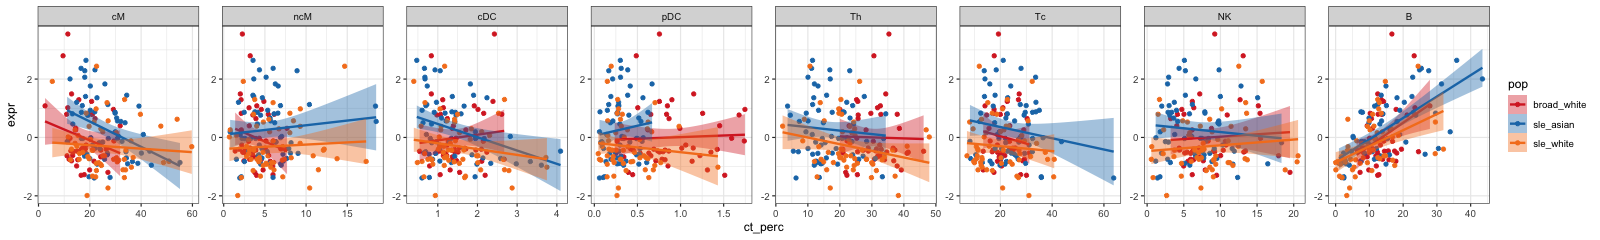

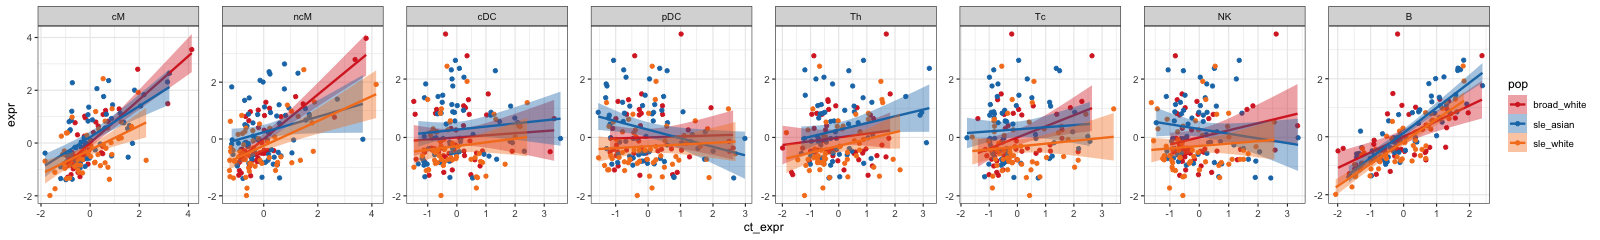

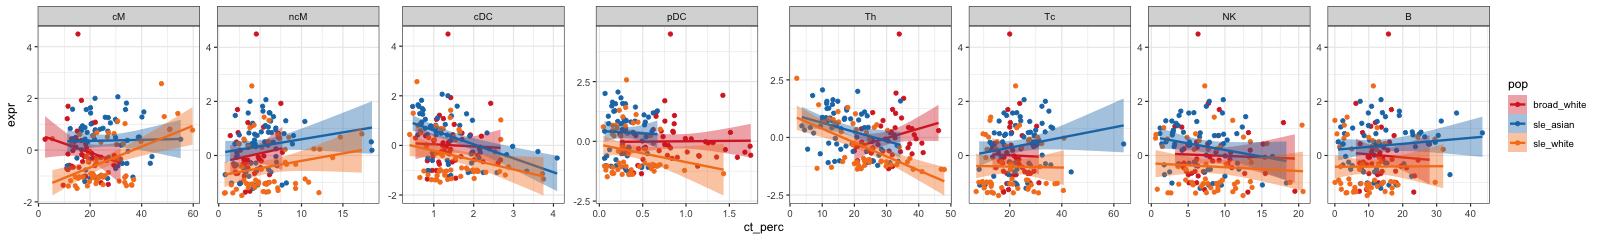

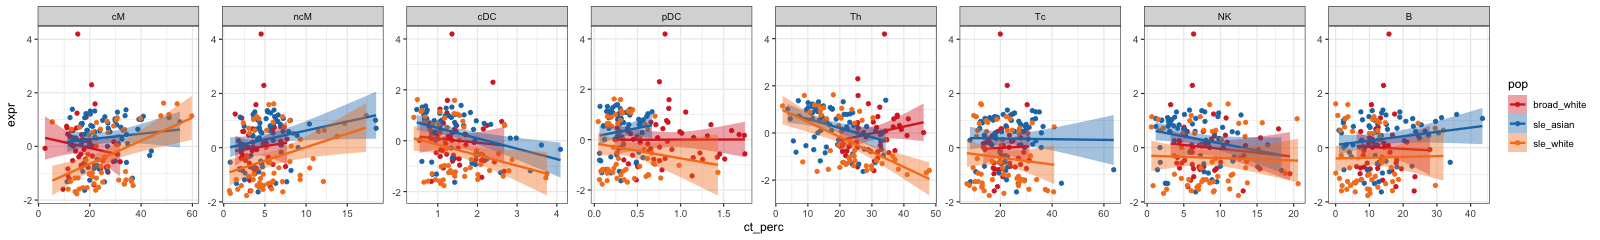

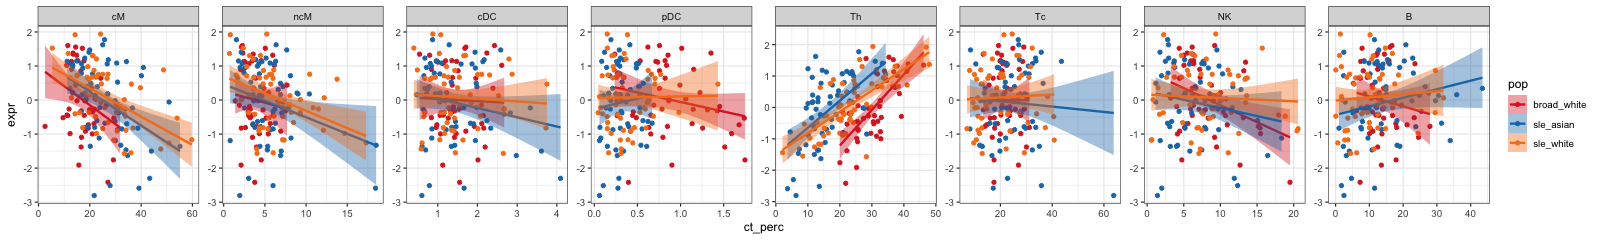

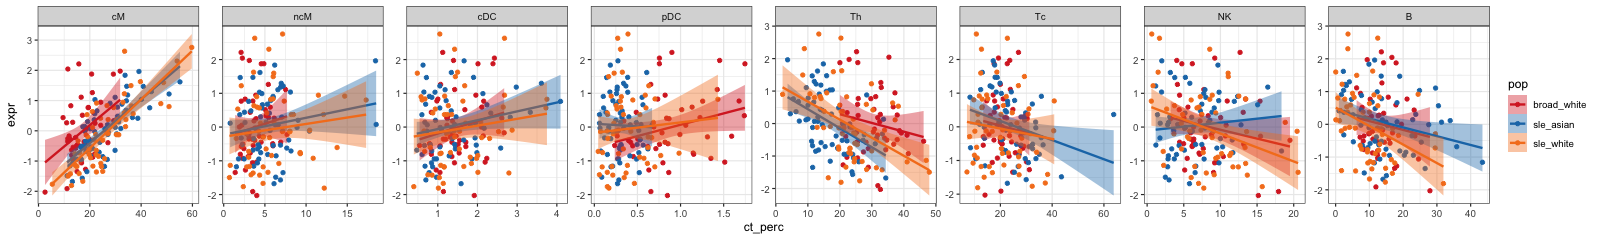

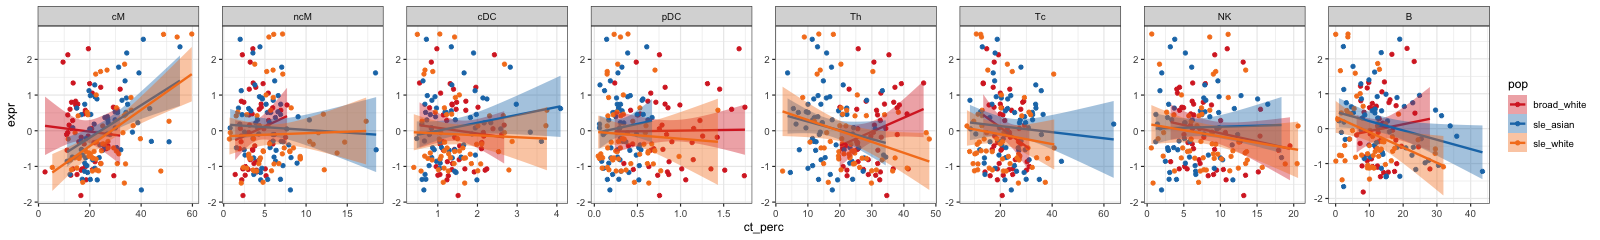

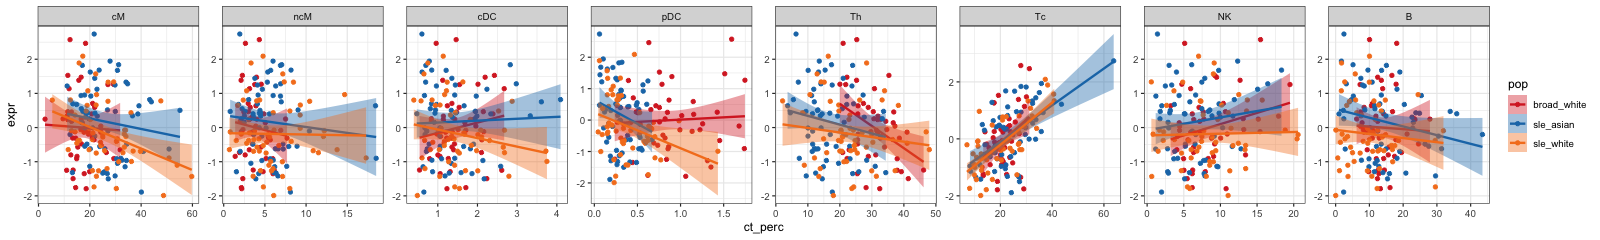

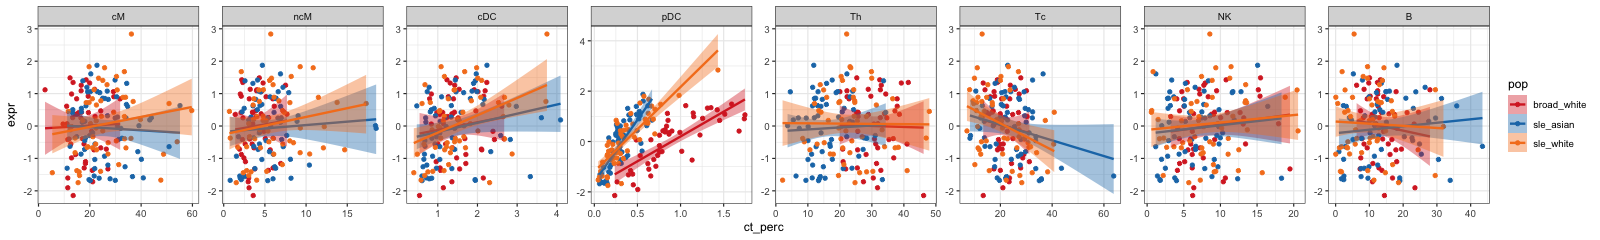

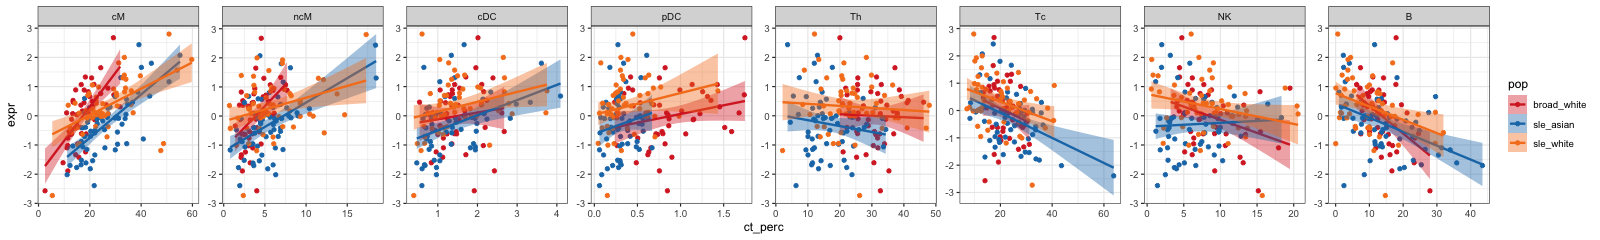

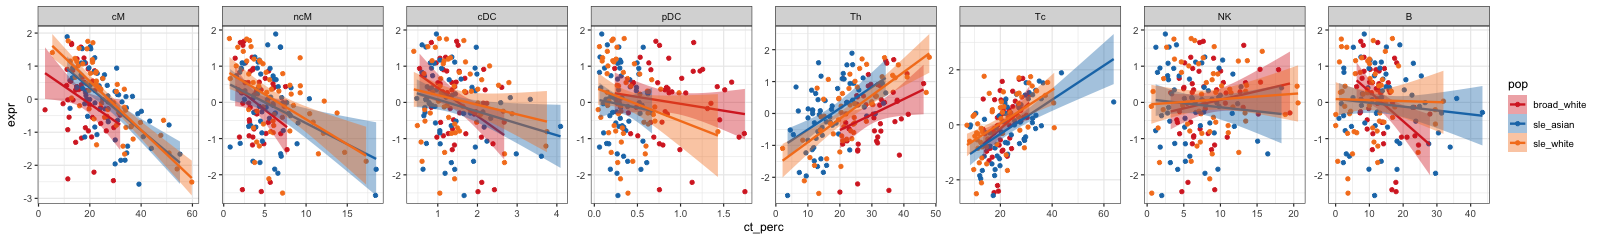

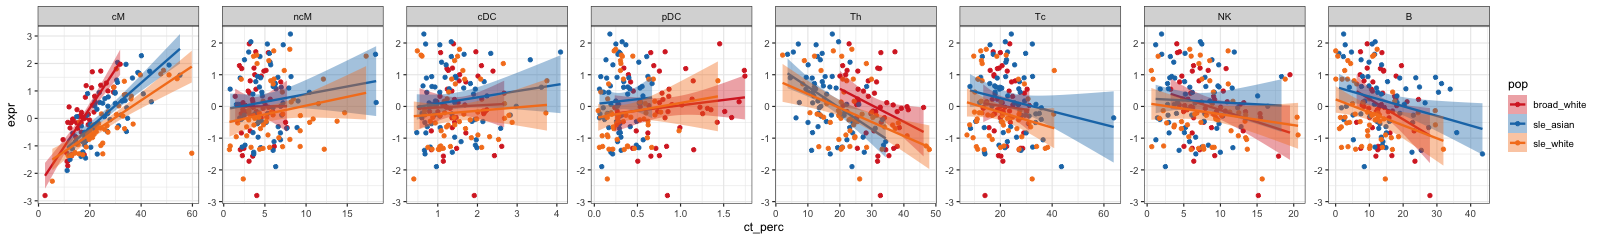

In [70]:
source("helper_functions.R")
options(repr.plot.width = 20, repr.plot.height = 3)
props_all = rbind(data.frame(props_broad_healthy,pop="broad_white"),
                  data.frame(props_sle[samples_asian,],pop="sle_asian"),
                  data.frame(props_sle[samples_white,],pop="sle_white"))

exprs_all = list(exprs_broad_healthy_std, exprs_sle_std[,samples_asian,], exprs_sle_std[,samples_white,])

expr_all = cbind(pbmc_broad_healthy_expr_std, pbmc_sle_expr_std[,c(samples_asian,samples_white)])

il6 <- plot_single_gene_prop(expr_all, props_all,grep("^IL6$",expr_gene_names)[1])
ggsave(il6, file="IL6_prop.png",width=11, height=2)

il6 <- plot_single_gene_expr(expr_all, exprs_all, grep("^IL6$",expr_gene_names)[1])
ggsave(il6, file="IL6_expr.png",width=11, height=2)

## ifi27 asian vs cau differences
ifi27 <- plot_single_gene_prop(expr_all, props_all, grep("^IFI27$",expr_gene_names)[1])
ggsave(ifi27, file="IFI27.png",width=11, height=2)
ifi44l <- plot_single_gene_prop(expr_all, props_all, grep("^IFI44L$",expr_gene_names)[1])
ggsave(ifi44l, file="IFI44L.png",width=11, height=2)
ccr7 <- plot_single_gene_prop(expr_all, props_all, grep("^CCR7$",expr_gene_names)[1])
ggsave(ccr7, file="CCR7.png",width=11, height=2)
nlrp3 <- plot_single_gene_prop(expr_all, props_all, grep("^NLRP3$",expr_gene_names)[1])
ggsave(nlrp3, file="NLRP3.png", width=11, height=2)
thbs1 <- plot_single_gene_prop(expr_all, props_all, grep("^THBS1$",expr_gene_names)[1])
ggsave(thbs1, file="THBS1.png", width=11, height=2)
ifng <- plot_single_gene_prop(expr_all, props_all, grep("^IFNG$",expr_gene_names)[1])
ggsave(ifng, file="IFNG.png",width=11, height=2)
lilra4 <- plot_single_gene_prop(expr_all, props_all, grep("^LILRA4$",expr_gene_names)[1])
ggsave(lilra4, file="LILRA4.png",width=11, height=2)
cd4 <- plot_single_gene_prop(expr_all, props_all, grep("^CD4$",expr_gene_names)[1])
ggsave(cd4, file="CD4.png",width=11, height=2)
lck <- plot_single_gene_prop(expr_all, props_all, grep("^LCK$",expr_gene_names)[1])
ggsave(lck, file="LCK.png",width=11, height=2)
cd14 <- plot_single_gene_prop(expr_all, props_all, grep("^CD14$",expr_gene_names)[1])
ggsave(cd14, file="CD14.png",width=11, height=2)


In [71]:
# head(props_all)

In [72]:
# options(repr.plot.width = 4, repr.plot.height = 4)
# plot(props_all$pop, expr_all[grep("^IFI6$",expr_gene_names),])

In [73]:
# plot(expr_all[grep("^IFI44L$",expr_gene_names),], expr_all[grep("^IFI6$",expr_gene_names),])

In [74]:
# plot(expr_all[grep("^IFNG$",expr_gene_names),], expr_all[grep("^IFI6$",expr_gene_names),])

In [75]:
# cor(expr_all[grep("^IL6$",expr_gene_names),], expr_all[grep("^IFI6$",expr_gene_names),])

In [76]:
# options(repr.plot.width = 10, repr.plot.height = 3)
# test_single_gene(pbmc_sle_expr_std[,samples_asian], props_sle[samples_asian,], exprs_sle_std[,samples_asian,], grep("^IL6$",expr_gene_names)[1])
# test_single_gene(pbmc_sle_expr_std[,samples_white], props_sle[samples_white,], exprs_sle_std[,samples_white,], grep("^IL6$",expr_gene_names)[1])
# test_single_gene(pbmc_broad_healthy_expr_std, props_broad_healthy, exprs_broad_healthy_std, grep("^IL6$",expr_gene_names)[1])


# test_single_gene(pbmc_sle_expr_std[,samples_asian], props_sle[samples_asian,], exprs_sle_std[,samples_asian,], grep("^ERAP2$",expr_gene_names)[1])
# test_single_gene(pbmc_sle_expr_std[,samples_white], props_sle[samples_white,], exprs_sle_std[,samples_white,], grep("^ERAP2$",expr_gene_names)[1])
# test_single_gene(pbmc_broad_healthy_expr_std, props_broad_healthy, exprs_broad_healthy_std, grep("^ERAP2$",expr_gene_names)[1])

# test_single_gene(pbmc_sle_expr_std[,samples_asian], props_sle[samples_asian,], exprs_sle_std[,samples_asian,], grep("^CD3E$",expr_gene_names)[1])
# test_single_gene(pbmc_sle_expr_std[,samples_white], props_sle[samples_white,], exprs_sle_std[,samples_white,], grep("^CD3E$",expr_gene_names)[1])
# test_single_gene(pbmc_broad_healthy_expr_std, props_broad_healthy, exprs_broad_healthy_std, grep("^CD3E$",expr_gene_names)[1])

# # test_single_gene(pbmc_sle_expr_std, props_sle, exprs_sle, grep("^IL6$",expr_gene_names)[1])
# # test_single_gene(pbmc_sle_expr, props_sle, exprs_sle, grep("^IL6$",expr_gene_names)[1])

## Processing UCSF healthy

In [77]:
output_ucsf_healthy_prop_expr_noint <- model_prop_expr(pbmc_ucsf_healthy_expr_std, props_ucsf_healthy, exprs_ucsf_healthy_std);
# output_ucsf_healthy_prop_noint <- model_prop(pbmc_ucsf_healthy_expr_std, props_ucsf_healthy);
# output_ucsf_healthy_expr_noint <- model_expr(pbmc_ucsf_healthy_expr_std, exprs_ucsf_healthy_std);
output_ucsf_healthy_prop_noint <- output_ucsf_healthy_prop_expr_noint[[1]]
output_ucsf_healthy_expr_noint <- output_ucsf_healthy_prop_expr_noint[[2]]

In [78]:
# options(repr.plot.width = 10, repr.plot.height = 3)
# t(which(output_ucsf_healthy_expr_noint[,8]>1000))
# test_single_gene(pbmc_ucsf_healthy_expr_std, props_ucsf_healthy, exprs_ucsf_healthy_std, grep("^RALBP1$",expr_gene_names)[1])
# test_single_gene(pbmc_ucsf_healthy_expr_std, props_ucsf_healthy, exprs_ucsf_healthy, grep("^RALBP1$",expr_gene_names)[1])
# test_single_gene(pbmc_ucsf_healthy_expr, props_ucsf_healthy, exprs_ucsf_healthy, grep("^RALBP1$",expr_gene_names)[1])

In [79]:
# test_single_gene(pbmc_ucsf_healthy_expr_std, props_ucsf_healthy, exprs_ucsf_healthy_std, grep("^IL6$",expr_gene_names)[1])
# test_single_gene(pbmc_ucsf_healthy_expr_std, props_ucsf_healthy, exprs_ucsf_healthy, grep("^IL6$",expr_gene_names)[1])
# test_single_gene(pbmc_ucsf_healthy_expr, props_ucsf_healthy, exprs_ucsf_healthy, grep("^IL6$",expr_gene_names)[1])

## Processing Broad healthy

In [80]:
output_broad_healthy_prop_expr_noint <- model_prop_expr(pbmc_broad_healthy_expr_std, props_broad_healthy, exprs_broad_healthy_std);
# output_broad_healthy_prop_noint <- model_prop(pbmc_broad_healthy_expr_std, props_broad_healthy);
# output_broad_healthy_expr_noint <- model_expr(pbmc_broad_healthy_expr_std, exprs_broad_healthy_std);
output_broad_healthy_prop_noint <- output_broad_healthy_prop_expr_noint[[1]];
output_broad_healthy_expr_noint <- output_broad_healthy_prop_expr_noint[[2]];


In [81]:
# options(repr.plot.width = 10, repr.plot.height = 3)
# t(which(output_broad_healthy_expr_noint[,8]>1000))
# test_single_gene(pbmc_broad_healthy_expr_std, props_broad_healthy, exprs_broad_healthy_std, grep("^RALBP1$",expr_gene_names)[1])
# test_single_gene(pbmc_broad_healthy_expr_std, props_broad_healthy, exprs_broad_healthy, grep("^RALBP1$",expr_gene_names)[1])
# test_single_gene(pbmc_broad_healthy_expr, props_broad_healthy, exprs_broad_healthy, grep("^RALBP1$",expr_gene_names)[1])

In [82]:
# test_single_gene(pbmc_broad_healthy_expr_std, props_broad_healthy, exprs_broad_healthy_std, grep("^IL6$",expr_gene_names)[1])
# test_single_gene(pbmc_broad_healthy_expr_std, props_broad_healthy, exprs_broad_healthy, grep("^IL6$",expr_gene_names)[1])
# test_single_gene(pbmc_broad_healthy_expr, props_broad_healthy, exprs_broad_healthy, grep("^IL6$",expr_gene_names)[1])

## matching ucsf and broad

In [83]:
a <- match(sapply(rownames(props_ucsf_healthy),function(x){strsplit(x,"_")[[1]][[1]]}), sapply(rownames(props_broad_healthy), function(x) {strsplit(x,"_")[[1]][[1]]}))
props_ucsf_healthy_matched <- props_ucsf_healthy[!is.na(a),]
props_broad_healthy_matched <- props_broad_healthy[na.omit(a),]
pbmc_ucsf_healthy_expr_std_matched <- pbmc_ucsf_healthy_expr_std[,!is.na(a)]
pbmc_broad_healthy_expr_std_matched <- pbmc_broad_healthy_expr_std[,na.omit(a)]
exprs_ucsf_healthy_std_matched <- exprs_ucsf_healthy_std[,!is.na(a),]
exprs_broad_healthy_std_matched <- exprs_broad_healthy_std[,na.omit(a),]


output_ucsf_healthy_prop_expr_noint_matched <- model_prop_expr(pbmc_ucsf_healthy_expr_std_matched, props_ucsf_healthy_matched,exprs_ucsf_healthy_std_matched);
# output_ucsf_healthy_prop_noint_matched <- model_prop(pbmc_ucsf_healthy_expr_std_matched, props_ucsf_healthy_matched);
# output_ucsf_healthy_expr_noint_matched <- model_expr(pbmc_ucsf_healthy_expr_std_matched, exprs_ucsf_healthy_std_matched);
output_ucsf_healthy_prop_noint_matched <- output_ucsf_healthy_prop_expr_noint_matched[[1]]
output_ucsf_healthy_expr_noint_matched <- output_ucsf_healthy_prop_expr_noint_matched[[2]]

output_broad_healthy_prop_expr_noint_matched <- model_prop_expr(pbmc_broad_healthy_expr_std_matched, props_broad_healthy_matched, exprs_broad_healthy_std_matched);
# output_broad_healthy_prop_noint_matched <- model_prop(pbmc_broad_healthy_expr_std_matched, props_broad_healthy_matched);
# output_broad_healthy_expr_noint_matched <- model_expr(pbmc_broad_healthy_expr_std_matched, exprs_broad_healthy_std_matched);
output_broad_healthy_prop_noint_matched <- output_broad_healthy_prop_expr_noint_matched[[1]];
output_broad_healthy_expr_noint_matched <- output_broad_healthy_prop_expr_noint_matched[[2]];


## Summarize and plotting results

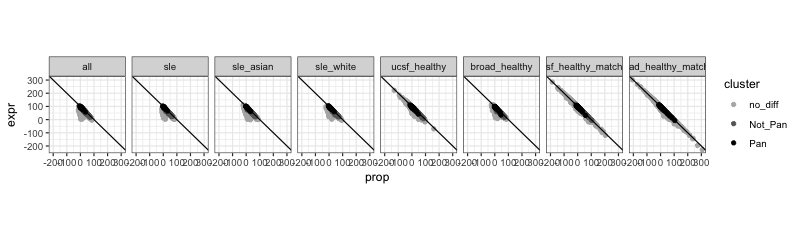

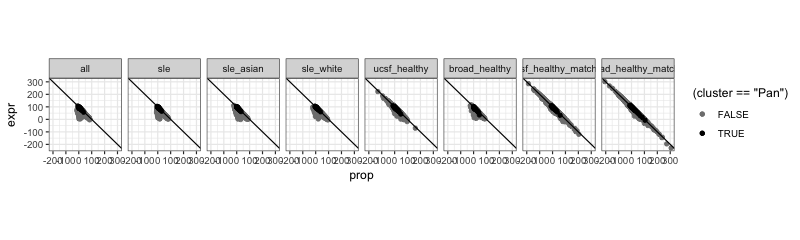

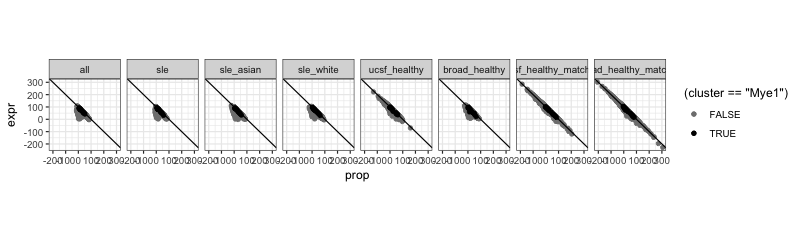

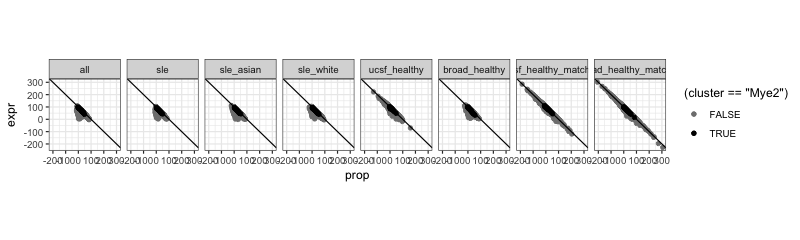

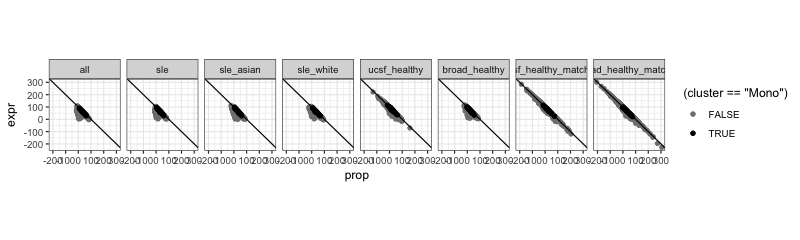

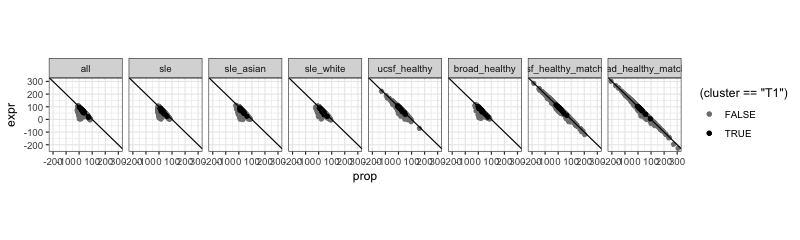

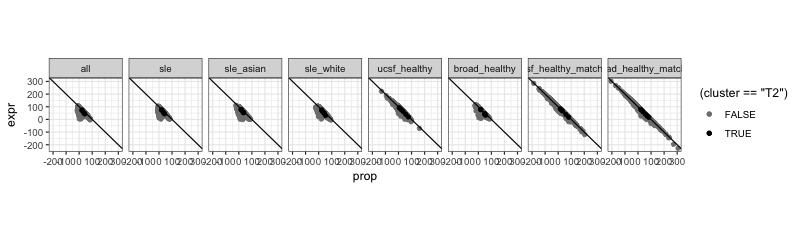

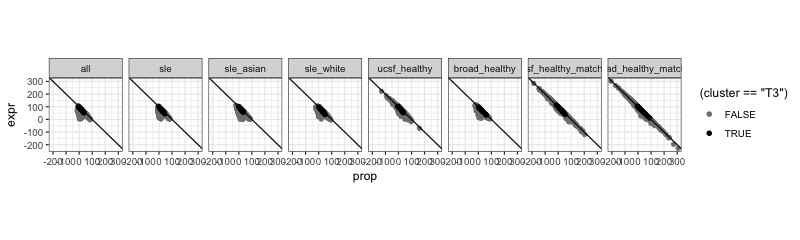

cor        prop_mean expr_mean sum_mean
all                   -0.8194809 16.353837 70.25222  86.60606
sle                   -0.8332235 15.986082 70.82906  86.81514
sle_asian             -0.8823494 16.792335 72.02980  88.82214
sle_white             -0.8981489 17.635658 71.97553  89.61119
ucsf_healthy          -0.9727060  8.298166 88.04907  96.34724
broad_healthy         -0.9301158 11.100701 82.22859  93.32929
ucsf_healthy_matched  -0.9922797  9.239857 88.69168  97.93154
broad_healthy_matched -0.9960823 12.641623 85.97346  98.61508

cM        Th         B         NK        ncM     
all_prop                    7.462084  3.4560514  2.275196 0.7362743 1.835375
all_expr                   20.427215 20.5256298  8.453433 4.9331691 5.201675
sle_prop                    6.673142  2.9894936  3.304862 0.7896035 1.605248
sle_expr                   24.409999 17.5496986  7.708256 4.7349034 6.355762
sle_asian_prop              6.085049  3.0291749  3.841974 0.7736452 1.869871
sle_asian_expr             23.921327 15.1816239  9.473920 4.2973859 6.088013
sle_white_prop              7.497159  2.9234698  2.766723 1.3327665 1.807528
sle_white_expr             23.299603 19.6349790  6.133558 5.3966434 6.685477
ucsf_healthy_prop           1.952646  0.7043288  2.063608 0.4740409 1.866928
ucsf_healthy_expr          15.271779 30.7768543 10.417375 5.9000806 4.493900
broad_healthy_prop          4.367619  1.4811158  1.789611 1.3564839 1.251779
broad_healthy_expr         16.797807 24.4134043 11.127189 6.5513840 5.095105
ucsf_healthy_matched_prop   1.675467  0.7872040  2.378725 0.4633133 1.996086
ucsf_healthy_matched_expr  14.638394 31.0036194 10.134831 6.0687666 4.574846
broad_healthy_matched_prop  3.197173  0.9423738  2.079481 2.9360168 1.413395
broad_healthy_matched_expr 13.303015 26.7332278 11.493098 7.0313023 5.483196
                           Tc         cDC       pDC       adj.r2   
all_prop                    0.8678877 0.5194528 1.1343526 16.353837
all_expr                   18.9788793 2.3127547 0.8805715 70.252223
sle_prop                    1.6870874 0.8477462 0.1674531 15.986082
sle_expr                   18.2018844 2.3058895 0.6689719 70.829060
sle_asian_prop              1.8147121 1.0218215 0.3615291 16.792335
sle_asian_expr             19.1384515 2.3767817 0.7247198 72.029802
sle_white_prop              1.8754590 0.8362686 0.3818530 17.635658
sle_white_expr             16.0394405 2.5163274 0.8727454 71.975535
ucsf_healthy_prop           0.6693845 0.7881945 0.2165249  8.298166
ucsf_healthy_expr          18.3598636 3.8250223 2.2194692 88.049070
broad_healthy_prop          0.6564763 0.5668379 0.4978582 11.100701
broad_healthy_expr         19.1576888 3.1109421 1.7786987 82.228588
ucsf_healthy_matched_prop   0.7084736 1.1511729 0.3458377  9.239857
ucsf_healthy_matched_expr  18.1643995 3.6762017 2.2326626 88.691680
broad_healthy_matched_prop  0.5712791 0.9441361 0.8098829 12.641623
broad_healthy_matched_expr 17.5394414 3.7405572 1.7824247 85.973458
                           total.prop_expr.r2 adj.prop_expr.r2
all_prop                   85.34545           85.35289        
all_expr                   85.34545           85.35289        
sle_prop                   84.72645           84.74704        
sle_expr                   84.72645           84.74704        
sle_asian_prop             84.84779           85.19339        
sle_asian_expr             84.84779           85.19339        
sle_white_prop             85.34912           85.74116        
sle_white_expr             85.34912           85.74116        
ucsf_healthy_prop          84.65839           86.60667        
ucsf_healthy_expr          84.65839           86.60667        
broad_healthy_prop         89.77158           89.88634        
broad_healthy_expr         89.77158           89.88634        
ucsf_healthy_matched_prop  81.38383           87.01642        
ucsf_healthy_matched_expr  81.38383           87.01642        
broad_healthy_matched_prop 87.53573           91.37605        
broad_healthy_matched_expr 87.53573           91.37605

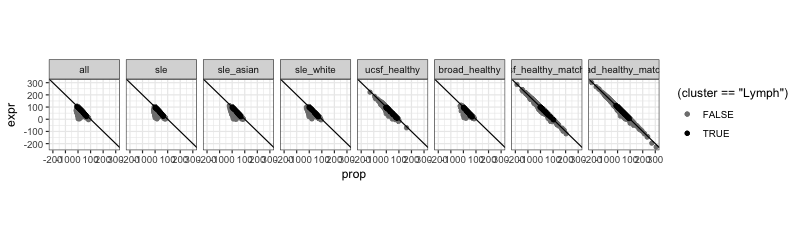

In [84]:
output_noint_df <- data.frame(prop=output_prop_noint[,"adj r2"], expr=output_expr_noint[,"adj r2"], type="all")
output_noint_df$cluster <- "no_diff";
output_noint_df$cluster[match(cuttree_out[,"gene"],rownames(output_noint_df))] <- as.character(cuttree_out[,"cluster"]);

output_sle_noint_df <- data.frame(prop=output_sle_prop_noint[,"adj r2"], expr=output_sle_expr_noint[,"adj r2"], type="sle")
output_sle_noint_df$cluster <- "no_diff";
output_sle_noint_df$cluster[match(cuttree_out[,"gene"],rownames(output_sle_noint_df))] <- as.character(cuttree_out[,"cluster"]);

# output_sle_down_noint_df <- data.frame(prop=output_sle_down_prop_noint[,"adj r2"], expr=output_sle_down_expr_noint[,"adj r2"], type="sle_down")
# output_sle_down_noint_df$cluster <- "no_diff";
# output_sle_down_noint_df$cluster[match(cuttree_out[,"gene"],rownames(output_sle_down_noint_df))] <- cuttree_out[,"cluster"];

output_sle_asian_noint_df <- data.frame(prop=output_sle_asian_prop_noint[,"adj r2"], expr=output_sle_asian_expr_noint[,"adj r2"], type="sle_asian")
output_sle_asian_noint_df$cluster <- "no_diff";
output_sle_asian_noint_df$cluster[match(cuttree_out[,"gene"],rownames(output_sle_asian_noint_df))] <- as.character(cuttree_out[,"cluster"]);

output_sle_white_noint_df <- data.frame(prop=output_sle_white_prop_noint[,"adj r2"], expr=output_sle_white_expr_noint[,"adj r2"], type="sle_white")
output_sle_white_noint_df$cluster <- "no_diff";
output_sle_white_noint_df$cluster[match(cuttree_out[,"gene"],rownames(output_sle_white_noint_df))] <- as.character(cuttree_out[,"cluster"]);

output_ucsf_healthy_noint_df <- data.frame(prop=output_ucsf_healthy_prop_noint[,"adj r2"], expr=output_ucsf_healthy_expr_noint[,"adj r2"], type="ucsf_healthy")
output_ucsf_healthy_noint_df$cluster <- "no_diff";
output_ucsf_healthy_noint_df$cluster[match(cuttree_out[,"gene"],rownames(output_ucsf_healthy_noint_df))] <- as.character(cuttree_out[,"cluster"]);

output_broad_healthy_noint_df <- data.frame(prop=output_broad_healthy_prop_noint[,"adj r2"], expr=output_broad_healthy_expr_noint[,"adj r2"], type="broad_healthy")
output_broad_healthy_noint_df$cluster <- "no_diff";
output_broad_healthy_noint_df$cluster[match(cuttree_out[,"gene"],rownames(output_broad_healthy_noint_df))] <- as.character(cuttree_out[,"cluster"]);

output_ucsf_healthy_noint_matched_df <- data.frame(prop=output_ucsf_healthy_prop_noint_matched[,"adj r2"], expr=output_ucsf_healthy_expr_noint_matched[,"adj r2"], type="ucsf_healthy_matched")
output_ucsf_healthy_noint_matched_df$cluster <- "no_diff";
output_ucsf_healthy_noint_matched_df$cluster[match(cuttree_out[,"gene"],rownames(output_ucsf_healthy_noint_matched_df))] <- as.character(cuttree_out[,"cluster"]);

output_broad_healthy_noint_matched_df <- data.frame(prop=output_broad_healthy_prop_noint_matched[,"adj r2"], expr=output_broad_healthy_expr_noint_matched[,"adj r2"], type="broad_healthy_matched")
output_broad_healthy_noint_matched_df$cluster <- "no_diff";
output_broad_healthy_noint_matched_df$cluster[match(cuttree_out[,"gene"],rownames(output_broad_healthy_noint_matched_df))] <- as.character(cuttree_out[,"cluster"]);

df <- rbind(output_noint_df, output_sle_noint_df, 
            output_sle_asian_noint_df, output_sle_white_noint_df, 
            output_ucsf_healthy_noint_df, output_broad_healthy_noint_df,
            output_ucsf_healthy_noint_matched_df, output_broad_healthy_noint_matched_df)
df$cluster <- as.factor(df$cluster)

options(repr.plot.width = 10, repr.plot.height = 3)
df_all_ifn <- df;
df_all_ifn$cluster <- as.character(df_all_ifn$cluster);
df_all_ifn$cluster[which(df_all_ifn$cluster != "no_diff" & df_all_ifn$cluster != "Pan")] <- "Not_Pan";
df_all_ifn$cluster <- factor(df_all_ifn$cluster, levels=c("no_diff","Not_Pan","Pan"));
df_all_ifn <- df_all_ifn[order(df_all_ifn$cluster),]
ggplot(aes(prop, expr,color=cluster), data=df_all_ifn)+geom_point()+facet_grid(~type)+theme_bw()+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray70","gray40", "black"))+theme(aspect.ratio=1)

ggplot(aes(prop, expr,color=(cluster=="Pan")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'Pan'),
             aes(x = prop, y = expr, color = (cluster=="Pan")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
ggplot(aes(prop, expr,color=(cluster=="Mye1")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'Mye1'),
             aes(x = prop, y = expr, color = (cluster=="Mye1")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
ggplot(aes(prop, expr,color=(cluster=="Mye2")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'Mye2'),
             aes(x = prop, y = expr, color = (cluster=="Mye2")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
ggplot(aes(prop, expr,color=(cluster=="Mono")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'Mono'),
             aes(x = prop, y = expr, color = (cluster=="Mono")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
ggplot(aes(prop, expr,color=(cluster=="T1")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'T1'),
             aes(x = prop, y = expr, color = (cluster=="T1")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
ggplot(aes(prop, expr,color=(cluster=="T2")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'T2'),
             aes(x = prop, y = expr, color = (cluster=="T2")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
ggplot(aes(prop, expr,color=(cluster=="T3")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'T3'),
             aes(x = prop, y = expr, color = (cluster=="T3")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
ggplot(aes(prop, expr,color=(cluster=="Lymph")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'Lymph'),
             aes(x = prop, y = expr, color = (cluster=="Lymph")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)

df2 <- data.frame(cor=c(cor(output_prop_noint[,"adj r2"], output_expr_noint[,"adj r2"]),
                        cor(output_sle_prop_noint[,"adj r2"], output_sle_expr_noint[,"adj r2"]),
                        ##cor(output_sle_down_prop_noint[,"adj r2"], output_sle_down_expr_noint[,"adj r2"]),
                        cor(output_sle_asian_prop_noint[,"adj r2"], output_sle_asian_expr_noint[,"adj r2"]),
                        cor(output_sle_white_prop_noint[,"adj r2"], output_sle_white_expr_noint[,"adj r2"]),
                        cor(output_ucsf_healthy_prop_noint[,"adj r2"], output_ucsf_healthy_expr_noint[,"adj r2"]),
                        cor(output_broad_healthy_prop_noint[,"adj r2"], output_broad_healthy_expr_noint[,"adj r2"]),
                        cor(output_ucsf_healthy_prop_noint_matched[,"adj r2"], output_ucsf_healthy_expr_noint_matched[,"adj r2"]),
                        cor(output_broad_healthy_prop_noint_matched[,"adj r2"], output_broad_healthy_expr_noint_matched[,"adj r2"])),
                  prop_mean=c(mean(output_prop_noint[,"adj r2"]), mean(output_sle_prop_noint[,"adj r2"]),
                              mean(output_sle_asian_prop_noint[,"adj r2"]), mean(output_sle_white_prop_noint[,"adj r2"]),
                              mean(output_ucsf_healthy_prop_noint[,"adj r2"]), mean(output_broad_healthy_prop_noint[,"adj r2"]),
                              mean(output_ucsf_healthy_prop_noint_matched[,"adj r2"]), mean(output_broad_healthy_prop_noint_matched[,"adj r2"])),
                  expr_mean=c(mean(output_expr_noint[,"adj r2"]), mean(output_sle_expr_noint[,"adj r2"]),
                              mean(output_sle_asian_expr_noint[,"adj r2"]), mean(output_sle_white_expr_noint[,"adj r2"]),
                              mean(output_ucsf_healthy_expr_noint[,"adj r2"]), mean(output_broad_healthy_expr_noint[,"adj r2"]),
                              mean(output_ucsf_healthy_expr_noint_matched[,"adj r2"]), mean(output_broad_healthy_expr_noint_matched[,"adj r2"])),
                  sum_mean = c(mean(output_prop_noint[,"adj r2"]+output_expr_noint[,"adj r2"]), 
                               mean(output_sle_prop_noint[,"adj r2"]+output_sle_expr_noint[,"adj r2"]), 
                               mean(output_sle_asian_prop_noint[,"adj r2"]+output_sle_asian_expr_noint[,"adj r2"]), 
                               mean(output_sle_white_prop_noint[,"adj r2"]+output_sle_white_expr_noint[,"adj r2"]), 
                               mean(output_ucsf_healthy_prop_noint[,"adj r2"]+output_ucsf_healthy_expr_noint[,"adj r2"]),
                               mean(output_broad_healthy_prop_noint[,"adj r2"]+output_broad_healthy_expr_noint[,"adj r2"]),
                               mean(output_ucsf_healthy_prop_noint_matched[,"adj r2"]+output_ucsf_healthy_expr_noint_matched[,"adj r2"]),
                               mean(output_broad_healthy_prop_noint_matched[,"adj r2"]+output_broad_healthy_expr_noint_matched[,"adj r2"])))
rownames(df2) <- c("all", "sle", "sle_asian","sle_white", "ucsf_healthy", "broad_healthy", "ucsf_healthy_matched", "broad_healthy_matched")

df2

df3 <- rbind(data.frame(t(apply(output_prop_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_expr_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_sle_prop_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_sle_expr_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_sle_asian_prop_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_sle_asian_expr_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_sle_white_prop_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_sle_white_expr_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_ucsf_healthy_prop_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_ucsf_healthy_expr_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_broad_healthy_prop_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_broad_healthy_expr_noint,2,mean,na.rm=T))),
            data.frame(t(apply(output_ucsf_healthy_prop_noint_matched,2,mean,na.rm=T))),
            data.frame(t(apply(output_ucsf_healthy_expr_noint_matched,2,mean,na.rm=T))),
            data.frame(t(apply(output_broad_healthy_prop_noint_matched,2,mean,na.rm=T))),
            data.frame(t(apply(output_broad_healthy_expr_noint_matched,2,mean,na.rm=T))))

rownames(df3) <- c("all_prop", "all_expr", "sle_prop", "sle_expr", 
                   "sle_asian_prop", "sle_asian_expr", "sle_white_prop", "sle_white_expr", 
                   "ucsf_healthy_prop", "ucsf_healthy_expr","broad_healthy_prop", "broad_healthy_expr",
                  "ucsf_healthy_matched_prop", "ucsf_healthy_matched_expr","broad_healthy_matched_prop", "broad_healthy_matched_expr")

df3

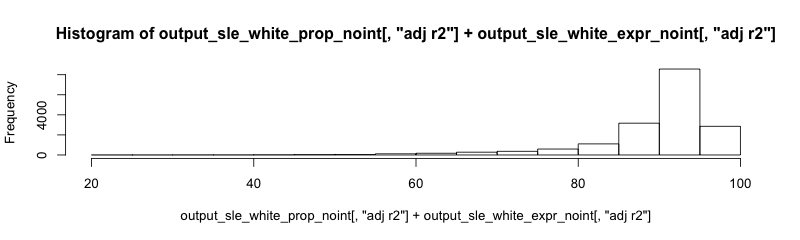

In [85]:
hist(output_sle_white_prop_noint[,"adj r2"]+output_sle_white_expr_noint[,"adj r2"])

In [86]:
df <- rbind(output_sle_asian_noint_df, output_sle_white_noint_df, 
            output_broad_healthy_noint_df)
df$cluster <- as.factor(df$cluster)

options(repr.plot.width = 3, repr.plot.height = 3)
df_all_ifn <- df;
df_all_ifn$cluster <- as.character(df_all_ifn$cluster);
df_all_ifn$cluster2 <- as.character(df_all_ifn$cluster);


In [87]:
df <- rbind(output_sle_asian_noint_df, output_sle_white_noint_df, 
            output_broad_healthy_noint_df)
df$cluster <- as.factor(df$cluster)

options(repr.plot.width = 3, repr.plot.height = 3)
df_all_ifn <- df;
df_all_ifn$cluster <- as.character(df_all_ifn$cluster);

df_all_ifn$cluster2 <- as.character(df_all_ifn$cluster);
df_all_ifn$cluster2[which(df_all_ifn$cluster2 != "no_diff" & df_all_ifn$cluster == "Pan")] <- "pan";
df_all_ifn$cluster2[which(df_all_ifn$cluster2 != "no_diff" & df_all_ifn$cluster != "Pan")] <- "no_pan";
df_all_ifn$cluster2 <- factor(df_all_ifn$cluster2, levels=c("no_diff","no_pan","pan"));

##df_all_ifn$cluster[which(df_all_ifn$cluster != "no_diff")] <- "diff";
##df_all_ifn$cluster <- factor(df_all_ifn$cluster, levels=c("no_diff","diff"));

df_all_ifn <- df_all_ifn[order(df_all_ifn$cluster),]

##ggplot(aes(prop, expr,color=cluster), data=df_all_ifn)+geom_point()+facet_grid(~type)+theme_bw()+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray70","gray40", "black"))+theme(aspect.ratio=1)

sle_asian_p = ggplot(aes(prop, color=cluster2, fill=cluster2), data=df_all_ifn[df_all_ifn$type=="sle_asian",])+geom_density(alpha=0.7)+
                theme_bw()+theme(aspect.ratio=1, legend.position="none")+xlim(0,100)+scale_color_manual(values=c("gray", "green", "blue"))+scale_fill_manual(values=c("gray", "green", "blue"))
ggsave("sle_asian_diff_no_diff_histogram.png", sle_asian_p, dpi=300, height=3, width=3)

sle_asian_p = ggplot(aes(prop, color=cluster, fill=cluster), data=df_all_ifn[df_all_ifn$type=="sle_asian",])+geom_density(alpha=0.7)+
                theme_bw()+theme(aspect.ratio=1, legend.position="none")+xlim(0,100)
ggsave("sle_asian_cluster_histogram.png", sle_asian_p, dpi=300, height=3, width=3)

sle_white_p = ggplot(aes(prop, color=cluster2, fill=cluster2), data=df_all_ifn[df_all_ifn$type=="sle_white",])+geom_density(alpha=0.7)+
                theme_bw()+theme(aspect.ratio=1, legend.position="none")+xlim(0,100)+scale_color_manual(values=c("gray", "green", "blue"))+scale_fill_manual(values=c("gray", "green", "blue"))##+scale_color_manual(values=c("gray70", "black"))+scale_fill_manual(values=c("gray70", "black"))
ggsave("sle_white_diff_no_diff_histogram.png", sle_white_p, dpi=300, height=3, width=3)

sle_white_p = ggplot(aes(prop, color=cluster, fill=cluster), data=df_all_ifn[df_all_ifn$type=="sle_white",])+geom_density(alpha=0.7)+
                theme_bw()+theme(aspect.ratio=1, legend.position="none")+xlim(0,100)
ggsave("sle_white_cluster_histogram.png", sle_white_p, dpi=300, height=3, width=3)

broad_white_p = ggplot(aes(prop, color=cluster2, fill=cluster2), data=df_all_ifn[df_all_ifn$type=="broad_healthy",])+geom_density(alpha=0.7)+
                theme_bw()+theme(aspect.ratio=1, legend.position="none")+xlim(0,100)+scale_color_manual(values=c("gray", "green", "blue"))+scale_fill_manual(values=c("gray", "green", "blue"))##+scale_color_manual(values=c("gray70", "black"))+scale_fill_manual(values=c("gray70", "black"))
ggsave("broad_white_diff_no_diff_histogram.png", broad_white_p, dpi=300, height=3, width=3)


broad_white_p = ggplot(aes(prop, color=cluster, fill=cluster), data=df_all_ifn[df_all_ifn$type=="broad_healthy",])+geom_density(alpha=0.7)+
                theme_bw()+theme(aspect.ratio=1, legend.position="none")+xlim(0,100)
ggsave("broad_white_cluster_histogram.png", broad_white_p, dpi=300, height=3, width=3)

# sle_asian_p = ggplot(aes(prop, expr, color=cluster), data=df_all_ifn[df_all_ifn$type=="sle_asian",])+geom_point()+
#                 theme_bw()+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray70","gray40", "black"))+xlim(-10,100)+ylim(-10,100)+theme(aspect.ratio=1, legend.position="none")
# ggsave("sle_asian_plot.png", ggMarginal(sle_asian_p, type="histogram"),dpi = 300, height=3, width=3)

# sle_white_p = ggplot(aes(prop, expr, color=cluster), data=df_all_ifn[df_all_ifn$type=="sle_white",])+geom_point()+
#                 theme_bw()+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray70","gray40", "black"))+xlim(-10,100)+ylim(-10,100)+theme(aspect.ratio=1, legend.position="none")
# ggsave("sle_white_plot.png", ggMarginal(sle_white_p, type="histogram"),dpi = 300, height=3, width=3)

# broad_white_p = ggplot(aes(prop, expr, color=cluster), data=df_all_ifn[df_all_ifn$type=="broad_healthy",])+geom_point()+
#                 theme_bw()+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray70","gray40", "black"))+xlim(-10,100)+ylim(-10,100)+theme(aspect.ratio=1, legend.position="none")
# ggsave("broad_white_plot.png", ggMarginal(broad_white_p, type="histogram"), dpi = 300, height=3, width=3)


Warning message:
“Removed 865 rows containing non-finite values (stat_density).”Warning message:
“Removed 865 rows containing non-finite values (stat_density).”Warning message:
“Removed 928 rows containing non-finite values (stat_density).”Warning message:
“Removed 928 rows containing non-finite values (stat_density).”Warning message:
“Removed 1823 rows containing non-finite values (stat_density).”Warning message:
“Removed 1823 rows containing non-finite values (stat_density).”

In [88]:
# mean(df_all_ifn$prop[intersect(grep("healthy",df_all_ifn$type), which(df_all_ifn$cluster=="1"))])

In [89]:
# colMeans(output_prop_noint[match(pbmc_deseq_sig_genes,rownames(output_prop_noint)),],na.rm=T)


In [90]:
# output_prop_noint[match("IFI6",rownames(output_prop_noint)),]
# output_expr_noint[match("IFI6",rownames(output_expr_noint)),]

In [91]:
rst_sle <- NULL;
rst_ctrl <- NULL;
rst_sle_asian <- NULL;
rst_sle_white <- NULL;
rst <- NULL;

for ( i in unique(df_all_ifn[,"cluster"])) {
    print(i);
    
        rst <- rbind(rst,
                     c(colMeans(output_prop_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]==i)],rownames(output_prop_noint)),],na.rm=T),cluster=i))

    rst_sle <- rbind(rst_sle,
                     c(colMeans(output_sle_prop_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]==i)],rownames(output_sle_prop_noint)),],na.rm=T),cluster=i))
    
     rst_sle_asian <- rbind(rst_sle_asian,
                     c(colMeans(output_sle_asian_prop_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]==i)],rownames(output_sle_asian_prop_noint)),],na.rm=T),cluster=i))
    
       rst_sle_white <- rbind(rst_sle_white,
                     c(colMeans(output_sle_white_prop_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]==i)],rownames(output_sle_white_prop_noint)),],na.rm=T),cluster=i))
    
    rst_ctrl <- rbind(rst_ctrl,
                      c(colMeans(output_broad_healthy_prop_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]==i)],rownames(output_broad_healthy_prop_noint)),],na.rm=T),cluster=i))
}

rst <- rbind(rst, 
                 c(colMeans(output_prop_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]!="no_diff")],
                                                                 rownames(output_prop_noint)),],na.rm=T),cluster="diff"))

rst_sle <- rbind(rst_sle, 
                 c(colMeans(output_sle_prop_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]!="no_diff")],
                                                                 rownames(output_sle_prop_noint)),],na.rm=T),cluster="diff"))

rst_sle_asian <- rbind(rst_sle_asian, 
                 c(colMeans(output_sle_asian_prop_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]!="no_diff")],
                                                                 rownames(output_sle_asian_prop_noint)),],na.rm=T),cluster="diff"))

rst_sle_white <- rbind(rst_sle_white, 
                 c(colMeans(output_sle_white_prop_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]!="no_diff")],
                                                                 rownames(output_sle_white_prop_noint)),],na.rm=T),cluster="diff"))

rst_ctrl <- rbind(rst_ctrl, 
                  c(colMeans(output_broad_healthy_prop_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]!="no_diff")],
                                                                            rownames(output_broad_healthy_prop_noint)),],na.rm=T),cluster="diff"))

rst <- rbind(rst, 
                 c(colMeans(output_prop_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]!="no_diff" & df_all_ifn[,"cluster"]!="Pan")],
                                                                 rownames(output_prop_noint)),],na.rm=T),cluster="cell_type"))

rst_sle <- rbind(rst_sle, 
                 c(colMeans(output_sle_prop_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]!="no_diff" & df_all_ifn[,"cluster"]!="Pan")],
                                                                 rownames(output_sle_prop_noint)),],na.rm=T),cluster="cell_type"))

rst_sle_asian <- rbind(rst_sle_asian, 
                 c(colMeans(output_sle_asian_prop_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]!="no_diff" & df_all_ifn[,"cluster"]!="Pan")],
                                                                 rownames(output_sle_asian_prop_noint)),],na.rm=T),cluster="cell_type"))

rst_sle_white <- rbind(rst_sle_white, 
                 c(colMeans(output_sle_white_prop_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]!="no_diff" & df_all_ifn[,"cluster"]!="Pan")],
                                                                 rownames(output_sle_white_prop_noint)),],na.rm=T),cluster="cell_type"))

rst_ctrl <- rbind(rst_ctrl, 
                  c(colMeans(output_broad_healthy_prop_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]!="no_diff" & df_all_ifn[,"cluster"]!="Pan")],
                                                                            rownames(output_broad_healthy_prop_noint)),],na.rm=T),cluster="cell_type"))

rst <- rbind(rst, 
                 c(colMeans(output_prop_noint),cluster="all"))

rst_sle <- rbind(rst_sle, 
                 c(colMeans(output_sle_prop_noint),cluster="all"))

rst_sle_asian <- rbind(rst_sle_asian, 
                 c(colMeans(output_sle_asian_prop_noint),cluster="all"))

rst_sle_white <- rbind(rst_sle_white, 
                 c(colMeans(output_sle_white_prop_noint),cluster="all"))

rst_ctrl <- rbind(rst_ctrl, 
                  c(colMeans(output_broad_healthy_prop_noint),cluster="all"))

# rst_sle <- rbind(rst_sle,
#                  c(colMeans(output_sle_prop_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]=="no_diff")],
#                                                                  rownames(output_sle_prop_noint)),],na.rm=T), cluster="no_diff"))
                 
# rst_ctrl <- rbind(rst_ctrl,
#                   c(colMeans(output_broad_healthy_prop_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]=="no_diff")],
#                                                                                   rownames(output_broad_healthy_prop_noint)),],na.rm=T), cluster="no_diff"))
rst
rst_sle
rst_ctrl

[1] "Lymph"
[1] "Mono"
[1] "Mye1"
[1] "Mye2"
[1] "no_diff"
[1] "Pan"
[1] "T1"
[1] "T2"
[1] "T3"


cM                Th               B                 NK               
 [1,] 25.275434682854   7.50579512806936 2.32744616278448  1.08091588525557 
 [2,] 21.3061709767518  7.17293670992372 1.89297085399131  0.895254996476993
 [3,] 10.9973695830717  4.39396041471393 1.08008446067053  0.799030820414998
 [4,] 10.7049118272902  5.20660408666274 1.23468550227862  0.663552233982977
 [5,] 7.40382913275263  3.4299506539185  2.284249111222    0.725894833002718
 [6,] 3.96837910606723  1.50566214229585 0.187083323868715 0.403779145723864
 [7,] 8.09953330644779  8.77468178103872 1.30228896394959  1.96142641248652 
 [8,] 1.10092442330624  8.20358311743326 11.2497869064632  1.7963104680843  
 [9,] 0.807108719222846 4.24718867355018 1.04551416352777  6.86687361505455 
[10,] 12.1625674159128  5.56208541281005 1.54468913451504  1.57377655929708 
[11,] 13.952102793925   6.44797095464649 1.8411777598286   1.82929323582456 
[12,] 7.46208369540593  3.45605139123719 2.27519571504104  0.736274260533288
      ncM                Tc                cDC                pDC              
 [1,] 1.58503223847962   0.576372450564838 0.562105532581374  3.29049285926234 
 [2,] 4.34924342017888   0.381004235343128 0.131012961948168  3.73649647586652 
 [3,] 4.52847416817747   0.696703629562349 0.013729005753127  2.26363321607464 
 [4,] 1.39152431350284   0.793149149368189 0.386530738232247  1.88481612072815 
 [5,] 1.83027649450949   0.864368604708015 0.520320820009432  1.11156395556668 
 [6,] 1.99535185227911   0.146925135835322 -0.101731892357696 1.47546188197852 
 [7,] 1.4871103388476    0.613374189056876 0.344877835196492  9.26963670726978 
 [8,] 2.05231982296908   1.46915094039178  10.2803497126095   0.69372087622283 
 [9,] -0.431719320420485 6.35932905406294  0.236482168557341  -0.22785258531128
[10,] 2.24678255576434   1.15184170933678  0.449411059542086  2.97314013767509 
[11,] 2.30169270939905   1.37130624837733  0.569775612255832  3.30021929696514 
[12,] 1.83537519441629   0.867887734987568 0.519452771203618  1.13435262346176 
      adj r2           total prop_expr r2 adj prop_expr r2 cluster  
 [1,] 39.2788452436011 93.5411790805877   93.5444512901829 Lymph    
 [2,] 37.4272214987942 93.8977446502329   93.9008297071405 Mono     
 [3,] 23.600493294792  95.4332400098441   95.43554458712   Mye1     
 [4,] 20.945571521693  94.0537468536448   94.0567614061239 Mye2     
 [5,] 16.2353228456027 85.2332212060361   85.2407144595659 no_diff  
 [6,] 9.3463010462392  97.6013214378772   97.6025324902511 Pan      
 [7,] 29.7497854044526 94.0299607475142   94.0329761437857 T1       
 [8,] 32.7428339194353 89.0005133719631   89.0061024004956 T2       
 [9,] 17.3159427113066 92.4348497078112   92.4387139174918 T3       
[10,] 25.9165655023006 94.4013097623717   94.4041464324151 diff     
[11,] 29.5353588892566 93.702456637836    93.7056483278302 cell_type
[12,] 16.353836729609  85.3454532636607   85.3528895131658 all

cM               Th               B                   NK               
 [1,] 23.9701858836488 6.04892032098998 4.10942207617702    0.607608506317542
 [2,] 19.5853626518763 5.79575365274579 3.30938182928312    0.598534151098837
 [3,] 11.0300210015219 4.79405049386606 1.56960380677856    0.625686353742561
 [4,] 10.0157871369595 4.17242478753816 2.20074346670586    0.482305318255686
 [5,] 6.61290164602288 2.96393243228055 3.31532018224606    0.781425608279165
 [6,] 3.3071830220878  1.532299265807   -0.0745623476939348 0.37879341697234 
 [7,] 5.35502168222132 10.6986291767286 2.44260746485304    2.65747653348815 
 [8,] 1.42370271665054 4.85216194709919 13.9085569767806    0.946414795286481
 [9,] 4.74387134961973 3.97712255445642 1.49752719175499    6.8009807547021  
[10,] 11.5338369825094 5.05198754841692 2.46101391841189    1.44946598478774 
[11,] 13.3304625600727 5.8206551043892  3.01476045928558    1.68329102833363 
[12,] 6.67314175985446 2.98949356431779 3.30486210810743    0.789603490241275
      ncM               Tc                cDC               pDC               
 [1,] 0.964155044722365 2.45702019258902  1.22836390711847  -0.166228974452782
 [2,] 3.44662433375789  1.78237497856618  0.443325459539616 -0.161742312339994
 [3,] 3.90718149467959  1.77796784391764  0.340871275443378 0.150218309933489 
 [4,] 1.14537326837761  2.25635787861521  1.05289051549428  -0.238654903060459
 [5,] 1.60318769070227  1.67786164771836  0.848002913065145 0.162145465949791 
 [6,] 1.42452957159675  0.363739871965924 0.137415501078099 0.191473909196732 
 [7,] 1.01396061399787  0.993489938137779 0.935757983230514 6.15478566335568  
 [8,] 1.02519386111592  3.09333082993488  9.02498623383178  0.101426438267857 
 [9,] 0.189323843529951 9.13583747793693  0.39944707036175  -0.255380189351709
[10,] 1.77145625543454  2.43150009303265  0.827032571505862 0.595715393214733 
[11,] 1.84722185305428  2.88307991142653  0.977638598380891 0.683998016161193 
[12,] 1.60524756688446  1.68708738685721  0.847746202566787 0.167453054850367 
      adj r2           total prop_expr r2 adj prop_expr r2 cluster  
 [1,] 36.3947930351068 93.3998382438856   93.4087093419769 Lymph    
 [2,] 32.4198987732132 93.1168502691657   93.1261076553059 Mono     
 [3,] 22.7692684194293 94.6194446176978   94.6266990473141 Mye1     
 [4,] 19.5945130558504 92.4005445798144   92.4107729070719 Mye2     
 [5,] 15.8835378478035 84.6157478990678   84.6364891666847 no_diff  
 [6,] 7.09422621458574 98.0690912644932   98.0717007574918 Pan      
 [7,] 27.5344987892609 91.3532467212633   91.3649932823245 T1       
 [8,] 30.8284486117922 89.2701862886245   89.2848256830592 T2       
 [9,] 24.4205746358312 92.0730058364465   92.0837404242872 T3       
[10,] 24.2601936672578 93.6589564933327   93.6675144481232 diff     
[11,] 28.0090831109448 92.6958236122747   92.705680656422  cell_type
[12,] 15.9860815037525 84.7264512263564   84.7470433507513 all

cM                 Th                B                NK              
 [1,] 24.9570490900247   1.93299285773559  3.55689912157333 3.32394831797356
 [2,] 18.1978242594405   1.3348420033301   2.89709943570531 2.88941041951408
 [3,] 11.0700192737932   0.724610153632887 3.23857879008173 3.01205833512708
 [4,] 12.38484209879     1.30062103918901  2.64745909206692 1.39524786093681
 [5,] 4.28352119168865   1.47266720155216  1.77834673762182 1.32926755333947
 [6,] 3.19891848865987   0.576025441116934 1.21513708532018 1.39782286031148
 [7,] 2.89118495632387   7.43796954120864  2.65718100203516 2.81913844021035
 [8,] 0.0524773190412683 5.8734613270431   13.3498458710838 2.60650202005831
 [9,] 2.42558580619438   2.90104755451975  1.10515849032595 13.0570204584563
[10,] 11.1533470847779   2.16282285205189  2.69854965446188 3.55253674013918
[11,] 12.8905211459991   2.50936481535952  3.02251331898708 4.02310643803258
[12,] 4.3676188409169    1.48111580981558  1.7896114921183  1.35648392171928
      ncM               Tc                cDC               pDC               
 [1,] 2.66726144917886  0.721623996668979 1.61464698904944  -0.624750350094972
 [2,] 3.59844472576109  0.339086867771719 0.254700205420146 -0.261528664747544
 [3,] 5.42175284138055  1.12688545066846  0.39517009305103  0.137581767509787 
 [4,] 1.40623933913694  0.943794522201632 0.597683203914872 -0.545346188730282
 [5,] 1.23793502699777  0.652418208463305 0.562381814678923 0.493316884353073 
 [6,] 2.07405192745996  0.406468030742977 0.360511014854692 0.895358513599803 
 [7,] 0.481343164199722 0.773201540210769 0.620768660819295 7.1465162845534   
 [8,] 3.28611505956525  0.69546463618857  15.997969838162   -0.696434214831164
 [9,] 0.804416297561986 3.77049928732063  0.24599625922765  1.43274491997996  
[10,] 2.36885967584761  0.98391590838889  0.926391227199162 0.864287470632807 
[11,] 2.43324297721963  1.11002521500122  1.04997426207899  0.857501840559555 
[12,] 1.25177935229839  0.65647627015543  0.566837871697879 0.497858157265147 
      adj r2           total prop_expr r2 adj prop_expr r2 cluster  
 [1,] 34.6564474359029 88.9855992639249   89.1091853962644 Lymph    
 [2,] 27.0637828635013 90.2473164023154   90.3567443486596 Mono     
 [3,] 23.1876736237371 90.7167246191475   90.8208869429882 Mye1     
 [4,] 18.3690253000527 90.6402592450249   90.7452786689075 Mye2     
 [5,] 10.954421815012  89.746997756046    89.8620418261821 no_diff  
 [6,] 9.44941343076201 94.1717348930512   94.2371314632378 Pan      
 [7,] 23.5564134815717 93.8156888179918   93.8850818223759 T1       
 [8,] 37.8911488296615 89.5279855312496   89.6454967670793 T2       
 [9,] 24.6938690259376 94.8890061755022   94.9463541753419 T3       
[10,] 22.9037912892525 91.7548103146475   91.8473251601676 diff     
[11,] 25.8421036951297 91.2269762113179   91.3254134388074 cell_type
[12,] 11.1007011964959 89.7715765909244   89.8863448673419 all

In [92]:
b<-output_prop_noint[order(output_prop_noint[,"B"],decreasing=T),]
b<-b[na.omit(match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]!="no_diff")],
                                                                 rownames(b))),]
b[order(b[,"B"],decreasing=T),]

cM          Th          B          NK          ncM        
RP5-887A10.1   13.86027992 -2.063995   23.352023  -0.16151948  2.71381815
HLA-DQA1        1.89259062  7.240115   21.814082   1.38507507  0.31071249
IL6            -0.49471594  2.895400   15.773362   0.24065830 -0.01973371
HLA-DPB1       -0.06171128 11.288425   12.408003   1.55726619  0.89743376
HLA-DQB1        0.39240257  5.213257   10.772799   1.53136453 -0.53449082
ISG20           5.17819613 -2.736758    8.853410   0.04790968  1.14331228
HLA-DPA1       -1.10864854 10.323939    8.585172   2.69783389  7.67039738
CD69           -1.09851623 -3.961441    7.498810   0.04224920 -0.17187839
PMAIP1         -2.35388036  4.989988    6.041364  -0.02187933  0.09746025
FCN1           35.83081105 11.863628    4.342849   1.57027570  4.44311886
MEFV           37.54959256 12.660249    4.288626   1.11317284  5.38338090
PLBD1          34.70158872  9.073169    4.158088   1.75917846  0.50806450
S100A8         52.88390264 11.038702    4.153868   2.35618844 -1.14560492
CLEC4D         44.12057362  8.346894    4.078388   1.01777825 -0.99481564
MGST1          46.04145971  9.921913    3.989706   1.61754260 -1.16789015
PDE4B           1.23109967  1.308695    3.980737   0.97919494 -0.68743002
SIGLEC9        29.12417647 12.117962    3.957032   0.52844867  5.35045770
IGSF6          27.30613767 12.249406    3.858388   1.08632928  6.23446924
CLEC4E         40.27721744  8.144520    3.851056   1.45865151 -0.97741258
OSCAR          35.31397082 11.041900    3.665100   1.00899573  3.52678458
S100A12        45.70472199  9.998573    3.549777   1.74858040 -0.84473369
S100A9         48.10515432 11.776846    3.530019   2.06000379 -1.01679395
SECTM1         22.87280893 10.551318    3.519847   1.18818433 14.62402065
PLA2G7         40.15139443  7.943836    3.399737   1.19953678 -1.03316007
CD163          38.46085495  8.271399    3.360206   1.32806523 -1.34112966
FCGR2A         32.20840068 10.864370    3.335060   1.81982785  8.30467359
HGF            27.65775191  8.691017    3.334056   0.20199644 10.88395052
QPCT           39.73454437  8.478917    3.314688   1.58736203 -1.53610375
BST1           41.95169769 11.639560    3.310994   1.63863590  0.66557972
FPR2           22.21262894  7.818684    3.179240   0.83481695  6.02552145
⋮              ⋮           ⋮           ⋮          ⋮           ⋮          
TNFRSF4         0.6371596   1.47707730 -0.1195380  2.02789606 -1.20442577
RP11-1399P15.1  2.5681392   3.09309400 -0.1398680  0.28619170  0.40043266
PRSS23          4.1521981   4.42796201 -0.1427786 26.27905252 -0.02551881
PDE4D          -1.0829859  -1.53326729 -0.1437357 -0.07662312 -0.09146173
IFI44           5.3890547   1.11580090 -0.1451867  0.47059799  0.50301503
CMPK2           6.9220335   2.47016076 -0.1478693  0.48393298  0.88163665
MX2             7.2184733   1.20230684 -0.1517830  1.11862380  2.11282358
USP18          -0.2812918  -0.07728327 -0.1626185  0.01625232  1.27235234
CXCL10          6.5405302   3.96986996 -0.1632592  0.31048672  4.23194021
RSAD2           4.3789758   1.52994780 -0.1872261  0.65743851  1.71493570
OASL            4.9283521   1.80805555 -0.1895408  0.29799422  1.59425455
LY6E            1.5828363   0.70216269 -0.1906491  0.01879667  2.88529416
ISG15           3.4096424   1.38180619 -0.1938471  0.25994113  2.01150518
APOBEC3B        3.3783796   2.61477784 -0.1970714  0.80327130  3.61145811
IFITM3          5.6189099   4.07826808 -0.2137841  0.40587895  8.75426098
IFIT3           2.8340272   2.51247161 -0.2205766  0.15889750  4.20692321
DDX60          -0.6175448   0.08128502 -0.2313814 -0.25212399  0.67953360
HERC5           1.9753271   0.06066622 -0.2440503  0.39416764  1.53207064
IRF7            1.0118701   3.61032257 -0.2625657  0.26676085  1.65239043
KLRB1          13.8935012  -0.02006186 -0.2854920 16.24899316  1.39081943
OTOF            3.9367613   2.81276757 -0.2898956  0.58079360  0.30951672
CREM           -1.1936314  -0.70551237 -0.2939241 -0.33152068 -0.32354627
IFIT1           5.0

In [93]:
a<-output_expr_noint[order(output_expr_noint[,"B"],decreasing=T),]
a<-a[na.omit(match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]!="no_diff")],
                                                                 rownames(a))),]
a[order(a[,"B"],decreasing=T),]

cM           Th           B            NK          ncM        
IL6           12.8174741    1.4937733   63.367009     0.12386550  3.82831855
RP5-887A10.1   2.3208356    0.1688560   53.627048     1.10451957  0.02195634
CD69           3.3874589   34.7662081   34.761399     8.69074017  0.08862239
JUN           15.3306972   27.2895076   26.620117     8.14510037  3.05063171
ZNF331        11.4804532   29.1034390   21.005362     5.22936550  0.65239997
SIK1          31.5773682    7.2182982   19.822082     5.23949197  6.14760872
RP11-386I14.4 23.6779142    8.6191636   18.637410     7.44105471  2.92167099
IFITM1        26.1368224   29.8841202   18.579680     0.06915982  4.67388395
HLA-DQB1      24.2583247    4.7712751   18.240569    -0.50462586  4.92944318
FOS           16.8507961    3.5181504   17.555288    10.98080066 -0.42522313
RGS2          26.3819093   -0.1273195   16.197680     3.88168397  3.40921387
NR4A2         29.2093635   11.7768704   15.216435     4.03047226 -0.20196034
PMAIP1         1.4127357   26.1062959   14.381434     8.62460936  1.75945841
ZFP36         19.9794665   16.2453572   14.074409     7.10000625  2.49104644
ISG20          8.5378049   17.8551151   14.059252     6.53982890  4.60366850
HLA-DRB5      46.2580893    2.9815060   13.357186     0.76829266 14.18922368
PDE4B         32.0652862   20.9300826   13.181658    -0.01944477  3.12831388
IFI44L        41.9916347   21.0407253   12.748442     1.13767251  8.10872370
HLA-DRB1      22.5704064    4.5679931   12.429845    -1.07570880  9.27482866
HLA-DPB1      16.3096212    7.7344141   12.335621    -0.84231815  3.34662336
AREG          30.7186099    9.8034057   11.629181    18.93475314 -1.19277955
CTA-384D8.34  34.9115556   -0.0717351   11.516501     0.03220670 10.16097036
JUNB          15.6967433   43.6235418   11.384300    -3.54433276  6.57899770
SAMD9L        31.6666491   14.2347271   10.558441     6.75182482 10.13619688
MYADM         27.6745048    6.6419498   10.407181     5.03575353  1.79713633
DNASE1L3      -0.3160654    0.8376992   10.254631     0.45907593  1.07481874
RGS1          17.1433423   32.3505277    9.964819     4.83159377  2.14387772
IFIH1         32.0082647   17.8061045    9.875063     6.77587993 10.90827290
HERC6         17.0715398   40.8332625    8.877001     8.50956674  5.28986934
XAF1          29.1812906   21.4710187    8.638539     3.46700497  9.17610489
⋮             ⋮            ⋮            ⋮            ⋮           ⋮          
MARC1         41.226723676  0.572344538  0.011276728  0.05947890  0.68921461
LILRA5        28.228174203  0.107317986  0.003853183  0.47398069 11.78569156
C1QB           0.001771013  0.160246323 -0.008385136  0.05193530 74.19927664
EXOC3L1       48.265677613  0.878440626 -0.008853987  0.20373086 15.31420783
CLEC4D        35.858460574 -0.029885329 -0.022920811 -0.01536477  0.74929684
BLVRA         34.259741505  4.652589508 -0.035239264 -0.16305663 12.46097473
PLBD1         39.280660975  0.001569658 -0.042533743 -0.01279544  3.48390742
VSTM1         61.095545307  0.386640427 -0.074908277 -0.02424834 10.80642944
PRSS23         2.984587793  2.058583333 -0.079820779 22.07946838  0.03551893
MGST1         28.840664930 -0.028495562 -0.084661019  0.20911228  0.27700704
UTS2          21.229175996 26.858146640 -0.087508509 20.35717571 -0.77275015
MARCO         47.219572751  2.735884706 -0.091469825  0.95736766 16.23685749
FCGR2A        28.930120473  1.233542438 -0.092310649  0.33486389  4.37963205
EREG          57.923297369  0.231211185 -0.094574066  0.27883161  5.90413100
BST1          32.355062554  0.266572037 -0.119839143 -0.01206080 -0.02479520
FCGR1A        43.232892738  1.994856970 -0.134330396  0.22812128  6.85697286
RP11-1143G9.4 69.194689434 -0.308091308 -0.137226419  0.74774132 15.15165133
G0S2          59.348953258  0.311271645 -0.163306386  0.78705334 17.57018930
TNFSF13B      32.799673113  2.888182539 -0.204569181  0.23602739 11.02106670
MT2A          32.717359877  8.656553912 -0.252976376  2.88078204 18.21610213
APOBEC3B  

In [94]:
(a+b)[order((a+b)[,"B"],decreasing=T),]

cM         Th         B           NK          ncM         
IL6           12.3227582  4.3891733 79.140371    0.3645238   3.808584833
RP5-887A10.1  16.1811155 -1.8951388 76.979070    0.9430001   2.735774486
CD69           2.2889427 30.8047670 42.260209    8.7329894  -0.083256000
HLA-DQB1      24.6507273  9.9845323 29.013367    1.0267387   4.394952357
JUN           14.3474632 27.2690139 28.443651    8.6766875   2.132820497
HLA-DQA1      21.0941434  8.7422179 26.742962    1.5465569   3.094830567
HLA-DPB1      16.2479100 19.0228394 24.743624    0.7149480   4.244057126
ZNF331        11.9460297 28.5522558 23.748608    5.7389109   0.821161560
ISG20         13.7160010 15.1183572 22.912662    6.5877386   5.746980781
PMAIP1        -0.9411447 31.0962835 20.422798    8.6027300   1.856918655
SIK1          36.4972536 14.2672381 20.066359    5.7612834  12.067353649
FOS           47.8382245 11.4714589 18.963593   12.2691382  -0.134756818
RP11-386I14.4 39.0002125 13.4802211 18.837087    9.6011376   3.614760412
IFITM1        24.1146324 24.5234793 17.778891   -0.8723467   4.436878799
PDE4B         33.2963858 22.2387778 17.162395    0.9597502   2.440883864
RGS2          47.5839534 10.9464283 16.184492    5.3951689   6.962595927
NR4A2         37.0632336 18.7436745 15.253501    4.4150097  -0.004827362
HLA-DRB1      26.9603951 11.5201730 15.098724    0.7343039  11.192374967
HLA-DPA1      14.6221303 17.2534743 14.798348    1.6878592  15.619053335
ZFP36         32.6129782 24.5182022 14.740407    7.2961257   5.423699349
HLA-DRB5      46.9031303  3.6822434 13.383905    0.8245558  14.310712512
IFI44L        43.8552839 21.0616461 12.676076    1.4323262   8.194139713
AREG          30.1241323 11.4061130 11.573914   18.7143159  -1.260833328
CTA-384D8.34  53.7023142  9.0979904 11.488385    1.4588123  12.685576874
JUNB          15.0363631 42.0564879 11.444176   -1.2787178   7.861102439
SAMD9L        31.6697666 16.1301769 11.065026    6.5909686  10.495175655
MYADM         49.6798781 17.3477618 10.821421    5.5793041   4.155690271
DNASE1L3       5.8196149 -0.8571956 10.381061    0.2230741   1.605183116
IFIH1         35.7256643 19.6172943 10.273770    7.2515456  12.200464250
RGS1          13.2164428 33.7842818  9.947206    4.6061289   1.564370697
⋮             ⋮          ⋮          ⋮           ⋮           ⋮           
RP11-1143G9.4 78.6669103  2.8133298  0.64895358  0.91258601 14.65854187 
NRG1          83.7670796  5.0414192  0.58175165  1.45824882  3.03775109 
OSM           58.6143870 25.7513031  0.57994173  0.38472709 -0.15736154 
NPDC1         -0.5397155 55.6263518  0.57701924  0.59759564 -0.78727468 
ANKRD55        9.1086351 72.7049412  0.56762223  0.55261800  2.13528297 
GZMH          -0.5467328 11.0110733  0.53830261 11.08444369 -0.35299234 
ADTRP          7.5429379 77.6725788  0.51755850 -0.01328508  0.26443481 
GZMB           1.5199962 10.1948971  0.50757772 66.03526193 -0.72770931 
SCO2          59.0967658  9.6432429  0.49890518  4.29305657 13.34820527 
FFAR2         47.6369681  8.5800197  0.48324471  1.86711757 37.54051047 
RETN          77.3012666  5.4688640  0.44335532  1.26714123  9.61398119 
SERPING1      68.9857894  5.1931722  0.42020315  0.95439113 20.92952694 
HBEGF         68.5025507  7.2696953  0.41385982  2.07740481  6.82977523 
TNFRSF4        2.1465943 85.9877453  0.30354485  8.15559773 -1.19639436 
IFITM3        50.2299031  7.3612983  0.24654134  2.59730686 35.82733470 
C1orf21        3.2117434 11.0026258  0.17157196 26.98654475 -0.33754256 
PDE4D          9.1340078 39.7756013  0.16573231 17.49732545  0.83531118 
FGFBP2         2.6911927 10.3748931  0.15555988 39.35666506 -0.28660219 
CXCL10        58.9991899  5.0306849  0.14911275  0.30022341 31.04443635 
G0S2          69.3243590  5.1591640  0.04627875  1.52115874 20.06161116 
ISG15         39.9254636 19.9785957 -0.03433237  4.52525313 22.30388893 
PRSS23         7.1367858  6.4865453 -0.22259936 48.35852090  0.01000013 
OTOF          70.7503451  8.1207573 -0.23544758  1.55503045  8.33023388 

In [95]:
rst_sle <- NULL;
rst_ctrl <- NULL;
rst_sle_asian <- NULL;
rst_sle_white <- NULL;
rst <- NULL;

for ( i in unique(df_all_ifn[,"cluster"])) {
    print(i);
    
        rst <- rbind(rst,
                     c(colMeans(output_expr_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]==i)],rownames(output_expr_noint)),],na.rm=T),cluster=i))

    rst_sle <- rbind(rst_sle,
                     c(colMeans(output_sle_expr_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]==i)],rownames(output_sle_expr_noint)),],na.rm=T),cluster=i))
    
     rst_sle_asian <- rbind(rst_sle_asian,
                     c(colMeans(output_sle_asian_expr_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]==i)],rownames(output_sle_asian_expr_noint)),],na.rm=T),cluster=i))
    
       rst_sle_white <- rbind(rst_sle_white,
                     c(colMeans(output_sle_white_expr_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]==i)],rownames(output_sle_white_expr_noint)),],na.rm=T),cluster=i))
    
    rst_ctrl <- rbind(rst_ctrl,
                      c(colMeans(output_broad_healthy_expr_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]==i)],rownames(output_broad_healthy_expr_noint)),],na.rm=T),cluster=i))
}

rst <- rbind(rst, 
                 c(colMeans(output_expr_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]!="no_diff")],
                                                                 rownames(output_expr_noint)),],na.rm=T),cluster="diff"))

rst_sle <- rbind(rst_sle, 
                 c(colMeans(output_sle_expr_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]!="no_diff")],
                                                                 rownames(output_sle_expr_noint)),],na.rm=T),cluster="diff"))

rst_sle_asian <- rbind(rst_sle_asian, 
                 c(colMeans(output_sle_asian_expr_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]!="no_diff")],
                                                                 rownames(output_sle_asian_expr_noint)),],na.rm=T),cluster="diff"))

rst_sle_white <- rbind(rst_sle_white, 
                 c(colMeans(output_sle_white_expr_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]!="no_diff")],
                                                                 rownames(output_sle_white_expr_noint)),],na.rm=T),cluster="diff"))

rst_ctrl <- rbind(rst_ctrl, 
                  c(colMeans(output_broad_healthy_expr_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]!="no_diff")],
                                                                            rownames(output_broad_healthy_expr_noint)),],na.rm=T),cluster="diff"))

rst <- rbind(rst, 
                 c(colMeans(output_expr_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]!="no_diff" & df_all_ifn[,"cluster"]!="Pan")],
                                                                 rownames(output_expr_noint)),],na.rm=T),cluster="cell_type"))

rst_sle <- rbind(rst_sle, 
                 c(colMeans(output_sle_expr_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]!="no_diff" & df_all_ifn[,"cluster"]!="Pan")],
                                                                 rownames(output_sle_expr_noint)),],na.rm=T),cluster="cell_type"))

rst_sle_asian <- rbind(rst_sle_asian, 
                 c(colMeans(output_sle_asian_expr_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]!="no_diff" & df_all_ifn[,"cluster"]!="Pan")],
                                                                 rownames(output_sle_asian_expr_noint)),],na.rm=T),cluster="cell_type"))

rst_sle_white <- rbind(rst_sle_white, 
                 c(colMeans(output_sle_white_expr_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]!="no_diff" & df_all_ifn[,"cluster"]!="Pan")],
                                                                 rownames(output_sle_white_expr_noint)),],na.rm=T),cluster="cell_type"))

rst_ctrl <- rbind(rst_ctrl, 
                  c(colMeans(output_broad_healthy_expr_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]!="no_diff" & df_all_ifn[,"cluster"]!="Pan")],
                                                                            rownames(output_broad_healthy_expr_noint)),],na.rm=T),cluster="cell_type"))

rst <- rbind(rst, 
                 c(colMeans(output_expr_noint),cluster="all"))

rst_sle <- rbind(rst_sle, 
                 c(colMeans(output_sle_expr_noint),cluster="all"))

rst_sle_asian <- rbind(rst_sle_asian, 
                 c(colMeans(output_sle_asian_expr_noint),cluster="all"))

rst_sle_white <- rbind(rst_sle_white, 
                 c(colMeans(output_sle_white_expr_noint),cluster="all"))

rst_ctrl <- rbind(rst_ctrl, 
                  c(colMeans(output_broad_healthy_expr_noint),cluster="all"))

# rst_sle <- rbind(rst_sle,
#                  c(colMeans(output_sle_expr_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]=="no_diff")],
#                                                                  rownames(output_sle_expr_noint)),],na.rm=T), cluster="no_diff"))
                 
# rst_ctrl <- rbind(rst_ctrl,
#                   c(colMeans(output_broad_healthy_expr_noint[match(rownames(df_all_ifn)[which(df_all_ifn[,"cluster"]=="no_diff")],
#                                                                                   rownames(output_broad_healthy_expr_noint)),],na.rm=T), cluster="no_diff"))
rst
rst_sle
rst_ctrl

[1] "Lymph"
[1] "Mono"
[1] "Mye1"
[1] "Mye2"
[1] "no_diff"
[1] "Pan"
[1] "T1"
[1] "T2"
[1] "T3"


cM               Th               B                 NK                
 [1,] 39.0261477687227 3.20355185432961 1.14583641253133  1.82437691789219  
 [2,] 39.8082952761526 1.26498459953824 0.699391350127958 0.583885333326901 
 [3,] 35.5913765871458 8.17714138268659 0.958989094375688 1.49832072450266  
 [4,] 29.0598337205222 14.3571161807017 8.92900919683528  4.84015541629122  
 [5,] 20.3215519482791 20.6323497915081 8.51219215469578  4.94906365603025  
 [6,] 37.1669513583826 17.3194641376916 4.66049279958082  3.67555203315515  
 [7,] 1.66541393830002 30.2866437678966 4.29868451911337  3.41744939098265  
 [8,] 19.614136795176  5.10106424712844 10.8296181287925  -0.654229144877531
 [9,] 5.67123198061293 17.3615774531028 3.93839490776026  13.0713114789603  
[10,] 28.9530164763909 11.9145373176369 3.71219893587739  3.65065583120792  
[11,] 27.1591686285995 10.7341510006135 3.50510027598813  3.64521872963324  
[12,] 20.4272148700922 20.5256298328258 8.45343256569073  4.93316906896117  
      ncM              Tc               cDC              pDC               
 [1,] 5.67845103775105 2.80172168688024 3.87588708315567 0.240432298885619 
 [2,] 14.4073450438114 1.29595218947534 2.26882411551057 -0.193768538423474
 [3,] 16.0228948086463 9.33365615477122 3.51117208450942 0.133463864923569 
 [4,] 4.15389836653969 13.0165139619029 3.4069709594651  -0.02927177430415 
 [5,] 5.16193528087031 19.0599684828367 2.30328083803006 0.889204242060239 
 [6,] 12.1944664585363 11.7740877249109 3.73195578261384 -0.103880990562099
 [7,] 1.58291460769838 23.5391476665785 1.48884531979907 1.86797125533803  
 [8,] 5.65673384742596 8.82662154206607 14.9960702637701 -1.21616194696173 
 [9,] 1.19175380790656 38.7043241282221 0.85746803237138 0.301013722819798 
[10,] 8.4082039092879  12.4359004806504 3.07718689594097 0.184006168154467 
[11,] 7.5813189847394  12.5804343008693 2.93419139195494 0.246878076379924 
[12,] 5.20167479751337 18.978879302997  2.31275468514157 0.880571490491466 
      adj r2           total prop_expr r2 adj prop_expr r2 cluster  
 [1,] 54.8179313354307 93.5411790805877   93.5444512901829 Lymph    
 [2,] 56.9954483428165 93.8977446502329   93.9008297071405 Mono     
 [3,] 72.2255862840977 95.4332400098441   95.43554458712   Mye1     
 [4,] 73.6196809789502 94.0537468536448   94.0567614061239 Mye2     
 [5,] 70.2681589018496 85.2332212060361   85.2407144595659 no_diff  
 [6,] 88.4613583324658 97.6013214378772   97.6025324902511 Pan      
 [7,] 64.7937271067163 94.0299607475142   94.0329761437857 T1       
 [8,] 57.2038718506385 89.0005133719631   89.0061024004956 T2       
 [9,] 75.7696726130369 92.4348497078112   92.4387139174918 T3       
[10,] 68.9663520224477 94.4013097623717   94.4041464324151 diff     
[11,] 64.7088219087655 93.702456637836    93.7056483278302 cell_type
[12,] 70.2522227049197 85.3454532636607   85.3528895131658 all

cM               Th               B                 NK               
 [1,] 43.7562997691464 2.44244539327109 0.757964523644984 1.61178113189035 
 [2,] 43.5618037401497 1.02515834120193 0.720326053268353 0.540842017751572
 [3,] 40.8421255782744 5.84265042401056 0.909425729934998 0.939525271386729
 [4,] 37.1627452808776 11.8101105311404 5.86592854318499  3.35629839239374 
 [5,] 24.2888478742438 17.641303871833  7.76749633263613  4.75634989517787 
 [6,] 46.0182051152708 13.5220508599855 3.5895868456206   2.55203604930496 
 [7,] 2.66218596437819 30.099698622308  4.53117115383173  3.94035989550558 
 [8,] 28.3526536796629 5.2849615175361  8.43071784031406  0.220079493478499
 [9,] 7.96108014939871 14.2689978326782 3.49951840787439  11.0803079146144 
[10,] 34.1855355320623 10.1581939039781 2.92826276017742  3.0044113662897  
[11,] 31.6013893012467 9.42355847680411 2.78383566105764  3.10320597574614 
[12,] 24.4099991494175 17.549698645295  7.70825637898321  4.73490336739612 
      ncM              Tc               cDC               pDC                
 [1,] 5.76070838667461 2.74276613556865 3.63541792960396  0.0731697730895551 
 [2,] 15.8097781761856 1.04635211711869 2.19896522106105  0.29715958873536   
 [3,] 16.1782456725279 6.95986086634285 4.19174662279679  -0.0591807451573486
 [4,] 5.52080673558464 13.1718785792532 2.25942843046218  -0.234423961782568 
 [5,] 6.32215958465357 18.286699576543  2.29853526253994  0.673830016108456  
 [6,] 12.7461862460612 10.7060209514522 3.95601474591816  -0.350973024624196 
 [7,] 1.91679783076954 22.3467438854348 1.81675809319444  2.43455549856476   
 [8,] 5.48716700282333 4.86148336058898 12.7631505875982  0.224012719030666  
 [9,] 1.13449310769661 34.6996482292055 0.531089104311081 0.336135201210978  
[10,] 9.06705767383148 11.3582576888781 2.89929388389416  0.276978443574967  
[11,] 8.26356982472383 11.5007001947528 2.66851576460156  0.41411726996329   
[12,] 6.35576152453726 18.201884373853  2.30588950828004  0.668971918558098  
      adj r2           total prop_expr r2 adj prop_expr r2 cluster  
 [1,] 57.9076314318372 93.3998382438856   93.4087093419769 Lymph    
 [2,] 61.638236929229  93.1168502691657   93.1261076553059 Mono     
 [3,] 72.5859786437115 94.6194446176978   94.6266990473141 Mye1     
 [4,] 73.8452732908269 92.4005445798144   92.4107729070719 Mye2     
 [5,] 70.8360393984003 84.6157478990678   84.6364891666847 no_diff  
 [6,] 91.2389209453614 98.0690912644932   98.0717007574918 Pan      
 [7,] 65.0012099188382 91.3532467212633   91.3649932823245 T1       
 [8,] 59.9090626288153 89.2701862886245   89.2848256830592 T2       
 [9,] 68.736464590503  92.0730058364465   92.0837404242872 T3       
[10,] 70.2659140748499 93.6589564933327   93.6675144481232 diff     
[11,] 65.6856022295658 92.6958236122747   92.705680656422  cell_type
[12,] 70.8290601531876 84.7264512263564   84.7470433507513 all

cM               Th               B                 NK                 
 [1,] 40.2806388937907 2.94236359274384 1.94686789539744  2.10239031413874   
 [2,] 45.6064640359888 2.27235267738586 0.918594374507298 1.3915503541811    
 [3,] 28.6349053465768 9.91342453404085 1.88583252558843  2.9359018767076    
 [4,] 33.5655319576906 10.7043363465963 7.93854010596371  4.85174030133338   
 [5,] 16.6451450170472 24.5686575350351 11.2138254364732  6.57759309812569   
 [6,] 29.5111230052299 16.9360063824273 6.47637774760494  4.93191642296638   
 [7,] 1.0516949468168  36.8210293971644 4.14341308869421  3.00668622002347   
 [8,] 18.3455806763768 1.13931479877177 15.385956960729   -0.0158767753032348
 [9,] 6.45989267801896 14.1630360168165 3.29412096236997  15.4795134301092   
[10,] 29.1158619866574 11.8862250234623 4.13658255194064  4.4366051829442    
[11,] 29.0295406147853 10.7833992094355 3.62559279656567  4.32843376270947   
[12,] 16.7978065251634 24.4134042902924 11.1271886717474  6.55138398402369   
      ncM               Tc                cDC              pDC               
 [1,] 5.90101024431863  1.97807456509628  6.45091417563392 0.248068846770912 
 [2,] 15.0838600583824  1.98008162531103  3.42853617578098 0.0686814462671582
 [3,] 15.0830381638589  13.0126449736321  2.37802195776908 1.02957391658155  
 [4,] 5.44502213242811  12.5165603443715  4.42840497974558 0.419322864364843 
 [5,] 5.04701919867171  19.2493092898948  3.0978844822056  1.7907113238516   
 [6,] 14.5189823410276  11.8945728445427  4.3736440336075  1.23308386052785  
 [7,] 0.755954821322628 24.1913376391826  1.99567678743875 3.20690350979596  
 [8,] 2.39310182556137  0.729835242230409 21.6428139222186 -0.786128506895902
 [9,] 1.38734946985823  31.039665495376   1.83031355448117 0.603639319383418 
[10,] 8.97509926100863  11.764956389421   4.1645467659903  0.809412225076135 
[11,] 7.76436617456771  11.7366493474979  4.1188818454762  0.716886235724612 
[12,] 5.09510517703037  19.1576888478749  3.11094213344491 1.77869865443594  
      adj r2           total prop_expr r2 adj prop_expr r2 cluster  
 [1,] 58.160247736222  88.9855992639249   89.1091853962644 Lymph    
 [2,] 66.5757713119219 90.2473164023154   90.3567443486596 Mono     
 [3,] 70.7580163452722 90.7167246191475   90.8208869429882 Mye1     
 [4,] 75.5267959467027 90.6402592450249   90.7452786689075 Mye2     
 [5,] 82.358837591105  89.746997756046    89.8620418261821 no_diff  
 [6,] 86.7495441081844 94.1717348930512   94.2371314632378 Pan      
 [7,] 72.4103400953795 93.8156888179918   93.8850818223759 T1       
 [8,] 55.2792765168056 89.5279855312496   89.6454967670793 T2       
 [9,] 71.9728741319987 94.8890061755022   94.9463541753419 T3       
[10,] 71.7189110898654 91.7548103146475   91.8473251601676 diff     
[11,] 68.436359051382  91.2269762113179   91.3254134388074 cell_type
[12,] 82.2285878845417 89.7715765909244   89.8863448673419 all

In [96]:
cor(colMeans(cm_expr_std), props[,"cM"])
cor(colMeans(th_expr_std), props[,"Th"])
cor(colMeans(tc_expr_std), props[,"Tc"])
cor(colMeans(nk_expr_std), props[,"NK"])
cor(colMeans(ncm_expr_std), props[,"ncM"])
cor(colMeans(pdc_expr_std), props[,"pDC"])
cor(colMeans(cdc_expr_std), props[,"cDC"])
cor(colMeans(b_expr_std), props[,"B"])

[1] -0.7174272

[1] -0.4571605

[1] -0.6956229

[1] -0.6276466

[1] -0.6917199

[1] -0.68007

[1] -0.7382993

[1] -0.5600162

## Plot stacked barcharts

Warning message:
“Removed 1 rows containing missing values (geom_bar).”

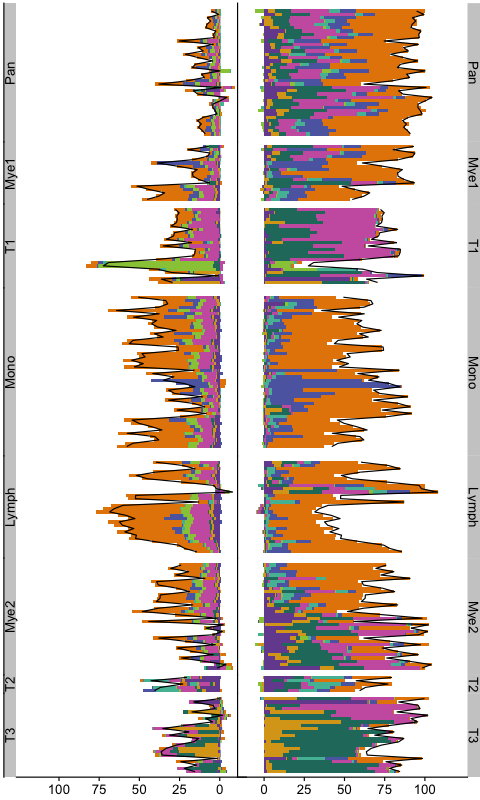

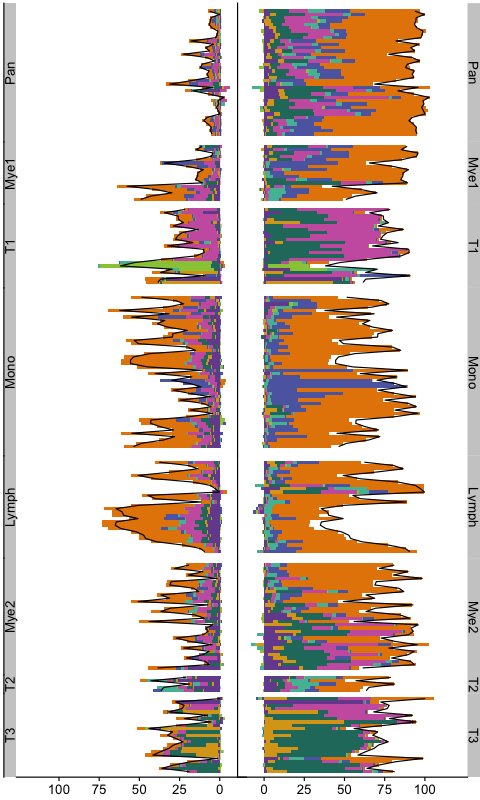

Saving 3 x 7 in image
Warning message:
“Removed 2 rows containing missing values (position_stack).”

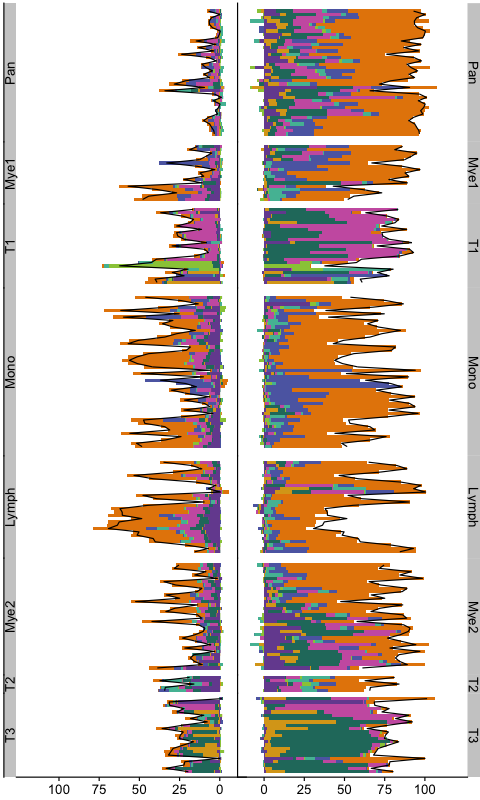

Saving 3 x 7 in image
Warning message:
“Removed 18 rows containing missing values (position_stack).”Warning message:
“Removed 40 rows containing missing values (geom_bar).”Warning message:
“Removed 17 rows containing missing values (position_stack).”Warning message:
“Removed 13 rows containing missing values (geom_bar).”

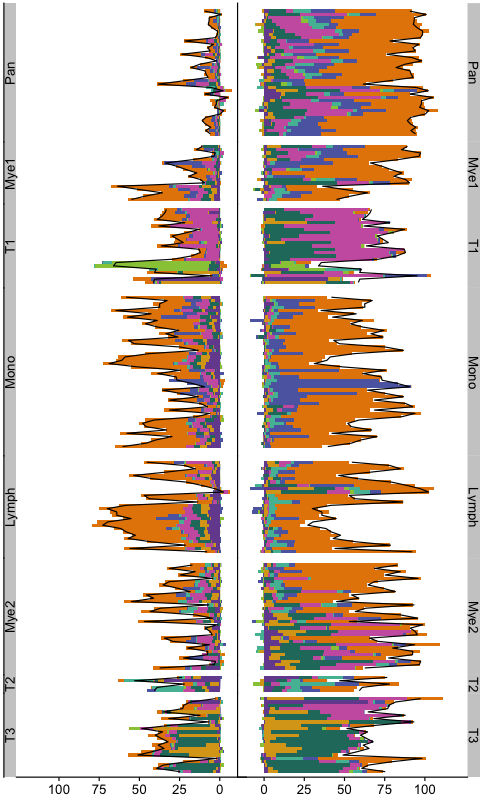

Warning message:
“Removed 4 rows containing missing values (geom_bar).”

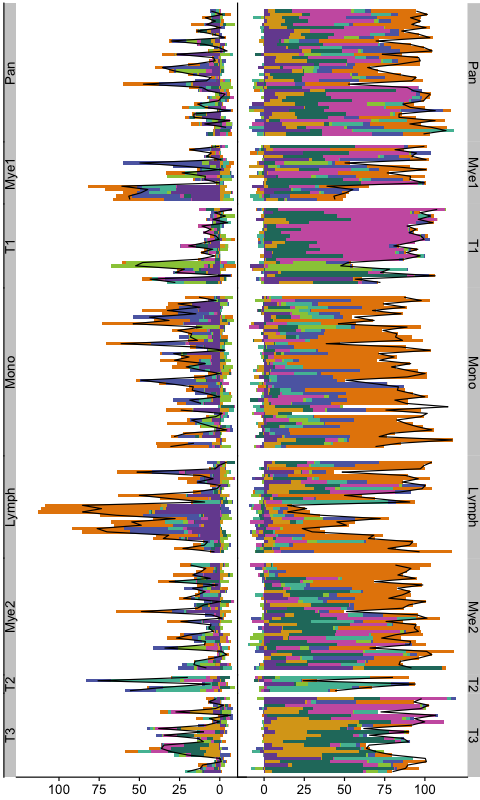

Saving 3 x 7 in image


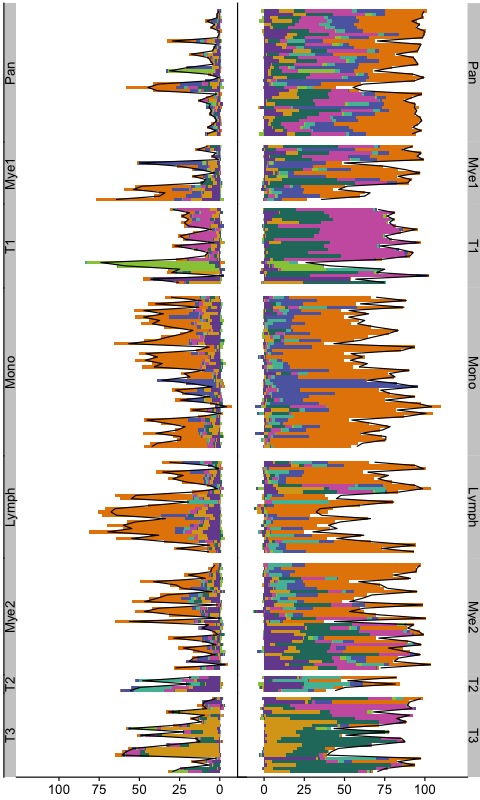

In [97]:
source("helper_functions.R")

a <- plot_bar_chart(output_prop_noint, output_expr_noint, pheatmap_std_out, cuttree_out)
b <- plot_bar_chart(output_sle_prop_noint, output_sle_expr_noint, pheatmap_std_out, cuttree_out)
c <- plot_bar_chart(output_sle_asian_prop_noint, output_sle_asian_expr_noint, pheatmap_std_out, cuttree_out)
ggsave(c, file="sle_asian_partitioned.png",width=3)
d <- plot_bar_chart(output_sle_white_prop_noint, output_sle_white_expr_noint, pheatmap_std_out, cuttree_out)
ggsave(d, file="sle_white_partitioned.png",width=3);
e <- plot_bar_chart(output_ucsf_healthy_prop_noint, output_ucsf_healthy_expr_noint, pheatmap_std_out, cuttree_out)
f <- plot_bar_chart(output_broad_healthy_prop_noint, output_broad_healthy_expr_noint, pheatmap_std_out, cuttree_out)
ggsave(f, file="broad_white_partitioned.png",width=3);


In [98]:
t(output_sle_prop_noint["C1QA",])
t(output_broad_healthy_prop_noint["C1QA",])
t(output_sle_expr_noint["C1QA",])
t(output_broad_healthy_expr_noint["C1QA",])

cM        Th       B        NK          ncM      Tc         cDC      
[1,] -3.443117 5.747042 3.228627 -0.03338368 27.46725 -0.4163339 0.3812813
     pDC       adj r2   total prop_expr r2 adj prop_expr r2
[1,] 0.1057325 29.75093 88.47733           88.49279

cM        Th        B         NK       ncM      Tc        cDC       
[1,] -1.336041 0.2162824 0.1239878 2.400114 35.17836 0.4926711 -0.6019056
     pDC       adj r2   total prop_expr r2 adj prop_expr r2
[1,] 0.4835837 35.88398 95.54784           95.59779

cM        Th         B         NK        ncM      Tc        cDC    
[1,] 0.2793344 -0.3969597 0.5022865 0.0221825 63.82477 0.6120567 2.15656
     pDC         adj r2   total prop_expr r2 adj prop_expr r2
[1,] -0.03733456 60.30215 88.47733           88.49279

cM        Th         B         NK        ncM      Tc        cDC     
[1,] 0.4449448 -0.4522071 0.5922674 -0.362042 59.66409 0.1572875 2.873697
     pDC       adj r2   total prop_expr r2 adj prop_expr r2
[1,] 0.1249079 61.21244 95.54784           95.59779

In [99]:
t(output_sle_prop_noint["IL6",])
t(output_broad_healthy_prop_noint["IL6",])
t(output_sle_expr_noint["IL6",])
t(output_broad_healthy_expr_noint["IL6",])

cM      Th       B        NK        ncM         Tc        cDC       
[1,] 2.31993 1.770899 24.69535 0.3168461 -0.05272892 0.3530051 -0.3618349
     pDC        adj r2   total prop_expr r2 adj prop_expr r2
[1,] -0.2354842 27.43478 94.48582           94.49323

cM        Th        B        NK         ncM       Tc        cDC       
[1,] 0.1678501 0.1680477 10.01726 -0.1692344 -1.189278 0.9477753 -0.1497184
     pDC         adj r2   total prop_expr r2 adj prop_expr r2
[1,] 0.009782928 9.525305 95.66427           95.71292

cM       Th       B        NK           ncM      Tc        cDC      
[1,] 5.635118 1.514857 61.18847 -0.002408269 2.438402 0.1297054 0.3695894
     pDC         adj r2   total prop_expr r2 adj prop_expr r2
[1,] -0.07971569 67.80511 94.48582           94.49323

cM      Th       B        NK       ncM      Tc      cDC        pDC      
[1,] 48.3115 1.644041 25.12941 2.322639 10.22307 2.62813 -0.1792093 0.1179407
     adj r2   total prop_expr r2 adj prop_expr r2
[1,] 87.64705 95.66427           95.71292

In [100]:
t(output_sle_prop_noint["IFNG",])
t(output_broad_healthy_prop_noint["IFNG",])
t(output_sle_expr_noint["IFNG",])
t(output_broad_healthy_expr_noint["IFNG",])

cM       Th       B        NK        ncM       Tc       cDC       
[1,] 4.348281 2.456651 1.481466 0.3813714 0.2422154 20.47925 -0.1153691
     pDC        adj r2   total prop_expr r2 adj prop_expr r2
[1,] -0.4225239 27.24199 93.53827           93.547

cM        Th        B         NK      ncM       Tc       cDC       pDC    
[1,] 0.7524566 0.9929613 0.5061295 3.22579 0.9594502 8.025782 0.4858681 0.35625
     adj r2   total prop_expr r2 adj prop_expr r2
[1,] 14.50683 92.00651           92.0962

cM        Th       B           NK       ncM        Tc       cDC        
[1,] 0.3766877 7.261716 -0.03626832 6.214166 -0.1103722 55.54397 -0.09090493
     pDC      adj r2   total prop_expr r2 adj prop_expr r2
[1,] 1.989666 67.17994 93.53827           93.547

cM        Th       B         NK       ncM       Tc      cDC        
[1,] 0.1061012 11.82168 0.6990724 10.06206 0.4816363 61.6586 0.006131476
     pDC       adj r2   total prop_expr r2 adj prop_expr r2
[1,] -0.139974 80.28002 92.00651           92.0962

In [101]:
t(output_sle_asian_prop_noint["CCR7",])
t(output_sle_white_prop_noint["CCR7",])
t(output_sle_prop_noint["CCR7",])
t(output_broad_healthy_prop_noint["CCR7",])
t(output_prop_noint["CCR7",])

cM       Th       B        NK       ncM       Tc          cDC     
[1,] 5.826194 13.63132 1.315742 1.500478 0.6058014 -0.01736684 1.156439
     pDC       adj r2  total prop_expr r2 adj prop_expr r2
[1,] 0.1654578 23.2407 94.71229           94.77555

cM       Th       B         NK        ncM      Tc        cDC        
[1,] 16.28055 17.37434 0.6999043 0.2030525 2.582453 0.3398069 -0.06300362
     pDC         adj r2   total prop_expr r2 adj prop_expr r2
[1,] -0.02191057 35.89553 94.34446           94.4053

cM       Th       B        NK        ncM       Tc         cDC      
[1,] 10.21485 14.53502 1.150537 0.7032826 0.4405483 -0.1660573 0.2412302
     pDC         adj r2   total prop_expr r2 adj prop_expr r2
[1,] -0.04614597 25.77971 94.46512           94.47278

cM       Th       B         NK       ncM       Tc          cDC      
[1,] 5.690611 12.11723 0.5260449 4.481026 0.7908727 -0.02855389 0.1034472
     pDC       adj r2   total prop_expr r2 adj prop_expr r2
[1,] 0.2329484 23.59438 97.95296           97.97592

cM       Th       B         NK        ncM      Tc         cDC       
[1,] 11.23292 12.89045 0.3119532 0.1027359 1.184124 -0.1173511 0.02159665
     pDC      adj r2  total prop_expr r2 adj prop_expr r2
[1,] 1.793122 26.7299 97.24811           97.24949

In [102]:
t(output_sle_asian_prop_noint["CD8B",])
t(output_sle_white_prop_noint["CD8B",])
t(output_broad_healthy_prop_noint["CD8B",])

cM       Th        B        NK       ncM      Tc       cDC      pDC      
[1,] 4.648301 -1.194007 3.145414 3.150062 4.942783 40.64993 1.903775 -1.322568
     adj r2   total prop_expr r2 adj prop_expr r2
[1,] 52.46666 91.62038           92.37682

cM       Th         B        NK       ncM      Tc       cDC       
[1,] 10.73959 0.06254275 1.900409 1.700391 2.893439 52.08641 -0.7341003
     pDC      adj r2   total prop_expr r2 adj prop_expr r2
[1,] 1.200759 66.86819 93.98087           94.60617

cM       Th         B        NK       ncM      Tc       cDC      pDC     
[1,] 5.949697 -0.2606087 5.394159 1.063888 2.978439 30.88589 0.240945 0.528277
     adj r2   total prop_expr r2 adj prop_expr r2
[1,] 45.23772 94.94259           94.99933

In [103]:
t(output_sle_asian_expr_noint["CD3E",])
t(output_sle_white_expr_noint["CD3E",])
t(output_broad_healthy_expr_noint["CD3E",])

cM        Th       B        NK          ncM        Tc       cDC      
[1,] 0.8427612 2.918836 2.223701 0.008342576 -0.4220089 3.856082 0.5831898
     pDC        adj r2   total prop_expr r2 adj prop_expr r2
[1,] -0.2575452 8.483858 82.35606           82.48753

cM        Th       B          NK      ncM      Tc       cDC        
[1,] -1.148135 4.580805 -0.4505419 3.37765 1.977829 1.819084 -0.05835323
     pDC         adj r2   total prop_expr r2 adj prop_expr r2
[1,] -0.07152511 9.395044 91.11427           91.17409

cM        Th       B        NK       ncM      Tc       cDC       pDC   
[1,] 0.1515043 6.943232 -1.68014 5.533021 1.355935 9.974299 0.0644312 1.1887
     adj r2   total prop_expr r2 adj prop_expr r2
[1,] 21.95544 89.73337           89.84857

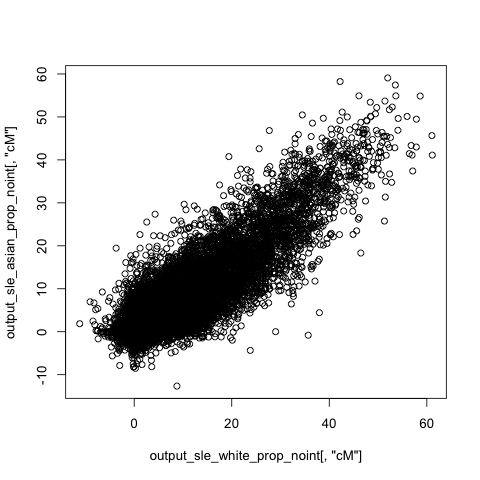

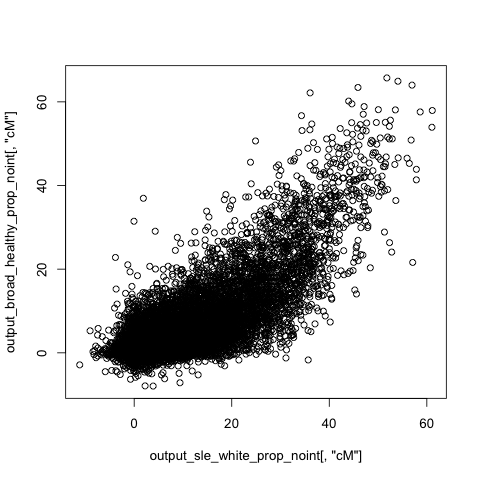

In [104]:
options(repr.plot.width = 6, repr.plot.height = 6);
plot(output_sle_white_prop_noint[,"cM"], output_sle_asian_prop_noint[,"cM"])
plot(output_sle_white_prop_noint[,"cM"], output_broad_healthy_prop_noint[,"cM"])

In [105]:
a <- cbind(rownames(output_sle_white_noint_df)[output_sle_white_noint_df[,"cluster"]=="6"], output_sle_white_noint_df[output_sle_white_noint_df[,"cluster"]=="6","prop"]-output_broad_healthy_noint_df[output_sle_white_noint_df[,"cluster"]=="6","prop"])
a[order(as.numeric(a[,2]),decreasing=T),]

[,1] [,2]

# Let's do the estimation using resampling

We are going to work with counts here. Given the expression of an arbitrary gene $i$ and individual $j$ in PBMCs $P$, and two cell types (B and T) for simplicity. $N_j^B$ and $N_j^T$ are the number of B cells and T cells for individual $j$.

\begin{align*}
P_{ij} &= B_{ij1}+B_{ij2}+...+B_{ijN_b}+T_{ij1}+T_{ij2}+...+T_{ijN_t} \\
P_{ij} &= \sum_k^{N_j^B}B_{ijk} + \sum_k^{N_j^T}T_{ijk} \\
P_{ij} &= N_j^B\times{\bar{B}_{ij}} + N_j^T\times{\bar{T}_{ij}} \\
\bar{P_{ij}} &= {{N_j^B}\over{N_j^{PBMC}}}\times{\bar{B_{ij}}} + {{N_j^T}\over{N_j^{PBMC}}}\times{\bar{T_{ij}}} \\
\bar{P_{ij}} &= {{{\rho}_j^B}\times{\bar{B_{ij}}} + {{\rho}_j^T}\times{\bar{T_{ij}}}}
\end{align*}


$\bar{B}_{ij}$ is the average expression of the gene $i$ in individual $j$ in cell type B. $\bar{T}_{ij}$ is the average expression of the gene $i$ in individual $j$ in cell type T

First, fit proportion

\begin{align*}
\bar{P_{ij}} &= {{\rho}_j^B}\times{\bar{B_{i}}} + {{\rho}_j^T}\times{\bar{T_{i}}}
\end{align*}

When we fit, we will take the average of expression over all individuals. That is $\bar{B_{i}} = {{\sum_j^{J}\bar{B_{ij}}}\over{J}}$

Second, fit expression

\begin{align*}
\bar{P_{ij}} &= {\bar{{\rho}^B}}\times{B_{ij}} + {\bar{{\rho}^T}}\times{T_{ij}}
\end{align*}

When we fit, we will take the average of expression over all individuals. That is $\bar{{\rho}^B} = {{{\sum_j^{J}{\rho_j^B}}}\over{J}}$


## First, let's do all individuals

In [106]:
# ##joined_pivot_filtered <- joined_pivot[match(colnames(pbmc_expr),joined_pivot$ind_cov),]
# # cm_counts_mean <- sweep(exp(cm_expr), 2, joined_pivot_filtered$counts*cm_prop/100, "/")
# # th_counts_mean <- sweep(exp(th_expr), 2, joined_pivot_filtered$counts*th_prop/100, "/")
# # tc_counts_mean <- sweep(exp(tc_expr), 2, joined_pivot_filtered$counts*tc_prop/100, "/")
# # b_counts_mean <- sweep(exp(b_expr), 2, joined_pivot_filtered$counts*b_prop/100, "/")
# # nk_counts_mean <- sweep(exp(nk_expr), 2, joined_pivot_filtered$counts*nk_prop/100, "/")
# # ncm_counts_mean <- sweep(exp(ncm_expr), 2, joined_pivot_filtered$counts*ncm_prop/100, "/")
# # dc_counts_mean <- sweep(exp(dc_expr), 2, joined_pivot_filtered$counts*dc_prop/100, "/")
# # pbmc_counts_mean <- sweep(exp(pbmc_expr), 2, joined_pivot_filtered$counts, "/")

# cm_counts_mean <- exp(cm_expr)
# th_counts_mean <- exp(th_expr)
# tc_counts_mean <- exp(tc_expr)
# b_counts_mean <- exp(b_expr)
# nk_counts_mean <- exp(nk_expr)
# ncm_counts_mean <- exp(ncm_expr)
# dc_counts_mean <- exp(dc_expr)
# pbmc_counts_mean <- exp(pbmc_expr)


# ## some samples do not have b cells or dcs, let's set those means to 0
# b_counts_mean[is.nan(b_counts_mean)] <- 0;
# dc_counts_mean[is.nan(dc_counts_mean)] <- 0;
# b_counts_mean[!is.finite(b_counts_mean)] <- 0;
# dc_counts_mean[!is.finite(dc_counts_mean)] <- 0;

# # cm_counts_global_mean <- rowSums(exp(cm_expr))/sum(joined_pivot_filtered$counts*cm_prop/100, na.rm=T)
# # th_counts_global_mean <- rowSums(exp(th_expr))/sum(joined_pivot_filtered$counts*th_prop/100, na.rm=T)
# # tc_counts_global_mean <- rowSums(exp(tc_expr))/sum(joined_pivot_filtered$counts*tc_prop/100, na.rm=T)
# # b_counts_global_mean <- rowSums(exp(b_expr))/sum(joined_pivot_filtered$counts*b_prop/100, na.rm=T)
# # nk_counts_global_mean <- rowSums(exp(nk_expr))/sum(joined_pivot_filtered$counts*nk_prop/100, na.rm=T)
# # ncm_counts_global_mean <- rowSums(exp(ncm_expr))/sum(joined_pivot_filtered$counts*ncm_prop/100, na.rm=T)
# # dc_counts_global_mean <- rowSums(exp(dc_expr))/sum(joined_pivot_filtered$counts*dc_prop/100, na.rm=T)

# cm_counts_global_mean <- apply(exp(cm_expr),1,mean)
# th_counts_global_mean <- apply(exp(th_expr),1,mean)
# tc_counts_global_mean <- apply(exp(tc_expr),1,mean)
# b_counts_global_mean <- apply(exp(b_expr),1,mean)
# nk_counts_global_mean <- apply(exp(nk_expr),1,mean)
# ncm_counts_global_mean <- apply(exp(ncm_expr),1,mean)
# dc_counts_global_mean <- apply(exp(dc_expr),1,mean)


# a <- cbind(cm_counts_global_mean, th_counts_global_mean, tc_counts_global_mean, b_counts_global_mean, nk_counts_global_mean, ncm_counts_global_mean, dc_counts_global_mean)
# ##sle_counts_means <- cbind(cm_sle_counts_mean, th_sle_counts_mean, tc_sle_counts_mean, b_sle_counts_mean, nk_sle_counts_mean, ncm_sle_counts_mean, dc_sle_counts_mean)

# output_direct_global_prop <- NULL;

# for(i in 1:nrow(pbmc_counts[match(expr_gene_names, counts_gene_names),])) {    
#     predicted <- rowSums(cbind(cm_counts_global_mean[i]*cm_prop/100,
#                                th_counts_global_mean[i]*th_prop/100, 
#                                b_counts_global_mean[i]*b_prop/100, 
#                                nk_counts_global_mean[i]*nk_prop/100, 
#                                ncm_counts_global_mean[i]*ncm_prop/100, 
#                                tc_counts_global_mean[i]*tc_prop/100,##), na.rm=T)
#                                dc_counts_global_mean[i]*dc_prop/100), na.rm=T)

#     output_direct_global_prop <- rbind(output_direct_global_prop, c(cor(log(predicted),pbmc_expr_std[i,])^2*100, 1-cor(log(predicted),pbmc_expr_std[i,])^2*100))
# }


# rownames(output_direct_global_prop) <- counts_gene_names[match(expr_gene_names, counts_gene_names)];
# colnames(output_direct_global_prop) <- c("r2", "res")

# output_direct_global_expr <- NULL;

# cm_prop_global_mean <- sum(joined_pivot_filtered$counts*cm_prop/100,na.rm=T)/sum(joined_pivot_filtered$counts)
# th_prop_global_mean <- sum(joined_pivot_filtered$counts*th_prop/100,na.rm=T)/sum(joined_pivot_filtered$counts)
# tc_prop_global_mean <- sum(joined_pivot_filtered$counts*tc_prop/100,na.rm=T)/sum(joined_pivot_filtered$counts)
# b_prop_global_mean <- sum(joined_pivot_filtered$counts*b_prop/100,na.rm=T)/sum(joined_pivot_filtered$counts)
# nk_prop_global_mean <- sum(joined_pivot_filtered$counts*nk_prop/100,na.rm=T)/sum(joined_pivot_filtered$counts)
# ncm_prop_global_mean <- sum(joined_pivot_filtered$counts*ncm_prop/100,na.rm=T)/sum(joined_pivot_filtered$counts)
# dc_prop_global_mean <- sum(joined_pivot_filtered$counts*dc_prop/100,na.rm=T)/sum(joined_pivot_filtered$counts)

# a_prop <- c(cm_prop_global_mean, th_prop_global_mean, tc_prop_global_mean, b_prop_global_mean, nk_prop_global_mean, ncm_prop_global_mean, dc_prop_global_mean);

# for(i in 1:nrow(pbmc_counts[match(expr_gene_names, counts_gene_names),])) {
#    predicted <- rowSums(cbind(cm_counts_mean[i,]*cm_prop_global_mean, 
#                               th_counts_mean[i,]*th_prop_global_mean, 
#                               b_counts_mean[i,]*b_prop_global_mean,
#                               nk_counts_mean[i,]*nk_prop_global_mean, 
#                                ncm_counts_mean[i,]*ncm_prop_global_mean,
#                               tc_counts_mean[i,]*tc_prop_global_mean,##), na.rm=T)
#                               dc_counts_mean[i,]*dc_prop_global_mean), na.rm=T)

#     output_direct_global_expr <- rbind(output_direct_global_expr, c(cor(log(predicted),pbmc_expr_std[i,])^2*100, 1-cor(log(predicted),pbmc_expr_std[i,])^2*100))
# }

# rownames(output_direct_global_expr) <- expr_gene_names;
# colnames(output_direct_global_expr) <- c("r2", "res")

In [107]:
# options(repr.plot.width = 4, repr.plot.height = 4)
# i=10
# i=grep("^CD22$",expr_gene_names)[1]
# ##i=grep("ERAP2",expr_gene_names)[1]
# predicted <- rowSums(cbind(cm_counts_global_mean[i]*cm_prop/100,
#                                th_counts_global_mean[i]*th_prop/100,
#                                b_counts_global_mean[i]*b_prop/100,
#                                nk_counts_global_mean[i]*nk_prop/100, 
#                                ncm_counts_global_mean[i]*ncm_prop/100,
#                                tc_counts_global_mean[i]*tc_prop/100,
#                      dc_counts_global_mean[i]*dc_prop/100),na.rm=T)
# plot(log(predicted), log(pbmc_counts_mean[i,]))
# cor(log(predicted), pbmc_expr_std[i,])^2

# predicted <- rowSums(cbind(cm_counts_mean[i,]*cm_prop_global_mean, 
#                               th_counts_mean[i,]*th_prop_global_mean, 
#                               b_counts_mean[i,]*b_prop_global_mean,
#                               nk_counts_mean[i,]*nk_prop_global_mean, 
#                                ncm_counts_mean[i,]*ncm_prop_global_mean,
#                               tc_counts_mean[i,]*tc_prop_global_mean,
#                           dc_counts_mean[i,]*dc_prop_global_mean), na.rm=T)
# plot(log(predicted), pbmc_expr_std[i,])
# cor(log(predicted), pbmc_expr_std[i,])^2


# predicted <- rowSums(cbind(cm_counts_mean[i,]*cm_prop, 
#                               th_counts_mean[i,]*th_prop, 
#                               b_counts_mean[i,]*b_prop,
#                               nk_counts_mean[i,]*nk_prop, 
#                                ncm_counts_mean[i,]*ncm_prop,
#                               tc_counts_mean[i,]*tc_prop,
#                           dc_counts_mean[i,]*dc_prop), na.rm=T)
# plot(log(predicted), pbmc_expr_std[i,])
# cor(log(predicted), pbmc_expr_std[i,])^2

## Second, let's do SLE

Mean of means might be a bit unstable, let's calculate a global mean

### All SLE

In [108]:
# # cm_sle_counts_mean <- sweep(exp(cm_sle_expr), 2, joined_pivot_sle$counts*cm_sle_prop/100, "/")
# # th_sle_counts_mean <- sweep(exp(th_sle_expr), 2, joined_pivot_sle$counts*th_sle_prop/100, "/")
# # tc_sle_counts_mean <- sweep(exp(tc_sle_expr), 2, joined_pivot_sle$counts*tc_sle_prop/100, "/")
# # b_sle_counts_mean <- sweep(exp(b_sle_expr), 2, joined_pivot_sle$counts*b_sle_prop/100, "/")
# # nk_sle_counts_mean <- sweep(exp(nk_sle_expr), 2, joined_pivot_sle$counts*nk_sle_prop/100, "/")
# # ncm_sle_counts_mean <- sweep(exp(ncm_sle_expr), 2, joined_pivot_sle$counts*ncm_sle_prop/100, "/")
# # dc_sle_counts_mean <- sweep(exp(dc_sle_expr), 2, joined_pivot_sle$counts*dc_sle_prop/100, "/")
# # pbmc_sle_counts_mean <- sweep(exp(pbmc_sle_expr), 2, joined_pivot_sle$counts, "/")


# cm_sle_counts_mean <- exp(cm_sle_expr);
# th_sle_counts_mean <- exp(th_sle_expr);
# tc_sle_counts_mean <- exp(tc_sle_expr);
# b_sle_counts_mean <- exp(b_sle_expr);
# nk_sle_counts_mean <- exp(nk_sle_expr);
# ncm_sle_counts_mean <- exp(ncm_sle_expr);
# dc_sle_counts_mean <- exp(dc_sle_expr);
# pbmc_sle_counts_mean <- exp(pbmc_sle_expr);

# # cm_sle_counts_global_mean <- rowSums(exp(cm_sle_expr))/sum(joined_pivot_sle$counts*cm_sle_prop/100, na.rm=T)
# # th_sle_counts_global_mean <- rowSums(exp(th_sle_expr))/sum(joined_pivot_sle$counts*th_sle_prop/100, na.rm=T)
# # tc_sle_counts_global_mean <- rowSums(exp(tc_sle_expr))/sum(joined_pivot_sle$counts*tc_sle_prop/100, na.rm=T)
# # b_sle_counts_global_mean <- rowSums(exp(b_sle_expr))/sum(joined_pivot_sle$counts*b_sle_prop/100, na.rm=T)
# # nk_sle_counts_global_mean <- rowSums(exp(nk_sle_expr))/sum(joined_pivot_sle$counts*nk_sle_prop/100, na.rm=T)
# # ncm_sle_counts_global_mean <- rowSums(exp(ncm_sle_expr))/sum(joined_pivot_sle$counts*ncm_sle_prop/100, na.rm=T)
# # dc_sle_counts_global_mean <- rowSums(exp(dc_sle_expr))/sum(joined_pivot_sle$counts*dc_sle_prop/100, na.rm=T)

# cm_sle_counts_global_mean <- apply(exp(cm_sle_expr),1,mean)
# th_sle_counts_global_mean <- apply(exp(th_sle_expr),1,mean)
# tc_sle_counts_global_mean <- apply(exp(tc_sle_expr),1,mean)
# b_sle_counts_global_mean <- apply(exp(b_sle_expr),1,mean)
# nk_sle_counts_global_mean <- apply(exp(nk_sle_expr),1,mean)
# ncm_sle_counts_global_mean <- apply(exp(ncm_sle_expr),1,mean)
# dc_sle_counts_global_mean <- apply(exp(dc_sle_expr),1,mean)


# ## some samples do not have b cells or dcs, let's set those means to 0
# b_sle_counts_mean[is.nan(b_sle_counts_mean)] <- 0;
# dc_sle_counts_mean[is.nan(dc_sle_counts_mean)] <- 0;
# b_sle_counts_mean[!is.finite(b_sle_counts_mean)] <- 0;
# dc_sle_counts_mean[!is.finite(dc_sle_counts_mean)] <- 0;

# ##sle_counts_means <- cbind(cm_sle_counts_mean, th_sle_counts_mean, tc_sle_counts_mean, b_sle_counts_mean, nk_sle_counts_mean, ncm_sle_counts_mean, dc_sle_counts_mean)

# output_sle_direct_global_prop <- NULL;

# for(i in 1:nrow(pbmc_sle_counts[match(expr_gene_names, counts_gene_names),])) {    
#     predicted <- rowSums(cbind(cm_sle_counts_global_mean[i]*cm_sle_prop/100,
#                                th_sle_counts_global_mean[i]*th_sle_prop/100,
#                                b_sle_counts_global_mean[i]*b_sle_prop/100,
#                                nk_sle_counts_global_mean[i]*nk_sle_prop/100, 
#                                ncm_sle_counts_global_mean[i]*ncm_sle_prop/100,
#                                tc_sle_counts_global_mean[i]*tc_sle_prop/100,##), na.rm=T)
#                                dc_sle_counts_global_mean[i]*dc_sle_prop/100),na.rm=T)

#     output_sle_direct_global_prop <- rbind(output_sle_direct_global_prop, 
#                                                c(cor(log(predicted),pbmc_sle_expr_std[i,])^2*100, 1-cor(log(predicted),pbmc_sle_expr_std[i,])^2*100))
# }


# rownames(output_sle_direct_global_prop) <- counts_gene_names[match(expr_gene_names, counts_gene_names)];
# colnames(output_sle_direct_global_prop) <- c("r2", "res")

# output_sle_direct_global_expr <- NULL;

# cm_sle_prop_global_mean <- sum(joined_pivot_sle$counts*cm_sle_prop/100,na.rm=T)/sum(joined_pivot_sle$counts)
# th_sle_prop_global_mean <- sum(joined_pivot_sle$counts*th_sle_prop/100,na.rm=T)/sum(joined_pivot_sle$counts)
# tc_sle_prop_global_mean <- sum(joined_pivot_sle$counts*tc_sle_prop/100,na.rm=T)/sum(joined_pivot_sle$counts)
# b_sle_prop_global_mean <- sum(joined_pivot_sle$counts*b_sle_prop/100,na.rm=T)/sum(joined_pivot_sle$counts)
# nk_sle_prop_global_mean <- sum(joined_pivot_sle$counts*nk_sle_prop/100,na.rm=T)/sum(joined_pivot_sle$counts)
# ncm_sle_prop_global_mean <- sum(joined_pivot_sle$counts*ncm_sle_prop/100,na.rm=T)/sum(joined_pivot_sle$counts)
# dc_sle_prop_global_mean <- sum(joined_pivot_sle$counts*dc_sle_prop/100,na.rm=T)/sum(joined_pivot_sle$counts)

# for(i in 1:nrow(pbmc_sle_counts[match(expr_gene_names, counts_gene_names),])) {
#    predicted <- rowSums(cbind(cm_sle_counts_mean[i,]*cm_sle_prop_global_mean,
#                               th_sle_counts_mean[i,]*th_sle_prop_global_mean,
#                               b_sle_counts_mean[i,]*b_sle_prop_global_mean,
#                               nk_sle_counts_mean[i,]*nk_sle_prop_global_mean, 
#                                ncm_sle_counts_mean[i,]*ncm_sle_prop_global_mean,
#                               tc_sle_counts_mean[i,]*tc_sle_prop_global_mean,##), na.rm=T)
#                               dc_sle_counts_mean[i]*dc_sle_prop_global_mean),na.rm=T)

#    ##output_sle_direct_global_expr <- rbind(output_sle_direct_global_expr, c(var(predicted)/var(pbmc_sle_counts_mean[i,],na.rm=T)*100, 100-var(predicted)/var(pbmc_sle_counts_mean[i,],na.rm=T)*100))
#   output_sle_direct_global_expr <- rbind(output_sle_direct_global_expr, 
#                                          c(cor(log(predicted),pbmc_sle_expr_std[i,])^2*100, 1-cor(log(predicted),pbmc_sle_expr_std[i,])^2*100))
# }

# rownames(output_sle_direct_global_expr) <- expr_gene_names;
# colnames(output_sle_direct_global_expr) <- c("r2", "res")

In [109]:
# options(repr.plot.width = 4, repr.plot.height = 4)
# i=2
# i=grep("^CD22$",expr_gene_names)[1]
# predicted <- rowSums(cbind(cm_sle_counts_global_mean[i]*cm_sle_prop/100,
#                                th_sle_counts_global_mean[i]*th_sle_prop/100,
#                                b_sle_counts_global_mean[i]*b_sle_prop/100,
#                                nk_sle_counts_global_mean[i]*nk_sle_prop/100, 
#                                ncm_sle_counts_global_mean[i]*ncm_sle_prop/100,
#                                tc_sle_counts_global_mean[i]*tc_sle_prop/100,
#                           dc_sle_counts_global_mean[i]*dc_sle_prop/100), na.rm=T)
# plot(log(predicted), log(pbmc_sle_counts_mean[i,]))
# cor(predicted, pbmc_sle_counts_mean[i,])^2
# output_sle_prop_noint[i,"adj r2"]

# predicted <- rowSums(cbind(cm_sle_counts_mean[i,]*cm_sle_prop_global_mean, 
#                               th_sle_counts_mean[i,]*th_sle_prop_global_mean, 
#                               b_sle_counts_mean[i,]*b_sle_prop_global_mean,
#                               nk_sle_counts_mean[i,]*nk_sle_prop_global_mean, 
#                                ncm_sle_counts_mean[i,]*ncm_sle_prop_global_mean,
#                               tc_sle_counts_mean[i,]*tc_sle_prop_global_mean,##), na.rm=T)
#                           dc_sle_counts_mean[i,]*dc_sle_prop_global_mean), na.rm=T)

# plot(log(predicted), log(pbmc_sle_counts_mean[i,]))
# cor(predicted, pbmc_sle_counts_mean[i,])^2

# predicted <- rowSums(cbind(cm_sle_counts_mean[i,]*cm_sle_prop, 
#                               th_sle_counts_mean[i,]*th_sle_prop, 
#                               b_sle_counts_mean[i,]*b_sle_prop,
#                               nk_sle_counts_mean[i,]*nk_sle_prop, 
#                                ncm_sle_counts_mean[i,]*ncm_sle_prop,
#                               tc_sle_counts_mean[i,]*tc_sle_prop,
#                           dc_sle_counts_mean[i,]*dc_sle_prop), na.rm=T)
# plot(predicted, pbmc_sle_counts_mean[i,])
# cor(predicted, pbmc_sle_counts_mean[i,])^2



### Now, let's downsample to 46 and redo SLE

In [110]:
# cm_sle_down_counts_global_mean <- apply(exp(cm_sle_expr[,samples]),1,mean)
# th_sle_down_counts_global_mean <- apply(exp(th_sle_expr[,samples]),1,mean)
# tc_sle_down_counts_global_mean <- apply(exp(tc_sle_expr[,samples]),1,mean)
# b_sle_down_counts_global_mean <- apply(exp(b_sle_expr[,samples]),1,mean)
# nk_sle_down_counts_global_mean <- apply(exp(nk_sle_expr[,samples]),1,mean)
# ncm_sle_down_counts_global_mean <- apply(exp(ncm_sle_expr[,samples]),1,mean)
# dc_sle_down_counts_global_mean <- apply(exp(dc_sle_expr[,samples]),1,mean)

# # cm_sle_down_counts_global_mean <- rowSums(exp(cm_sle_expr[,samples]))/sum((joined_pivot_sle$counts*cm_sle_prop/100)[samples])
# # th_sle_down_counts_global_mean <- rowSums(exp(th_sle_expr[,samples]))/sum((joined_pivot_sle$counts*th_sle_prop/100)[samples])
# # tc_sle_down_counts_global_mean <- rowSums(exp(tc_sle_expr[,samples]))/sum((joined_pivot_sle$counts*tc_sle_prop/100)[samples])
# # b_sle_down_counts_global_mean <- rowSums(exp(b_sle_expr[,samples]),na.rm=T)/sum((joined_pivot_sle$counts*b_sle_prop/100)[samples],na.rm=T)
# # nk_sle_down_counts_global_mean <- rowSums(exp(nk_sle_expr[,samples]))/sum((joined_pivot_sle$counts*nk_sle_prop/100)[samples])
# # ncm_sle_down_counts_global_mean <- rowSums(exp(ncm_sle_expr[,samples]))/sum((joined_pivot_sle$counts*ncm_sle_prop/100)[samples])
# # dc_sle_down_counts_global_mean <- rowSums(exp(dc_sle_expr[,samples]),na.rm=T)/sum((joined_pivot_sle$counts*dc_sle_prop/100)[samples],na.rm=T)

# output_sle_down_direct_global_prop <- NULL;

# for(i in 1:nrow(pbmc_sle_counts[match(expr_gene_names, counts_gene_names),samples])) {    
#     predicted <- rowSums(cbind(cm_sle_counts_global_mean[i]*cm_sle_prop[samples]/100, 
#                                th_sle_counts_global_mean[i]*th_sle_prop[samples]/100, 
#                                b_sle_counts_global_mean[i]*b_sle_prop[samples]/100, 
#                                nk_sle_counts_global_mean[i]*nk_sle_prop[samples]/100, 
#                                ncm_sle_counts_global_mean[i]*ncm_sle_prop[samples]/100, 
#                                tc_sle_counts_global_mean[i]*tc_sle_prop[samples]/100,##), na.rm=T)
#                                dc_sle_counts_global_mean[i]*dc_sle_prop[samples]/100), na.rm=T)

#     output_sle_down_direct_global_prop <- rbind(output_sle_down_direct_global_prop,
#                                                 c(cor(log(predicted),pbmc_sle_expr_std[i,samples])^2*100, 1-cor(log(predicted),pbmc_sle_expr_std[i,samples])^2*100))
# }


# rownames(output_sle_down_direct_global_prop) <- counts_gene_names[match(expr_gene_names, counts_gene_names)];
# colnames(output_sle_down_direct_global_prop) <- c("r2", "res")

# output_sle_down_direct_global_expr <- NULL;

# cm_sle_down_prop_global_mean <- sum((joined_pivot_sle$counts*cm_sle_prop/100)[samples],na.rm=T)/sum(joined_pivot_sle$counts[samples])
# th_sle_down_prop_global_mean <- sum((joined_pivot_sle$counts*th_sle_prop/100)[samples],na.rm=T)/sum(joined_pivot_sle$counts[samples])
# tc_sle_down_prop_global_mean <- sum((joined_pivot_sle$counts*tc_sle_prop/100)[samples],na.rm=T)/sum(joined_pivot_sle$counts[samples])
# b_sle_down_prop_global_mean <- sum((joined_pivot_sle$counts*b_sle_prop/100)[samples],na.rm=T)/sum(joined_pivot_sle$counts[samples],na.rm=T)
# nk_sle_down_prop_global_mean <- sum((joined_pivot_sle$counts*nk_sle_prop/100)[samples],na.rm=T)/sum(joined_pivot_sle$counts[samples])
# ncm_sle_down_prop_global_mean <- sum((joined_pivot_sle$counts*ncm_sle_prop/100)[samples],na.rm=T)/sum(joined_pivot_sle$counts[samples])
# dc_sle_down_prop_global_mean <- sum((joined_pivot_sle$counts*dc_sle_prop/100)[samples],na.rm=T)/sum(joined_pivot_sle$counts[samples],na.rm=T)

# for(i in 1:nrow(pbmc_sle_counts[match(expr_gene_names, counts_gene_names),])) {
#    predicted <- rowSums(cbind(cm_sle_counts_mean[i,samples]*cm_sle_down_prop_global_mean,
#                               th_sle_counts_mean[i,samples]*th_sle_down_prop_global_mean, 
#                               b_sle_counts_mean[i,samples]*b_sle_down_prop_global_mean, 
#                               nk_sle_counts_mean[i,samples]*nk_sle_down_prop_global_mean,
#                               ncm_sle_counts_mean[i,samples]*ncm_sle_down_prop_global_mean, 
#                               tc_sle_counts_mean[i,samples]*tc_sle_down_prop_global_mean,##), na.rm=T)
#                               dc_sle_counts_mean[i,samples]*dc_sle_down_prop_global_mean), na.rm=T)

#     output_sle_down_direct_global_expr <- rbind(output_sle_down_direct_global_expr, 
#                                                 c(cor(log(predicted),pbmc_sle_expr_std[i,samples])^2*100, 1-cor(log(predicted),pbmc_sle_expr_std[i,samples])^2*100))
  
# }


## Finally, processed the healthy

In [111]:
# cm_healthy_counts_mean <- exp(cm_healthy_expr)
# th_healthy_counts_mean <- exp(th_healthy_expr)
# tc_healthy_counts_mean <- exp(tc_healthy_expr)
# b_healthy_counts_mean <- exp(b_healthy_expr)
# nk_healthy_counts_mean <- exp(nk_healthy_expr)
# ncm_healthy_counts_mean <- exp(ncm_healthy_expr)
# dc_healthy_counts_mean <- exp(dc_healthy_expr)
# pbmc_healthy_counts_mean <- exp(pbmc_healthy_expr)


# # cm_healthy_counts_mean <- sweep(exp(cm_healthy_expr), 2, joined_pivot_healthy$counts*cm_healthy_prop/100, "/")
# # th_healthy_counts_mean <- sweep(exp(th_healthy_expr), 2, joined_pivot_healthy$counts*th_healthy_prop/100, "/")
# # tc_healthy_counts_mean <- sweep(exp(tc_healthy_expr), 2, joined_pivot_healthy$counts*tc_healthy_prop/100, "/")
# # b_healthy_counts_mean <- sweep(exp(b_healthy_expr), 2, joined_pivot_healthy$counts*b_healthy_prop/100, "/")
# # nk_healthy_counts_mean <- sweep(exp(nk_healthy_expr), 2, joined_pivot_healthy$counts*nk_healthy_prop/100, "/")
# # ncm_healthy_counts_mean <- sweep(exp(ncm_healthy_expr), 2, joined_pivot_healthy$counts*ncm_healthy_prop/100, "/")
# # dc_healthy_counts_mean <- sweep(exp(dc_healthy_expr), 2, joined_pivot_healthy$counts*dc_healthy_prop/100, "/")
# # pbmc_healthy_counts_mean <- sweep(exp(pbmc_healthy_expr), 2, joined_pivot_healthy$counts, "/")

# cm_healthy_counts_global_mean <- apply(exp(cm_healthy_expr),1,mean)
# th_healthy_counts_global_mean <- apply(exp(th_healthy_expr),1,mean)
# tc_healthy_counts_global_mean <- apply(exp(tc_healthy_expr),1,mean)
# b_healthy_counts_global_mean <- apply(exp(b_healthy_expr),1,mean)
# nk_healthy_counts_global_mean <- apply(exp(nk_healthy_expr),1,mean)
# ncm_healthy_counts_global_mean <- apply(exp(ncm_healthy_expr),1,mean)
# dc_healthy_counts_global_mean <- apply(exp(dc_healthy_expr),1,mean)

# # cm_healthy_counts_global_mean <- rowSums(exp(cm_healthy_expr))/sum(joined_pivot_healthy$counts*cm_healthy_prop/100, na.rm=T)
# # th_healthy_counts_global_mean <- rowSums(exp(th_healthy_expr))/sum(joined_pivot_healthy$counts*th_healthy_prop/100, na.rm=T)
# # tc_healthy_counts_global_mean <- rowSums(exp(tc_healthy_expr))/sum(joined_pivot_healthy$counts*tc_healthy_prop/100, na.rm=T)
# # b_healthy_counts_global_mean <- rowSums(exp(b_healthy_expr))/sum(joined_pivot_healthy$counts*b_healthy_prop/100, na.rm=T)
# # nk_healthy_counts_global_mean <- rowSums(exp(nk_healthy_expr))/sum(joined_pivot_healthy$counts*nk_healthy_prop/100, na.rm=T)
# # ncm_healthy_counts_global_mean <- rowSums(exp(ncm_healthy_expr))/sum(joined_pivot_healthy$counts*ncm_healthy_prop/100, na.rm=T)
# # dc_healthy_counts_global_mean <- rowSums(exp(dc_healthy_expr))/sum(joined_pivot_healthy$counts*dc_healthy_prop/100, na.rm=T)

# ##healthy_counts_means <- cbind(cm_healthy_counts_mean, th_healthy_counts_mean, tc_healthy_counts_mean, b_healthy_counts_mean, nk_healthy_counts_mean, ncm_healthy_counts_mean, dc_healthy_counts_mean)

# output_healthy_direct_global_prop <- NULL;

# for(i in 1:nrow(pbmc_healthy_counts[match(expr_gene_names, counts_gene_names),])) {    
#     predicted <- rowSums(cbind(cm_healthy_counts_global_mean[i]*cm_healthy_prop/100,
#                                th_healthy_counts_global_mean[i]*th_healthy_prop/100,
#                                b_healthy_counts_global_mean[i]*b_healthy_prop/100,
#                                nk_healthy_counts_global_mean[i]*nk_healthy_prop/100, 
#                                ncm_healthy_counts_global_mean[i]*ncm_healthy_prop/100,
#                                tc_healthy_counts_global_mean[i]*tc_healthy_prop/100,##), na.rm=T)
#                                dc_healthy_counts_global_mean[i]*dc_healthy_prop/100),na.rm=T)

#     output_healthy_direct_global_prop <- rbind(output_healthy_direct_global_prop, 
#                                                c(cor(log(predicted),pbmc_healthy_expr_std[i,])^2*100, 1-cor(log(predicted),pbmc_healthy_expr_std[i,])^2*100))
# }


# rownames(output_healthy_direct_global_prop) <- counts_gene_names[match(expr_gene_names, counts_gene_names)];
# colnames(output_healthy_direct_global_prop) <- c("r2", "res")

# output_healthy_direct_global_expr <- NULL;

# cm_healthy_prop_global_mean <- sum(joined_pivot_healthy$counts*cm_healthy_prop/100,na.rm=T)/sum(joined_pivot_healthy$counts)
# th_healthy_prop_global_mean <- sum(joined_pivot_healthy$counts*th_healthy_prop/100,na.rm=T)/sum(joined_pivot_healthy$counts)
# tc_healthy_prop_global_mean <- sum(joined_pivot_healthy$counts*tc_healthy_prop/100,na.rm=T)/sum(joined_pivot_healthy$counts)
# b_healthy_prop_global_mean <- sum(joined_pivot_healthy$counts*b_healthy_prop/100,na.rm=T)/sum(joined_pivot_healthy$counts)
# nk_healthy_prop_global_mean <- sum(joined_pivot_healthy$counts*nk_healthy_prop/100,na.rm=T)/sum(joined_pivot_healthy$counts)
# ncm_healthy_prop_global_mean <- sum(joined_pivot_healthy$counts*ncm_healthy_prop/100,na.rm=T)/sum(joined_pivot_healthy$counts)
# dc_healthy_prop_global_mean <- sum(joined_pivot_healthy$counts*dc_healthy_prop/100,na.rm=T)/sum(joined_pivot_healthy$counts)

# for(i in 1:nrow(pbmc_healthy_counts[match(expr_gene_names, counts_gene_names),])) {
#    predicted <- rowSums(cbind(cm_healthy_counts_mean[i,]*cm_healthy_prop_global_mean,
#                               th_healthy_counts_mean[i,]*th_healthy_prop_global_mean,
#                               b_healthy_counts_mean[i,]*b_healthy_prop_global_mean,
#                               nk_healthy_counts_mean[i,]*nk_healthy_prop_global_mean, 
#                                ncm_healthy_counts_mean[i,]*ncm_healthy_prop_global_mean,
#                               tc_healthy_counts_mean[i,]*tc_healthy_prop_global_mean,##), na.rm=T)
#                               dc_healthy_counts_mean[i]*dc_healthy_prop_global_mean),na.rm=T)

#    ##output_healthy_direct_global_expr <- rbind(output_healthy_direct_global_expr, c(var(predicted)/var(pbmc_healthy_counts_mean[i,],na.rm=T)*100, 100-var(predicted)/var(pbmc_healthy_counts_mean[i,],na.rm=T)*100))
#   output_healthy_direct_global_expr <- rbind(output_healthy_direct_global_expr, 
#                                          c(cor(log(predicted),pbmc_healthy_expr_std[i,])^2*100, 1-cor(log(predicted),pbmc_healthy_expr_std[i,])^2*100))
# }

# rownames(output_healthy_direct_global_expr) <- expr_gene_names;
# colnames(output_healthy_direct_global_expr) <- c("r2", "res")

In [112]:
# options(repr.plot.width = 4, repr.plot.height = 4)
# i=10
# i=grep("^CD22$",expr_gene_names)[1]
# predicted <- rowSums(cbind(cm_healthy_counts_global_mean[i]*cm_healthy_prop/100,
#                                th_healthy_counts_global_mean[i]*th_healthy_prop/100,
#                                b_healthy_counts_global_mean[i]*b_healthy_prop/100,
#                                nk_healthy_counts_global_mean[i]*nk_healthy_prop/100, 
#                                ncm_healthy_counts_global_mean[i]*ncm_healthy_prop/100,
#                                tc_healthy_counts_global_mean[i]*tc_healthy_prop/100,
#                           dc_healthy_counts_global_mean[i]*dc_healthy_prop/100), na.rm=T)
# plot(log(predicted), log(pbmc_healthy_counts_mean[i,]))
# cor(predicted, pbmc_healthy_counts_mean[i,])^2*100
# output_healthy_prop_noint[i,"adj r2"]

# predicted <- rowSums(cbind(cm_healthy_counts_mean[i,]*cm_healthy_prop_global_mean, 
#                               th_healthy_counts_mean[i,]*th_healthy_prop_global_mean, 
#                               b_healthy_counts_mean[i,]*b_healthy_prop_global_mean,
#                               nk_healthy_counts_mean[i,]*nk_healthy_prop_global_mean, 
#                                ncm_healthy_counts_mean[i,]*ncm_healthy_prop_global_mean,
#                               tc_healthy_counts_mean[i,]*tc_healthy_prop_global_mean,
#                           dc_healthy_counts_mean[i,]*dc_healthy_prop_global_mean), na.rm=T)
# plot(log(predicted), log(pbmc_healthy_counts_mean[i,]))
# cor(predicted, pbmc_healthy_counts_mean[i,])^2


# predicted <- rowSums(cbind(cm_healthy_counts_mean[i,]*cm_healthy_prop, 
#                               th_healthy_counts_mean[i,]*th_healthy_prop, 
#                               b_healthy_counts_mean[i,]*b_healthy_prop,
#                               nk_healthy_counts_mean[i,]*nk_healthy_prop, 
#                                ncm_healthy_counts_mean[i,]*ncm_healthy_prop,
#                               tc_healthy_counts_mean[i,]*tc_healthy_prop,
#                           dc_healthy_counts_mean[i,]*dc_healthy_prop), na.rm=T)
# plot(predicted, pbmc_healthy_counts_mean[i,])
# cor(predicted, pbmc_healthy_counts_mean[i,])^2

## Plotting

In [113]:
# df2 <- data.frame(cor=c(cor(output_prop_noint[,"adj r2"], output_expr_noint[,"adj r2"]), cor(output_sle_prop_noint[,"adj r2"], output_sle_expr_noint[,"adj r2"]), cor(output_sle_down_prop_noint[,"adj r2"], output_sle_down_expr_noint[,"adj r2"]), cor(output_healthy_prop_noint[,"adj r2"], output_healthy_expr_noint[,"adj r2"])),
#       prop_mean=c(mean(output_prop_noint[,"adj r2"]), mean(output_sle_prop_noint[,"adj r2"]), mean(output_sle_down_prop_noint[,"adj r2"]), mean(output_healthy_prop_noint[,"adj r2"])),
#       expr_mean=c(mean(output_expr_noint[,"adj r2"]), mean(output_sle_expr_noint[,"adj r2"]), mean(output_sle_down_expr_noint[,"adj r2"]), mean(output_healthy_expr_noint[,"adj r2"])),
#       sum_mean = c(mean(output_prop_noint[,"adj r2"]+output_expr_noint[,"adj r2"]), mean(output_sle_prop_noint[,"adj r2"]+output_sle_expr_noint[,"adj r2"]), mean(output_sle_down_prop_noint[,"adj r2"]+output_sle_down_expr_noint[,"adj r2"]), mean(output_healthy_prop_noint[,"adj r2"]+output_healthy_expr_noint[,"adj r2"])))
# rownames(df2) <- c("all_noint", "sle_noint", "sle_down_noint", "healthy_noint")

# df2

# df3 <- rbind(data.frame(t(apply(output_prop_noint,2,mean,na.rm=T))),
#             data.frame(t(apply(output_expr_noint,2,mean,na.rm=T))),
#              data.frame(t(apply(output_sle_prop_noint,2,mean,na.rm=T))),
#             data.frame(t(apply(output_sle_expr_noint,2,mean,na.rm=T))),
#             data.frame(t(apply(output_sle_down_prop_noint,2,mean,na.rm=T))),
#             data.frame(t(apply(output_sle_down_expr_noint,2,mean,na.rm=T))),
#             data.frame(t(apply(output_healthy_prop_noint,2,mean,na.rm=T))),
#             data.frame(t(apply(output_healthy_expr_noint,2,mean,na.rm=T))))

# rownames(df3) <- c("all_noint_prop", "all_noint_expr", "sle_noint_prop", "sle_noint_expr", "sle_down_noint_prop", "sle_down_noint_expr", "healthy_noint_prop", "healthy_noint_expr")

# df3


# output_direct_global_df <- data.frame(prop=output_direct_global_prop[,1], expr=output_direct_global_expr[,1], type="all_direct")
# output_direct_global_df$cluster <- "no_diff";
# output_direct_global_df$cluster[na.omit(match(cuttree_out[,"gene"],rownames(output_direct_global_df)))] <- cuttree_out[,"cluster"];

# output_sle_direct_global_df <- data.frame(prop=output_sle_direct_global_prop[,1], expr=output_sle_direct_global_expr[,1], type="sle_direct")
# output_sle_direct_global_df$cluster <- "no_diff";
# output_sle_direct_global_df$cluster[na.omit(match(cuttree_out[,"gene"],rownames(output_sle_direct_global_df)))] <- cuttree_out[,"cluster"];

# output_sle_down_direct_global_df <- data.frame(prop=output_sle_down_direct_global_prop[,1], expr=output_sle_down_direct_global_expr[,1], type="sle_down_direct")
# output_sle_down_direct_global_df$cluster <- "no_diff";
# output_sle_down_direct_global_df$cluster[na.omit(match(cuttree_out[,"gene"],rownames(output_sle_down_direct_global_df)))] <- cuttree_out[,"cluster"];

# output_healthy_direct_global_df <- data.frame(prop=output_healthy_direct_global_prop[,1], expr=output_healthy_direct_global_expr[,1], type="healthy_direct")
# output_healthy_direct_global_df$cluster <- "no_diff";
# output_healthy_direct_global_df$cluster[na.omit(match(cuttree_out[,"gene"],rownames(output_healthy_direct_global_df)))] <- cuttree_out[,"cluster"];

# df <- rbind(output_direct_global_df, output_sle_direct_global_df, output_sle_down_direct_global_df, output_healthy_direct_global_df)
# df$cluster <- as.factor(df$cluster)


# options(repr.plot.width = 10, repr.plot.height = 3)
# df_all_ifn <- df;
# df_all_ifn$cluster <- as.character(df_all_ifn$cluster);
# df_all_ifn$cluster[which(df_all_ifn$cluster != "no_diff" & df_all_ifn$cluster != "all_ifn")] <- "no_all_ifn";
# df_all_ifn$cluster <- factor(df_all_ifn$cluster, levels=c("no_diff","no_all_ifn","all_ifn"));
# df_all_ifn <- df_all_ifn[order(df_all_ifn$cluster),]
# ggplot(aes(prop, expr,color=cluster), data=df_all_ifn)+geom_point()+facet_grid(~type)+theme_bw()+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray70","gray40", "black"))+theme(aspect.ratio=1)


# options(repr.plot.width = 9, repr.plot.height = 3)
# ggplot(aes(prop, expr,color=(cluster=="all_ifn")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'all_ifn'),
#              aes(x = prop, y = expr, color = (cluster=="all_ifn")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
# ggplot(aes(prop, expr,color=(cluster=="cM_DC_ifn")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'cM_DC_ifn'),
#              aes(x = prop, y = expr, color = (cluster=="cM_DC_ifn")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
# ggplot(aes(prop, expr,color=(cluster=="cM_ifn")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'cM_ifn'),
#              aes(x = prop, y = expr, color = (cluster=="cM_ifn")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
# ggplot(aes(prop, expr,color=(cluster=="dc_specific")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'dc_specific'),
#              aes(x = prop, y = expr, color = (cluster=="dc_specific")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
# ggplot(aes(prop, expr,color=(cluster=="myeloid_ifn")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'myeloid_ifn'),
#              aes(x = prop, y = expr, color = (cluster=="myeloid_ifn")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
# ggplot(aes(prop, expr,color=(cluster=="ncM_ifn")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'ncM_ifn'),
#              aes(x = prop, y = expr, color = (cluster=="ncM_ifn")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
# ggplot(aes(prop, expr,color=(cluster=="tc_specific")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'tc_specific'),
#              aes(x = prop, y = expr, color = (cluster=="tc_specific")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)
# ggplot(aes(prop, expr,color=(cluster=="th_specific")), data=df)+geom_point()+facet_grid(~type)+theme_bw()+geom_point(data = subset(df, cluster == 'th_specific'),
#              aes(x = prop, y = expr, color = (cluster=="th_specific")))+geom_abline(slope=-1,intercept=100)+scale_color_manual(values=c("gray50", "black"))+theme(aspect.ratio=1)

# df2 <- data.frame(cor=c(cor(output_direct_global_prop[,1], output_direct_global_expr[,1],use='complete.obs'), 
#                         cor(output_sle_direct_global_prop[,1], output_sle_direct_global_expr[,1],use='complete.obs'), 
#                         cor(output_sle_down_direct_global_prop[,1], output_sle_down_direct_global_expr[,1],use='complete.obs'),
#                         cor(output_healthy_direct_global_prop[,1], output_healthy_direct_global_expr[,1])),
#       prop_mean=c(mean(output_direct_global_prop[,1],na.rm=T), mean(output_sle_direct_global_prop[,1],na.rm=T), mean(output_sle_down_direct_global_prop[,1],na.rm=T), mean(output_healthy_direct_global_prop[,1])),
#       expr_mean=c(mean(output_direct_global_expr[,1]), mean(output_sle_direct_global_expr[,1]), mean(output_sle_down_direct_global_expr[,1]), mean(output_healthy_direct_global_expr[,1])),
#       sum_mean = c(mean(output_direct_global_prop[,1]+output_direct_global_expr[,1],na.rm=T), mean(output_sle_direct_global_prop[,1]+output_sle_direct_global_expr[,1],na.rm=T), mean(output_sle_down_direct_global_prop[,1]+output_sle_down_direct_global_expr[,1],na.rm=T), mean(output_healthy_direct_global_prop[,1]+output_healthy_direct_global_expr[,1])))
# rownames(df2) <- c("all_direct", "sle_direct", "sle_down_direct", "healthy_direct")

# df2


## Compare to previous estimates using linear regression

In [114]:
# df <- rbind(data.frame(direct=output_direct_global_prop[,1], regression=output_prop_noint[,"adj r2"], type="all prop"),
#             data.frame(direct=output_direct_global_expr[,1], regression=output_expr_noint[,"adj r2"], type="all expr"),
            
#             data.frame(direct=output_sle_direct_global_prop[,1], regression=output_sle_prop_noint[,"adj r2"], type="sle prop"),
#             data.frame(direct=output_sle_direct_global_expr[,1], regression=output_sle_expr_noint[,"adj r2"], type="sle expr"),
            
#             data.frame(direct=output_sle_down_direct_global_prop[,1], regression=output_sle_down_prop_noint[,"adj r2"], type="sle down prop"),
#             data.frame(direct=output_sle_down_direct_global_expr[,1], regression=output_sle_down_expr_noint[,"adj r2"], type="sle down expr"),
            
#             data.frame(direct=output_healthy_direct_global_prop[,1], regression=output_healthy_prop_noint[,"adj r2"], type="healthy prop"),
#             data.frame(direct=output_healthy_direct_global_expr[,1], regression=output_healthy_expr_noint[,"adj r2"], type="healthy expr"))
  
# options(repr.plot.width = 8, repr.plot.height = 5)
# ggplot(aes(direct, regression), data=df)+geom_point()+facet_wrap(~ type, nrow = 2)+theme_bw()+xlim(0,100)+ylim(0,100)+geom_abline(slope=1, intercept=0,
#   na.rm = FALSE, show.legend = NA)
# ##ggplot(aes(direct, regression), data=df)+geom_point()+facet_wrap(~ type, nrow = 2)+theme_bw()+geom_abline(slope=1, intercept=0,
# ##  na.rm = FALSE, show.legend = NA)


In [115]:
# cor(output_sle_direct_global_prop[,1], output_sle_prop_noint[,"adj r2"],use='complete.obs')
# cor(output_sle_direct_global_expr[,1], output_sle_expr_noint[,"adj r2"])

# cor(output_sle_down_direct_global_prop[,1], output_sle_down_prop_noint[,"adj r2"],use='complete.obs')
# cor(output_sle_down_direct_global_expr[,1], output_sle_down_expr_noint[,"adj r2"])

# cor(output_healthy_direct_global_prop[,1], output_healthy_prop_noint[,"adj r2"])
# cor(output_healthy_direct_global_expr[,1], output_healthy_expr_noint[,"adj r2"])

In [116]:
# options(repr.plot.width = 4, repr.plot.height = 4)
# plot(output_sle_down_direct_global_prop[,1], output_sle_down_prop_noint[,"adj r2"])
# plot(output_sle_down_direct_global_expr[,1], output_sle_down_expr_noint[,"adj r2"])


In [117]:
# options(repr.plot.width = 4, repr.plot.height = 4)
# plot(output_sle_down_direct_global_prop[,1], output_healthy_direct_global_prop[,1])
# plot(output_sle_down_prop_noint[,"adj r2"], output_healthy_prop_noint[,"adj r2"])
# plot(output_sle_down_direct_global_expr[,1], output_healthy_direct_global_expr[,1])
# plot(output_sle_down_expr_noint[,"adj r2"], output_healthy_expr_noint[,"adj r2"])